## Fetch Signatures

In [1]:
"""iLINCS

The exercise here is to quantify HOW many diseases are there for which we have "disease" signatures

Structure:
    1. Imports, Variables, Functions
    2. Retrieve Data
    3. Retrieve DO disease terms
    4. Retieve MeSH disease terms
    5. Filter based on DO disease terms
    6. Filter based on MeSH disease terms
    7. Plot Results
"""

# 1. Imports, Variables, Functions
# imports
import requests, json, re
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

# variables
base_url = "http://www.ilincs.org/api"
doi_data_path = "../data/doid.obo"
mesh_file_path = "../data/desc2023.xml"


# functions
def fetch_disease_signatures(factor):
    """Fetch Disease Signatures"""

    # Construct the filtering JSON based on provided example
    # filter_json = {
    #     "where": {
    #         "factor": factor,
    #         #"baseline": baseline
    #     }
    # }
    # filter_str = json.dumps(filter_json)

    endpoint = f"{base_url}/SignatureMeta"
    # response = requests.get(endpoint, params={"filter": filter_str})
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return []


def extract_disease_names_from_obo(file_path):
    """
    Extracts disease names from an OBO formatted file.

    Args:
    - file_path (str): Path to the OBO file.

    Returns:
    - List[str]: A list of disease names.
    """

    # Open and read the content of the OBO file
    with open(file_path, "r") as f:
        content = f.read()

    # The OBO format divides entries using '[Term]'. We split the content based on this to get individual entries.
    terms = content.split("[Term]")

    disease_names = []  # List to store extracted disease names

    # Iterate over each term/entry
    for term in terms:
        # Use a regular expression to search for the line that starts with 'name: '
        # This line contains the name of the disease.
        match = re.search(r"name: (.+)", term)

        # If a match is found (i.e., the term has a name), extract it and add to the list
        if match:
            disease_name = match.group(
                1
            )  # The actual name is captured in the first group of the regex
            disease_names.append(disease_name)

    return disease_names


def parse_mesh_data(file_path):
    """Parse MeSH XML data and extract disease terms."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract disease terms
    disease_terms = []
    for descriptor in root.findall("DescriptorRecord"):
        term = descriptor.find("DescriptorName/String").text
        disease_terms.append(term)

    return disease_terms, None


# def parse_mesh_data(file_path):
#     """Parse MeSH XML data and extract disease terms."""
#     tree = ET.parse(file_path)
#     root = tree.getroot()

#     # Extract disease terms
#     disease_terms=list(); list_tree_numbers=list()
#     for descriptor in root.findall('DescriptorRecord'):
#         # Check if the term is under the category of diseases
#         tree_numbers = descriptor.findall('TreeNumberList/TreeNumber')
#         for tree_number in tree_numbers:
#             # This is a basic check for TreeNumbers starting with 'C' which usually denotes diseases in MeSH
#             # You might need to adjust this based on the specific structure of your XML file
#             if tree_number.text.startswith('C'):
#                 list_tree_numbers.append(tree_number.text)
#                 term = descriptor.find('DescriptorName/String').text
#                 disease_terms.append(term)
#                 break  # Break after adding the term to avoid duplicates

#     return disease_terms,list_tree_numbers


# 2. Retrieve Data
# Fetch all disease related signatures with the given conditions
signatures = fetch_disease_signatures("disease.state")

# check the nº of datasets with unique diseases
n_unique_diseases_control = len(
    set(
        [
            s["level1"]
            for s in signatures
            if (
                "control" in str(s["level2"]).lower()
                or "normal" in str(s["level2"]).lower()
            )
            and (s["factor"] == "disease.state")
        ]
    )
)
print(f"Number of unique diseases w/ control: {n_unique_diseases_control}")

Number of unique diseases w/ control: 131


In [2]:
# Print example signature
signatures[0]

{'antibodytarget': None,
 'cellline': 'MCF7',
 'tissue': 'breast',
 'cid': 'cID_1000',
 'compound': 'primaquine',
 'concentration': '8.8uM',
 'concordancetable': 'concordanceLib2',
 'datasetid': None,
 'factor': 'perturbagen',
 'level1': 'primaquine_0.0000088',
 'level2': 'control',
 'libraryid': 'LIB_2',
 'lincspertid': 'LSM-1649',
 'nCtrSamples': 11,
 'nTrtSamples': 2,
 'peaktype': None,
 'platform': None,
 'signatureid': 'CMAP_1000',
 'lincsSigID': None,
 'organism': None,
 'clueIoCompound': None,
 'integratedMoas': 'Antimalarial agent|DNA inhibitor',
 'GeneTargets': None,
 'time': None,
 'treatment': 'primaquine',
 'perturbagenID': None,
 'stitchID': 'CID4908',
 'pubChemID': '4908',
 'is_exemplar': None,
 'pert_type': None}

In [3]:
# Extract unique signature IDs from the signatures list
signature_ids = [
    s["signatureid"] for s in signatures if s["factor"] == "disease.state"
][:1]

In [4]:
filtered_expression_data = {}

for signature_id, signature_data in all_expression_data.items():
    filtered_genes = []
    for gene_data in signature_data["data"]["signature"]:
        log_fold_change = gene_data["Value_LogDiffExp"]
        p_value = gene_data["Significance_pvalue"]

        if (log_fold_change >= 1.5 or log_fold_change <= -1.5) and p_value <= 0.05:
            filtered_genes.append(gene_data)

    filtered_expression_data[signature_id] = filtered_genes

# Now, filtered_expression_data contains only the genes that meet the criteria for each signature.

NameError: name 'all_expression_data' is not defined

In [371]:
# filtered_expression_data
len(
    set(
        s.get("signatureid")
        for s in signatures
        if (
            s.get("factor", "") == "disease.state"
            or s.get("factor", "") == "time"
            or s.get("factor", "") == "other"
            or s.get("factor", "") == "cell.line"
            or s.get("factor", "") == "agent"
            or s.get("factor", "") == "tissue"
            or s.get("factor", "") == "age"
            or s.get("factor", "") == "genotype/variation"
            or s.get("factor", "") == "specimen"
            or s.get("factor", "") == "protocol"
            or s.get("libraryid", "") == "LIB_1"
        )
    )
)

9097

In [367]:
[s for s in signatures if s.get("factor", "") == "disease.state"][0]

{'antibodytarget': None,
 'cellline': None,
 'tissue': None,
 'cid': 'cID_117',
 'compound': None,
 'concentration': None,
 'concordancetable': 'concordanceLib1',
 'datasetid': 'gdsGDS1070',
 'factor': 'disease.state',
 'level1': 'early_stage_',
 'level2': 'late_stage_with_local_recurrence',
 'libraryid': 'LIB_1',
 'lincspertid': None,
 'nCtrSamples': None,
 'nTrtSamples': None,
 'peaktype': None,
 'platform': 'gdsGPL91',
 'signatureid': 'GDS_117',
 'lincsSigID': None,
 'organism': None,
 'clueIoCompound': None,
 'integratedMoas': None,
 'GeneTargets': None,
 'time': None,
 'treatment': None,
 'perturbagenID': None,
 'stitchID': None,
 'pubChemID': None,
 'is_exemplar': None,
 'pert_type': None}

In [ ]:
import numpy as np


def compute_enrichment_score(query_signature, reference_signature):
    # Rank genes based on differential expression in the query signature
    ranked_genes = sorted(
        query_signature.keys(),
        key=lambda x: query_signature[x]["Value_LogDiffExp"],
        reverse=True,
    )

    # Calculate running sum statistic
    running_sum = 0
    sum_values = []
    for gene in ranked_genes:
        if gene in reference_signature:
            running_sum += 1
        else:
            running_sum -= 1
        sum_values.append(running_sum)

    # ES is the maximum deviation from zero
    ES = max(sum_values, key=abs)
    return ES


def compute_connectivity_score(query_signature, reference_signatures):
    ES_values = [
        compute_enrichment_score(query_signature, ref_sig)
        for ref_sig in reference_signatures
    ]

    # Normalize ES values to get connectivity score
    connectivity_score = np.mean(ES_values) / max(ES_values)
    return connectivity_score


# Example usage:
# Assuming reference_signatures is a list of multiple reference signatures
connectivity_score = compute_connectivity_score(signature1, reference_signatures)
print(f"Connectivity Score: {connectivity_score}")

In [ ]:
def fetch_differential_expression(signature_id, no_of_top_genes=100):
    """Fetch differential expression data for a given signature ID."""

    endpoint = f"{base_url}/ilincsR/downloadSignature"
    payload = {"sigID": signature_id, "noOfTopGenes": no_of_top_genes, "display": True}

    response = requests.post(endpoint, data=payload)

    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return []


# Fetch differential expression data for each signature ID
all_expression_data = {}
for sig_id in signature_ids:
    expression_data = fetch_differential_expression(sig_id)
    all_expression_data[sig_id] = expression_data


# print example
all_expression_data["GDS_117"]["data"]["signature"][0]

In [9]:
# 3. Retrieve DO disease terms
# Call the function to extract disease names and store them in the 'disease_neames_doi_doi' variable
disease_names_doi = extract_disease_names_from_obo(doi_data_path)

# Print the extracted disease names
print("Nº DOI terms: %d" % len(disease_names_doi))

# 4. Retrieve MeSH terms
# Call function to extract disease names from XML file and store them in the 'disease_names_mesh' variables
disease_names_mesh, symbol_mesh = parse_mesh_data(file_path=mesh_file_path)
print("Nº MeSH terms: %d" % len(disease_names_mesh))

Nº DOI terms: 13863
Nº MeSH terms: 5004


In [22]:
# 5. Filter based on DOID disease terms
# Sample iLINCS "disease.state" factor list (replace this with your actual list)
ilincs_terms = [
    s["level1"]
    for s in signatures
    if ("control" in str(s["level2"]).lower() or "normal" in str(s["level2"]).lower())
    and (s["factor"] == "disease.state")
]

# a. Compile a Relaxed Regex Pattern
# Convert each disease name into a relaxed regex pattern
# This will make the matching case-insensitive and allow for variations in spaces and punctuation
patterns = [
    re.compile(re.escape(disease).replace("\\ ", "[\s\-_]*"), re.IGNORECASE)
    for disease in disease_names_doi
]


# b. Match Against the iLINCS List
# Function to check if a term matches any of the disease patterns
def is_disease(term):
    return any(pattern.search(term) for pattern in patterns)


# Filter the iLINCS terms
diseases_detected_doi = [term for term in ilincs_terms if is_disease(term)]
non_diseases_doi = [term for term in ilincs_terms if not is_disease(term)]

print(
    "Diseases Detected: %d %s"
    % (len(diseases_detected_doi), str(diseases_detected_doi[:5]))
)

print("\nFiltered Out: %d %s" % (len(non_diseases_doi), str(non_diseases_doi[:5])))

# 6. Filter based on MeSH disease terms
# Sample iLINCS "disease.state" factor list (replace this with your actual list)
ilincs_terms = [
    s["level1"]
    for s in signatures
    if ("control" in str(s["level2"]).lower() or "normal" in str(s["level2"]).lower())
    and (s["factor"] == "disease.state")
]

# a. Compile a Relaxed Regex Pattern
# Convert each disease name into a relaxed regex pattern
# This will make the matching case-insensitive and allow for variations in spaces and punctuation
patterns = [
    re.compile(re.escape(disease).replace("\\ ", "[\s\-_]*"), re.IGNORECASE)
    for disease in disease_names_mesh
]


# b. Match Against the iLINCS List
# Function to check if a term matches any of the disease patterns
def is_disease(term):
    return any(pattern.search(term) for pattern in patterns)


# Filter the iLINCS terms
diseases_detected_mesh = [term for term in ilincs_terms if is_disease(term)]
non_diseases_mesh = [term for term in ilincs_terms if not is_disease(term)]

print(
    "Diseases Detected: %d %s"
    % (len(diseases_detected_mesh), str(diseases_detected_mesh[:5]))
)

print("\nFiltered Out: %d %s" % (len(non_diseases_mesh), str(non_diseases_mesh[:5])))

Diseases Detected: 122 ['breast_cancer', 'cerebral_palsy', 'Crohn_disease', 'Idiopathic_Pulmonary_Arterial_Hypertension', 'Chronic_lymphocytic_leukemia']

Filtered Out: 71 ['early_stage_', 'late_stage_with_local_recurrence', 'late_stage_with_metastasis', 'late_stage_with_no_metastasis', 'advanced_IPF']
Diseases Detected: 124 ['early_stage_', 'late_stage_with_local_recurrence', 'breast_cancer', 'cerebral_palsy', 'Crohn_disease']

Filtered Out: 69 ['late_stage_with_metastasis', 'late_stage_with_no_metastasis', 'advanced_IPF', 'invasive_tumor_associated', 'CCALD']


In [19]:
[a for a in disease_names_mesh if "cancer" in a.lower()]

['Breast Cancer Lymphedema',
 'Cancer Pain',
 'Thyroid Cancer, Papillary',
 'Precancerous Conditions',
 'Hereditary Breast and Ovarian Cancer Syndrome']

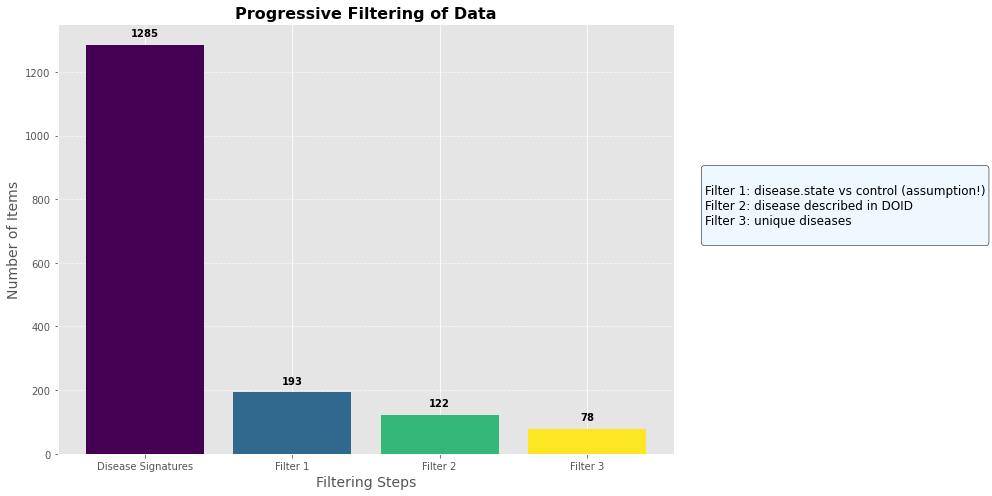

In [103]:
# n signatures from disease.state
n_signatures_disease_state = len(
    [s for s in signatures if s["factor"] == "disease.state"]
)
n_signatures_level2_control = len(
    [
        s
        for s in signatures
        if (s["factor"] == "disease.state")
        and (
            "control" in str(s["level2"]).lower()
            or "normal" in str(s["level2"]).lower()
        )
    ]
)
n_signatures_do_name = len(diseases_detected)
n_unique_do_names = len(set(diseases_detected))

# Sample data: number of items at each step of the filtering process
steps = ["Disease Signatures", "Filter 1", "Filter 2", "Filter 3"]
data = [
    n_signatures_disease_state,
    n_signatures_level2_control,
    n_signatures_do_name,
    n_unique_do_names,
]  # Replace with your actual data

# Create a gradient color list
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

plt.figure(figsize=(14, 7))

# Create bars with gradient colors
bars = plt.bar(steps, data, color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 20,
        round(yval, 2),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Add grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Set the title and labels
plt.title("Progressive Filtering of Data", fontsize=16, fontweight="bold")
plt.xlabel("Filtering Steps", fontsize=14)
plt.ylabel("Number of Items", fontsize=14)

# Add text box with filter explanations
filter_explanations = """
Filter 1: disease.state vs control (assumption!)
Filter 2: disease described in DOID
Filter 3: unique diseases
"""
plt.annotate(
    filter_explanations,
    xy=(1.05, 0.5),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"),
)

# Use a stylish theme
plt.style.use("ggplot")

plt.tight_layout()
plt.show()

## Fetch Datasets

In [6]:
def parse_mesh_data(file_path):
    """Parse MeSH XML data and extract disease terms."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract disease terms
    disease_terms = list()
    list_tree_numbers = list()
    for descriptor in root.findall("DescriptorRecord"):
        # Check if the term is under the category of diseases
        tree_numbers = descriptor.findall("TreeNumberList/TreeNumber")
        for tree_number in tree_numbers:
            # This is a basic check for TreeNumbers starting with 'C' which usually denotes diseases in MeSH
            # You might need to adjust this based on the specific structure of your XML file
            if tree_number.text.startswith("C"):
                list_tree_numbers.append(tree_number.text)
                term = descriptor.find("DescriptorName/String").text
                disease_terms.append(term)
                break  # Break after adding the term to avoid duplicates

    return disease_terms, list_tree_numbers


disease_names_mesh_2, symbol_mesh = parse_mesh_data(file_path=mesh_file_path)

In [76]:
def fetch_dataset_metadata(dataset_id):
    """Fetch dataset metadata/description for a given dataset."""
    endpoint = f"{base_url}/PublicDatasets/{dataset_id}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return None


# Modify the function to handle metadata dictionary
def find_mesh_terms_in_metadata_optimized(metadata, pattern):
    """Search for MeSH terms within the dataset metadata/description using an optimized regex pattern."""
    # Extract the relevant field from the metadata dictionary to search within
    # Assuming the relevant field is named 'description', adjust as needed
    description = metadata.get("description", "")
    return re.findall(pattern, description, re.IGNORECASE)


# Parse MeSH data once outside the loop
# mesh_terms, _ = parse_mesh_data(mesh_file_path)
mesh_terms = disease_names_mesh_2
mesh_terms = disease_names_doi
pattern = r"\b(?:" + "|".join(map(re.escape, mesh_terms)) + r")\b"

# Fetch metadata for each dataset and search for MeSH terms
for dataset_id in list(
    set(
        [
            s["datasetid"]
            for s in signatures
            if (s["factor"] == "disease.state") and (s["level2"] == "normal")
        ]
    )
):
    metadata = fetch_dataset_metadata(dataset_id)
    found_terms = find_mesh_terms_in_metadata_optimized(metadata, pattern)
    print(f"Found MeSH terms for dataset {dataset_id}: {found_terms}")
    print(
        f"Found MeSH Disease Bottommest terms for dataset {dataset_id}: {set(found_terms)&set(disease_names_mesh)}"
    )

Found MeSH terms for dataset gdsGDS1012: ['scleroderma', 'pulmonary fibrosis', 'scleroderma', 'pulmonary fibrosis', 'pulmonary fibrosis']
Found MeSH Disease Bottommest terms for dataset gdsGDS1012: set()
Found MeSH terms for dataset gdsGDS610: ['Duchenne muscular dystrophy', 'Duchenne muscular dystrophy']
Found MeSH Disease Bottommest terms for dataset gdsGDS610: set()
Found MeSH terms for dataset gdsGDS2397: ['myelofibrosis', 'myelofibrosis']
Found MeSH Disease Bottommest terms for dataset gdsGDS2397: set()
Found MeSH terms for dataset gdsGDS1615: ['Ulcerative colitis', 'disease', 'disease', 'ulcerative colitis']
Found MeSH Disease Bottommest terms for dataset gdsGDS1615: set()
Found MeSH terms for dataset gdsGDS2143: ['Cystic fibrosis', 'lung disease', 'cystic fibrosis', 'lung disease', 'disease']
Found MeSH Disease Bottommest terms for dataset gdsGDS2143: set()
Found MeSH terms for dataset gdsGDS2601: ['disease']
Found MeSH Disease Bottommest terms for dataset gdsGDS2601: set()
Foun

In [78]:
[d for d in disease_names_mesh if "Colitis" in d]

['Colitis-Associated Neoplasms',
 'Colitis',
 'Colitis, Ulcerative',
 'Colitis, Ischemic',
 'Colitis, Microscopic',
 'Colitis, Collagenous',
 'Colitis, Lymphocytic']

In [26]:
def fetch_dataset_metadata(dataset_id):
    """Fetch dataset metadata/description for a given dataset."""
    endpoint = f"{base_url}/PublicDatasets/{dataset_id}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return None


def fetch_mesh_terms_from_pubmed(pmid):
    """Fetch MeSH terms for a given PubMed ID."""
    if not pmid:
        return []

    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
    params = {"db": "pubmed", "id": pmid, "retmode": "xml"}
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"Error fetching MeSH terms for PMID {pmid}: {response.text}")
        return []

    # Parse the XML response to extract MeSH terms
    root = ET.fromstring(response.text)
    mesh_terms = [
        descriptor.findtext("DescriptorName")
        for descriptor in root.findall(".//MeshHeading")
    ]
    return mesh_terms


def extract_pmid_from_publink(publink):
    """Extract the PubMed ID from the provided publink."""
    pmid_match = re.search(r"term=(\d+)\[UID\]", publink)
    if pmid_match:
        return pmid_match.group(1)
    return None


# Fetch metadata for each dataset and search for MeSH terms
for dataset_id in list(
    set(
        [
            s["datasetid"]
            for s in signatures
            if (s["factor"] == "disease.state") and (s["level2"] == "normal")
        ]
    )
):
    metadata = fetch_dataset_metadata(dataset_id)
    pmid = extract_pmid_from_publink(metadata["publink"])
    if pmid:
        mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
        print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
    else:
        print(f"No valid PMID found for dataset {dataset_id}.")

No valid PMID found for dataset gdsGDS1012.
Found MeSH terms for dataset gdsGDS610: ['Biopsy', 'Child', 'Child, Preschool', 'Gene Expression Profiling', 'Humans', 'Infant', 'Male', 'Molecular Probes', 'Muscle, Skeletal', 'Muscular Dystrophy, Duchenne', 'Reverse Transcriptase Polymerase Chain Reaction']
Found MeSH terms for dataset gdsGDS2397: ['Algorithms', 'Antigens, CD34', 'DNA Mutational Analysis', 'Flow Cytometry', 'Gene Expression Profiling', 'Gene Expression Regulation', 'Gene Rearrangement', 'Genes, Wilms Tumor', 'Genes, abl', 'Hematopoietic Stem Cells', 'Humans', 'Oligonucleotide Array Sequence Analysis', 'Pluripotent Stem Cells', 'Polymerase Chain Reaction', 'Primary Myelofibrosis', 'RNA']
Found MeSH terms for dataset gdsGDS1615: ['Adult', 'Case-Control Studies', 'Colitis, Ulcerative', 'Crohn Disease', 'Gene Expression Profiling', 'Humans', 'Leukocytes, Mononuclear', 'Male', 'Molecular Diagnostic Techniques', 'Reverse Transcriptase Polymerase Chain Reaction']
Found MeSH terms 

In [70]:
from Bio import Entrez


def get_pmid_from_geo_via_eutils(geo_id):
    # Use elink to establish links between GEO and PubMed databases
    handle = Entrez.elink(dbfrom="gds", db="pubmed", id=geo_id[3:])
    record = Entrez.read(handle)
    handle.close()

    # Extract the PMID from the linked records
    # if it has LinkSetDb report else return None
    if len(record[0]["LinkSetDb"]) > 0:
        return record[0]["LinkSetDb"][0]["Link"][0]["Id"]
    else:
        return None


for dataset_id in list(
    set(
        [
            s["datasetid"]
            for s in signatures
            if (s["factor"] == "disease.state") and (s["level2"] == "normal")
        ]
    )
):
    metadata = fetch_dataset_metadata(dataset_id)
    pmid = extract_pmid_from_publink(metadata["publink"])
    if pmid:
        mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
        print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
    else:
        pmid = get_pmid_from_geo_via_eutils(metadata["SourceID"])
        if pmid:
            mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
            print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
        else:
            print(f"No valid PMID found for dataset {dataset_id}.")
            break

Found MeSH terms for dataset gdsGDS1012: ['Cells, Cultured', 'Drug Delivery Systems', 'Fibroblasts', 'Gene Expression Profiling', 'Humans', 'Pulmonary Fibrosis', 'Receptor, Angiotensin, Type 1', 'Transforming Growth Factor beta']
Found MeSH terms for dataset gdsGDS610: ['Biopsy', 'Child', 'Child, Preschool', 'Gene Expression Profiling', 'Humans', 'Infant', 'Male', 'Molecular Probes', 'Muscle, Skeletal', 'Muscular Dystrophy, Duchenne', 'Reverse Transcriptase Polymerase Chain Reaction']
Found MeSH terms for dataset gdsGDS2397: ['Algorithms', 'Antigens, CD34', 'DNA Mutational Analysis', 'Flow Cytometry', 'Gene Expression Profiling', 'Gene Expression Regulation', 'Gene Rearrangement', 'Genes, Wilms Tumor', 'Genes, abl', 'Hematopoietic Stem Cells', 'Humans', 'Oligonucleotide Array Sequence Analysis', 'Pluripotent Stem Cells', 'Polymerase Chain Reaction', 'Primary Myelofibrosis', 'RNA']
Found MeSH terms for dataset gdsGDS1615: ['Adult', 'Case-Control Studies', 'Colitis, Ulcerative', 'Crohn D

In [73]:
len(
    [
        s["datasetid"]
        for s in signatures
        if (s["factor"] == "disease.state") and (s["level2"] == "normal")
    ]
)
len(
    [
        s["level1"]
        for s in signatures
        if (s["factor"] == "disease.state") and (s["level2"] == "normal")
    ]
)

91

In [65]:
metadata["geolink"]

'http://www.ncbi.nlm.nih.gov/projects/geo/gds/gds_browse.cgi?gds=261'

In [43]:
def extract_pmid_from_geo_link(geo_link):
    """Extract the PMID from the GEO dataset page."""
    response = requests.get(geo_link)
    if response.status_code != 200:
        print(f"Error accessing {geo_link}: {response.text}")
        return None

    soup = BeautifulSoup(response.text, "html.parser")
    # citation_link = soup.find('a', href=True, text=re.compile(r'PMID: \d+'))
    citation_link = soup.find("a", href=True, string=re.compile(r"PMID: \d+"))
    print(response.text)
    print(citation_link)
    if citation_link:
        pmid_match = re.search(r"PMID: (\d+)", citation_link.text)
        if pmid_match:
            return pmid_match.group(1)
    return None


print(metadata["geolink"])
print(extract_pmid_from_geo_link(metadata["geolink"]))

http://www.ncbi.nlm.nih.gov/projects/geo/gds/gds_browse.cgi?gds=1012
<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
	<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
		<title>GEO DataSet Browser</title>		
		<link rel="stylesheet" type="text/css" href="/core/extjs/ext-2.1/resources/css/ext-all.css" />
		<meta name="author" content="geo" />
		<meta name="keywords" content="GDS, GEO DataSets, GEO, Gene Expression Omnibus, NCBI, National Center for Biotechnology Information" />
		<meta name="description" content="Comparable experimental sample sets assembled from the Gene Expression Omnibus (GEO) repository." />
		<script type="text/javascript" src="/geo/js/jquery.min.js"></script>
		<meta name="ncbi_app" content="gdsbrowser" /><meta name="ncbi_db" content="Gds" /><meta name="ncbi_term" content="GDS1012[ACCN

In [3]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [58]:
from Bio import Entrez


def get_pmid_from_geo_via_eutils(geo_link):
    # Extract the GEO dataset ID from the link
    geo_id = geo_link.split("=")[-1]

    # Set the email for Entrez (required)
    Entrez.email = "your_email@example.com"

    # Use elink to establish links between GEO and PubMed databases
    handle = Entrez.elink(dbfrom="gds", db="pubmed", id=geo_id)
    record = Entrez.read(handle)
    handle.close()

    # Extract the PMID from the linked records
    pmid_list = [link["Id"] for link in record[0]["LinkSetDb"][0]["Link"]]
    if pmid_list:
        return pmid_list[0]
    else:
        return None


geo_link = "http://www.ncbi.nlm.nih.gov/projects/geo/gds/gds_browse.cgi?gds=1012"
pmid = get_pmid_from_geo_via_eutils(geo_link)
print(pmid)

15571627


In [21]:
metadata["publink"]

'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=12698323[UID]'

In [11]:
import requests


def fetch_mesh_terms_from_pubmed(pmid):
    """Fetch MeSH terms for a given PubMed ID."""
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
    params = {"db": "pubmed", "id": pmid, "retmode": "xml"}
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"Error fetching MeSH terms for PMID {pmid}: {response.text}")
        return []

    # Parse the XML response to extract MeSH terms
    root = ET.fromstring(response.text)
    mesh_terms = [keyword.text for keyword in root.findall(".//KeywordList/Keyword")]
    return mesh_terms


# Example usage:
pmid = "12345678"  # Replace with actual PMID
mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
print(f"MeSH terms for PMID {pmid}: {mesh_terms}")

['Abdomen, Acute',
 'Abdominal Injuries',
 'Abdominal Neoplasms',
 'Abetalipoproteinemia',
 'Congenital Abnormalities',
 'Abnormalities, Drug-Induced',
 'Abnormalities, Multiple',
 'Abnormalities, Radiation-Induced',
 'Abortion, Spontaneous',
 'Abortion, Habitual',
 'Abortion, Incomplete',
 'Abortion, Missed',
 'Abortion, Septic',
 'Abortion, Threatened',
 'Abortion, Veterinary',
 'Abruptio Placentae',
 'Abscess',
 'Peritonsillar Abscess',
 'Acantholysis',
 'Acanthosis Nigricans',
 'Severe Acute Malnutrition',
 'Shellfish Hypersensitivity',
 'Symptom Flare Up',
 'Obesity, Metabolically Benign',
 'Cold Injury',
 'War-Related Injuries',
 'Late Onset Disorders',
 'Compassion Fatigue',
 'Fractures, Multiple',
 'Drug Resistant Epilepsy',
 'Autoimmune Hypophysitis',
 'Canaliculitis',
 'Incisional Hernia',
 'Plasmablastic Lymphoma',
 'Mammary Analogue Secretory Carcinoma',
 'Acne Conglobata',
 'Fused Kidney',
 'Long Term Adverse Effects',
 'Infectious Encephalitis',
 'Waterborne Diseases',
 '

## Retrieve Signatures from API

In [5]:
"""iLINCS

The exercise here is to quantify HOW many diseases are there for which we have "disease" signatures

Structure:
    1. Imports, Variables, Functions
    2. Retrieve MeSH terms
    3. Retrieve Signature Datasets
    4. Maps MeSH terms to Signatures
    5. Plot Results
"""

# 1. Imports, Variables, Functions
# imports
import requests, json, re
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
from Bio import Entrez
import logging
import time

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)


# variables
Entrez.email = "dylandaltonsub@gmail.com"
base_url = "http://www.ilincs.org/api"
doi_data_path = "../data/DiseaseOntology/doid.obo"
mesh_file_path = "../data/MeSH/desc2023.xml"
d_dataset_2_mesh = dict()
d_signature_2_mesh = dict()
d_mesh_symbol_2_term = dict()
filter_criteria = lambda s: (s["factor"] == "disease.state") and (
    "normal" in s["level2"] or "control" in s["level2"] or "healthy" in s["level2"]
)


# functions
def fetch_disease_signatures(factor):
    """Fetch Disease Signatures"""

    # Construct the filtering JSON based on provided example
    # filter_json = {
    #     "where": {
    #         "factor": factor,
    #         #"baseline": baseline
    #     }
    # }
    # filter_str = json.dumps(filter_json)

    endpoint = f"{base_url}/SignatureMeta"
    # response = requests.get(endpoint, params={"filter": filter_str})
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return []


def extract_disease_names_from_obo(file_path):
    """
    Extracts disease names from an OBO formatted file.

    Args:
    - file_path (str): Path to the OBO file.

    Returns:
    - List[str]: A list of disease names.
    """

    # Open and read the content of the OBO file
    with open(file_path, "r") as f:
        content = f.read()

    # The OBO format divides entries using '[Term]'. We split the content based on this to get individual entries.
    terms = content.split("[Term]")

    disease_names = []  # List to store extracted disease names

    # Iterate over each term/entry
    for term in terms:
        # Use a regular expression to search for the line that starts with 'name: '
        # This line contains the name of the disease.
        match = re.search(r"name: (.+)", term)

        # If a match is found (i.e., the term has a name), extract it and add to the list
        if match:
            disease_name = match.group(
                1
            )  # The actual name is captured in the first group of the regex
            disease_names.append(disease_name)

    return disease_names


def parse_mesh_data(file_path):
    """Parse MeSH XML data and extract disease terms."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract disease terms
    disease_terms = []
    for descriptor in root.findall("DescriptorRecord"):
        term = descriptor.find("DescriptorName/String").text
        disease_terms.append(term)

    return disease_terms, None


def parse_mesh_data(file_path):
    """Parse MeSH XML data and extract disease terms.

    Retrieve the Botom-Most disease terms which contain the most specific
    information for a disease.

    Parameters:
        file_path: str()

    Return:
        disease_terms: list()
        list_tree_numbers: list()"""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract disease terms
    disease_terms = list()
    list_tree_numbers = list()
    for descriptor in root.findall("DescriptorRecord"):
        # Check if the term is under the category of diseases
        tree_numbers = descriptor.findall("TreeNumberList/TreeNumber")
        for tree_number in tree_numbers:
            # This is a basic check for TreeNumbers starting with 'C' which usually denotes diseases in MeSH
            # You might need to adjust this based on the specific structure of your XML file
            if tree_number.text.startswith("C"):
                list_tree_numbers.append(tree_number.text)
                term = descriptor.find("DescriptorName/String").text
                disease_terms.append(term)
                break  # Break after adding the term to avoid duplicates

    return disease_terms, list_tree_numbers


def extract_pmid_from_publink(publink):
    """Extract the PubMed ID from the provided publink."""
    pmid_match = re.search(r"term=(\d+)\[UID\]", publink)
    if pmid_match:
        return pmid_match.group(1)
    return None


def get_pmid_from_geo_via_eutils(geo_id):
    # Use elink to establish links between GEO and PubMed databases
    handle = Entrez.elink(dbfrom="gds", db="pubmed", id=geo_id[3:])
    record = Entrez.read(handle)
    handle.close()

    # Extract the PMID from the linked records
    # if it has LinkSetDb report else return None
    if len(record[0]["LinkSetDb"]) > 0:
        return record[0]["LinkSetDb"][0]["Link"][0]["Id"]
    else:
        return None


def fetch_disease_signatures():
    """Fetch Disease Signatures"""

    # Construct the filtering JSON based on provided example
    # filter_json = {
    #     "where": {
    #         "factor": factor,
    #         #"baseline": baseline
    #     }
    # }
    # filter_str = json.dumps(filter_json)

    endpoint = f"{base_url}/SignatureMeta"
    # response = requests.get(endpoint, params={"filter": filter_str})
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return []


def fetch_dataset_metadata(dataset_id):
    """Fetch dataset metadata/description for a given dataset."""
    endpoint = f"{base_url}/PublicDatasets/{dataset_id}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return None


def fetch_mesh_terms_from_pubmed(pmid):
    """Fetch MeSH terms for a given PubMed ID."""
    if not pmid:
        return []

    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
    params = {"db": "pubmed", "id": pmid, "retmode": "xml"}
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"Error fetching MeSH terms for PMID {pmid}: {response.text}")
        return []

    # Parse the XML response to extract MeSH terms
    root = ET.fromstring(response.text)
    mesh_terms = [
        descriptor.findtext("DescriptorName")
        for descriptor in root.findall(".//MeshHeading")
    ]

    # Parse the XML response to extract MeSH tree numbers
    mesh_tree_numbers = list()
    for descriptor in root.findall(".//MeshHeading"):
        # Find the DescriptorName element and get its UI attribute
        descriptor_ui = descriptor.find("DescriptorName").get("UI")
        # Use the UI to find the corresponding TreeNumberList/TreeNumber elements
        tree_numbers = root.findall(
            f".//DescriptorRecord[DescriptorUI='{descriptor_ui}']/TreeNumberList/TreeNumber"
        )
        mesh_tree_numbers.extend([tree_number.text for tree_number in tree_numbers])

    return mesh_terms, mesh_tree_numbers


def extract_pmid_from_publink(publink):
    """Extract the PubMed ID from the provided publink."""
    pmid_match = re.search(r"term=(\d+)\[UID\]", publink)
    if pmid_match:
        return pmid_match.group(1)
    return None


def build_mesh_term_tree_number_mapping(mesh_xml_file_path: str) -> dict:
    """
    Build a mapping of MeSH terms to their tree numbers from the MeSH XML file.

    Parameters:
    - mesh_xml_file_path (str): The file path to the MeSH XML file.

    Returns:
    - dict: A dictionary where keys are MeSH terms and values are lists of associated tree numbers.
    """
    tree = ET.parse(mesh_xml_file_path)
    root = tree.getroot()

    mesh_term_2_symbol = dict()
    mesh_symbol_2_term = dict()
    for descriptor in root.findall("DescriptorRecord"):
        term = descriptor.find("DescriptorName/String").text
        tree_numbers = [
            tree_number.text
            for tree_number in descriptor.findall("TreeNumberList/TreeNumber")
        ]
        for tree_number in tree_numbers:
            mesh_symbol_2_term[tree_number] = term
        mesh_term_2_symbol[term] = tree_numbers

    return mesh_term_2_symbol, mesh_symbol_2_term


# 2. Retrieve MeSH terms
# retrieve disease terms and store in dictionary
disease_names_mesh, symbol_mesh = parse_mesh_data(file_path=mesh_file_path)
d_mesh_symbol_2_term = dict(zip(symbol_mesh, disease_names_mesh))

# 3. Retrieve Signature Datasets
start_time = time.time()
logging.info("Starting to Get All Signatures: ")

# get all signatures
signatures = fetch_disease_signatures()

end_time = time.time()
logging.info(
    f"Finished Getting All Signatures. Total time taken: %.4f seconds"
    % (end_time - start_time)
)

# filter signatures to only those which have as level2 "normal" & factor "disease state"
# get unique datasets for this filtering
datasets = list(set([s["datasetid"] for s in signatures if filter_criteria(s)]))


start_time = time.time()
logging.info("Starting to Retrieve MeSH terms for Datasets: ")

for dataset_id in datasets:
    # retrieve metadata from iLINCS for specific datasetid
    metadata = fetch_dataset_metadata(dataset_id)

    # retrieve from metadata pmid
    pmid = extract_pmid_from_publink(metadata["publink"])

    if pmid:
        # if pmid listed retrieve from pmid associated MeSH terms
        mesh_terms = fetch_mesh_terms_from_pubmed(pmid)

        # print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
        d_dataset_2_mesh[dataset_id] = mesh_terms

    else:
        # if pmid NOT listed try and retrieve it by accessing GEO website &
        # retrieving by web scrapping the pmid
        pmid = get_pmid_from_geo_via_eutils(metadata["SourceID"])

        if pmid:
            # if pmid listed retrieve pmid associated MeSH terms
            mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
            # print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
            d_dataset_2_mesh[dataset_id] = mesh_terms
        else:
            pass
            # print(f"No valid PMID found for dataset {dataset_id}.")

end_time = time.time()
logging.info(
    f"Finished Retrieving MeSH terms for Datasets. Total time taken: %.4f seconds"
    % (end_time - start_time)
)

2023-12-19 09:45:05,358 - INFO - Starting to Get All Signatures: 
2023-12-19 09:45:28,603 - INFO - Finished Getting All Signatures. Total time taken: 23.2450 seconds
2023-12-19 09:45:28,664 - INFO - Starting to Retrieve MeSH terms for Datasets: 
2023-12-19 09:47:20,144 - INFO - Finished Retrieving MeSH terms for Datasets. Total time taken: 111.4808 seconds


In [10]:
lambda s: (s["factor"] == "disease.state") and (
    "normal" in s["level2"] or "control" in s["level2"] or "healthy" in s["level2"]
)
len(signatures)

len(
    [
        s
        for s in signatures
        if (s["factor"] == "disease.state")
        and (
            "normal" in s["level1"]
            or "control" in s["level1"]
            or "healthy" in s["level1"]
        )
    ]
)

221

In [ ]:
# 4. Maps MeSH terms to Signatures
# create a dictionary between signatures -> MeSH terms

# get dictionaries between tree symbols <-> MeSH terms
# NOTE MeSH terms may have more than one symbol but symbols only have one MeSH term!
mesh_term_2_symbol, mesh_symbol_2_term = build_mesh_term_tree_number_mapping(
    mesh_file_path
)

# check we can use signatureid as identifiers!
assert len(
    set(
        [
            s["signatureid"]
            for s in signatures
            if (s["factor"] == "disease.state") and (s["level2"] == "normal")
        ]
    )
) == len(
    [
        s["signatureid"]
        for s in signatures
        if (s["factor"] == "disease.state") and (s["level2"] == "normal")
    ]
), "Err: Repeated ['cid'] elements"

failed_translation_all = list()
for signature in list(filter(filter_criteria, signatures)):
    # map signautre cid -> Dataset MeSH terms
    MeSH_terms = d_dataset_2_mesh.get(signature["datasetid"], None)
    if MeSH_terms is not None:
        # get MeSH tree hierarchy
        tree_symbols = list()
        failed_translation = list()
        for MeSH_term in MeSH_terms[0]:
            if len(mesh_term_2_symbol[MeSH_term]) > 0:
                tree_symbols.append(mesh_term_2_symbol[MeSH_term])
                # print(mesh_term_2_symbol[MeSH_term])
            else:
                failed_translation.append(MeSH_term)
                failed_translation_all.append(MeSH_term)

        # combine all signatures into one list
        # filter-out terms which don't start with "C" which are not
        # disease terms
        filtered_symbols = list(
            set(
                [
                    symbol
                    for sublist in tree_symbols
                    for symbol in sublist
                    if symbol.startswith("C")
                ]
            )
        )

        # sort
        filtered_symbols.sort()

        # filter out non-specific symbols
        specific_tree_symbols = list()
        for symbol in filtered_symbols:
            copy_list = filtered_symbols.copy()
            copy_list.remove(symbol)
            # if there is another element in the list which contains the
            if not any(s for s in copy_list if s.startswith(symbol + ".")):
                specific_tree_symbols.append(symbol)

        # translate symbols to MeSH terms
        translated_mesh_terms = list(
            set([mesh_symbol_2_term[t] for t in specific_tree_symbols])
        )

    else:  # No MeSH terms found associated to datasetid
        print(f"No MeSH terms found for {signature['signatureid']}")
        specific_tree_symbols = None
        failed_translation = None
        translated_mesh_terms = None

    # populate dictionary
    d_signature_2_mesh[signature["signatureid"]] = dict()
    d_signature_2_mesh[signature["signatureid"]]["symbol"] = specific_tree_symbols
    d_signature_2_mesh[signature["signatureid"]]["failed"] = failed_translation
    d_signature_2_mesh[signature["signatureid"]]["terms"] = translated_mesh_terms
    d_signature_2_mesh[signature["signatureid"]]["level1"] = signature["level1"]
    d_signature_2_mesh[signature["signatureid"]]["level2"] = signature["level2"]
    d_signature_2_mesh[signature["signatureid"]]["datasetid"] = signature["datasetid"]

No MeSH terms found for GDS_22
No MeSH terms found for GDS_5460
No MeSH terms found for GDS_5921
No MeSH terms found for GDS_6023
No MeSH terms found for GDS_6314
No MeSH terms found for GDS_6723
No MeSH terms found for GDS_6724


In [362]:
len(
    [
        signature.get("factor", "")
        for signature in signatures
        if signature.get("factor", "") == "tissue"
    ]
)

773

### Plot: Counts

In [235]:
level = 0
level_split = level * 4 + 3
all_symbols = list()

for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(set([t[:level_split] for t in terms]))
        all_symbols.extend(terms_specific_level)


# translate terms
all_terms = [mesh_symbol_2_term[s] for s in all_symbols]

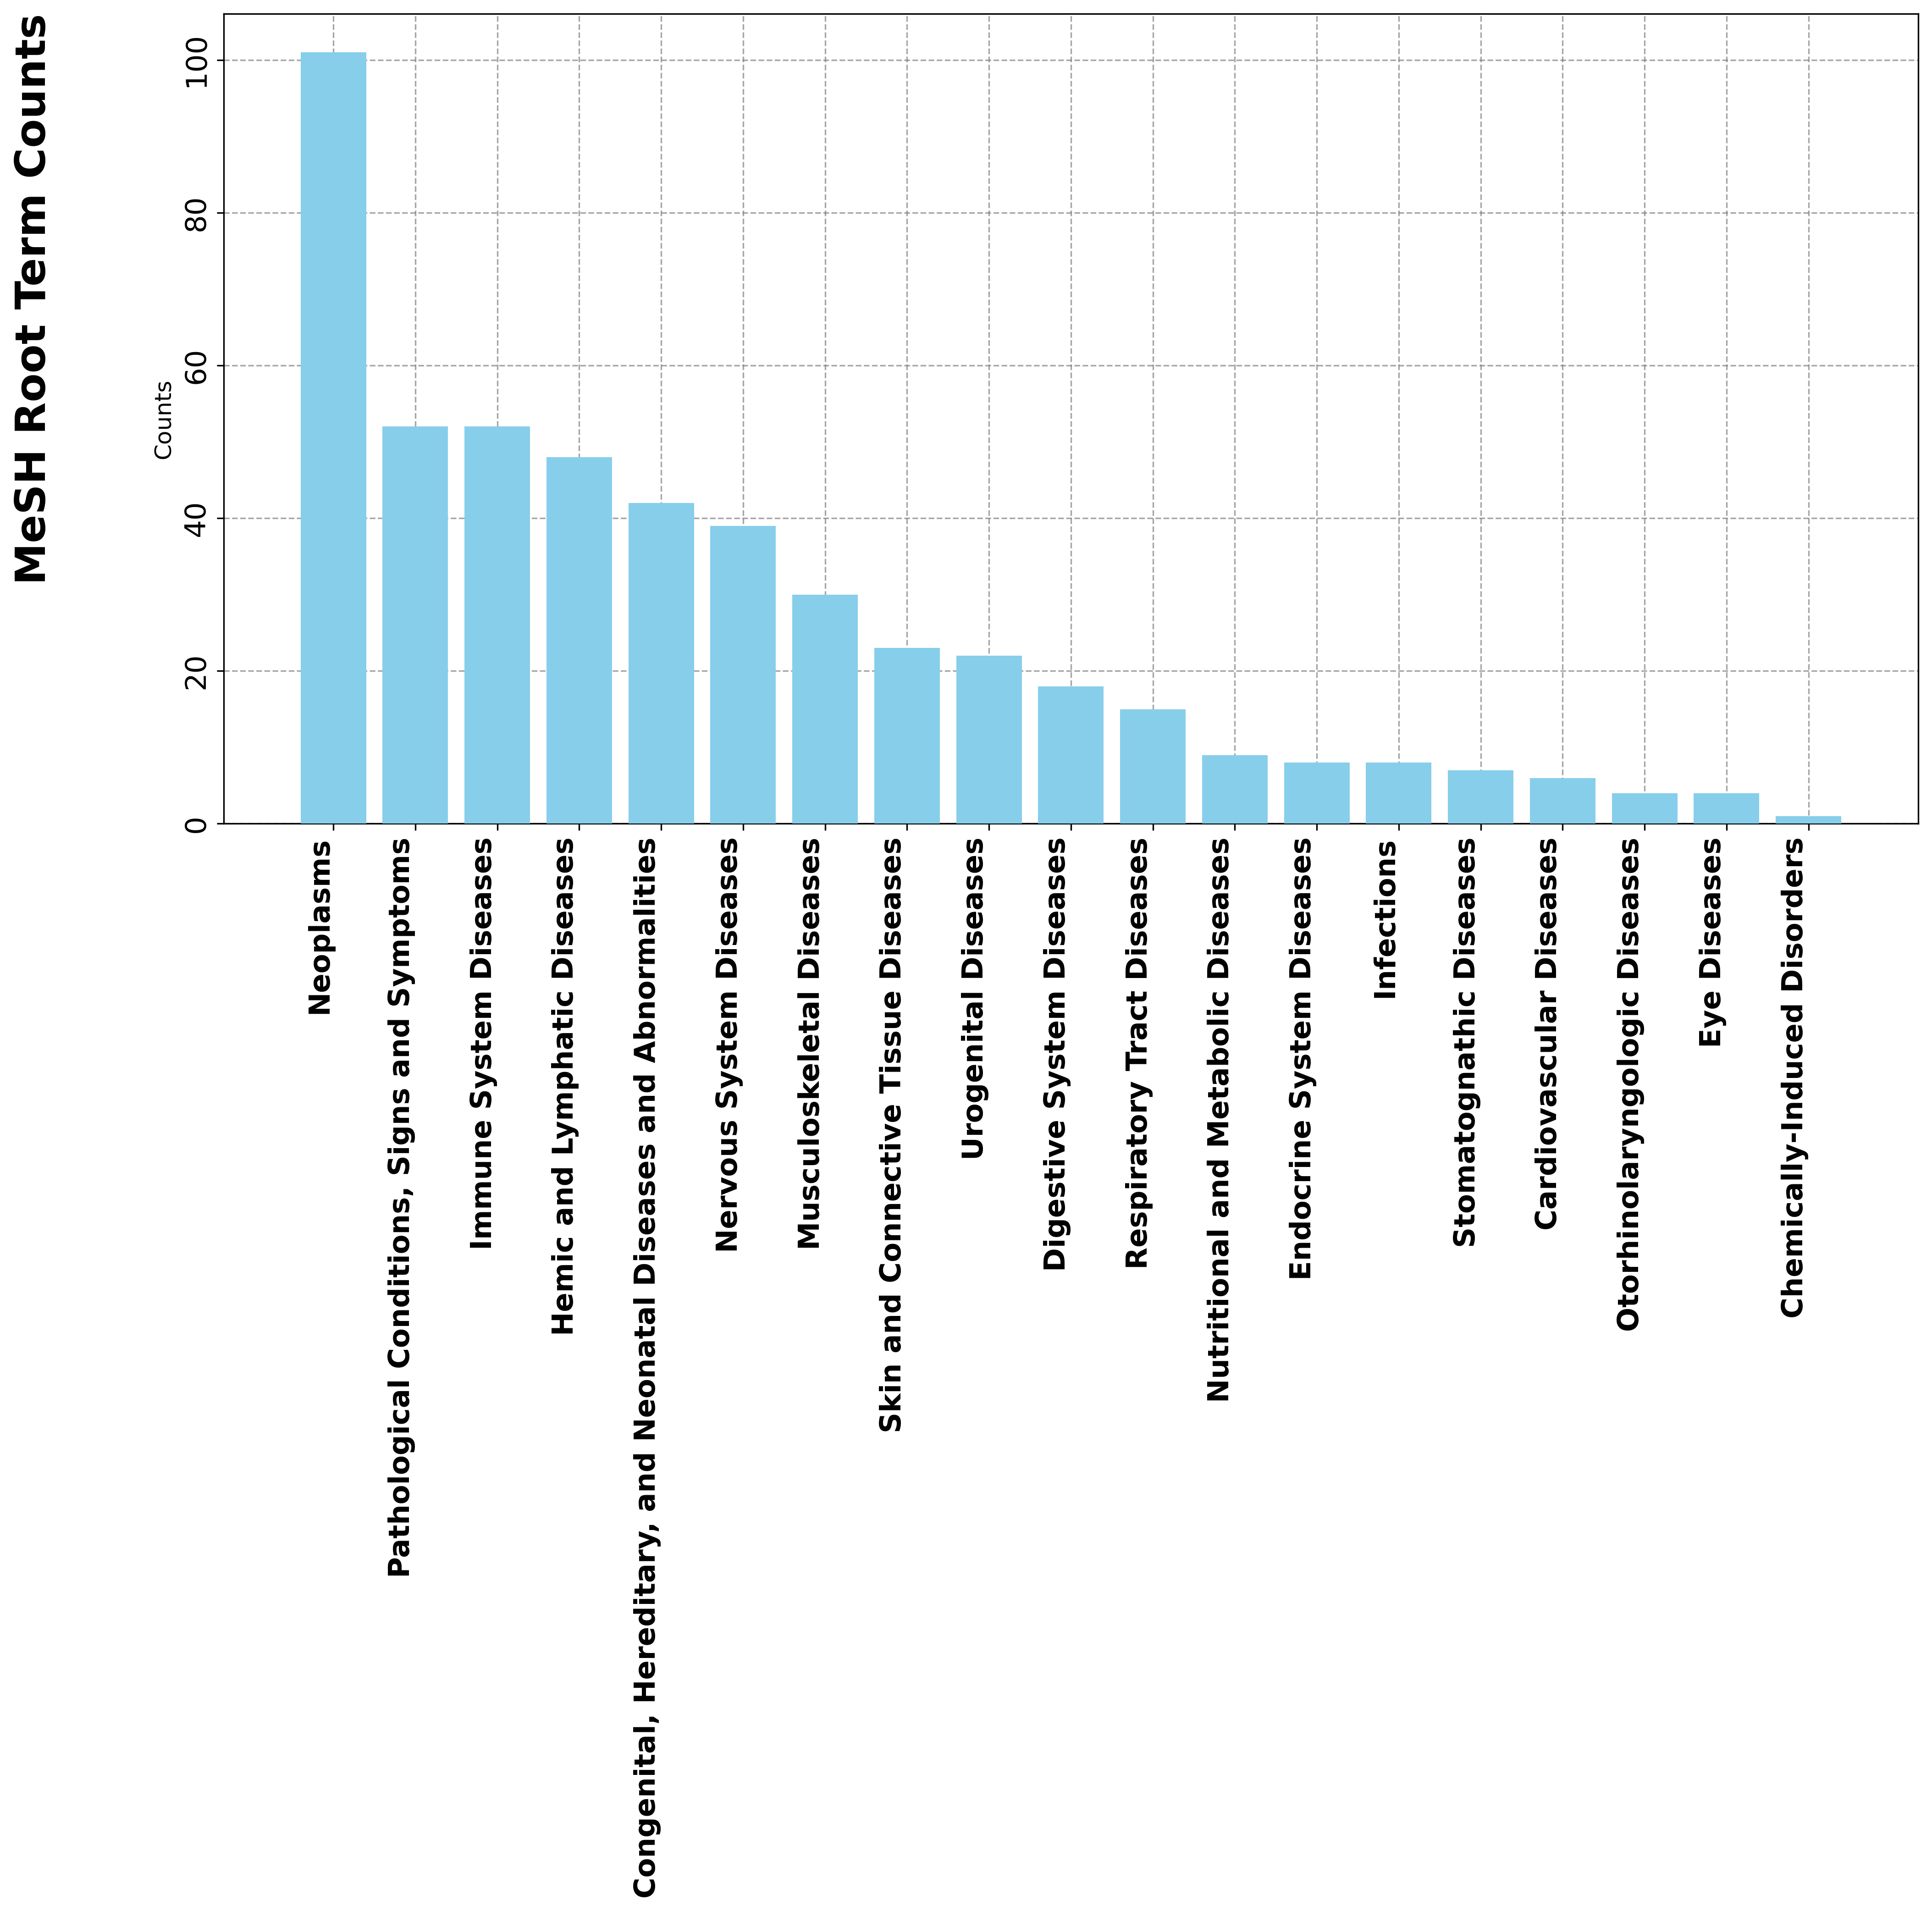

In [236]:
import matplotlib.pyplot as plt
from collections import Counter


# Count the occurrences of each category
category_counts = Counter(all_terms)


# Sort the categories by count in descending order
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_categories)

# Create the bar plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=300)
plt.bar(labels, values, color="skyblue", zorder=3)

# Add title and labels to the plot
# plt.title('MeSH Term Counts Hierarchy Level %d' %level,fontsize=22)

# Manually add a title-like text above the y-axis label
ax.text(
    -0.1,
    1,
    "MeSH Root Term Counts",
    fontsize=22,
    transform=ax.transAxes,
    fontweight="bold",
    va="top",
    ha="right",
    rotation=90,
)

plt.ylabel("Counts", fontsize=12)

# Add grid lines with a white background
ax.set_facecolor("white")  # Set the background color to white

# plt.grid(axis='y', color='r', linestyle='--', alpha=0.7)
plt.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)

# Add edges
ax.spines["bottom"].set_color("0")
ax.spines["top"].set_color("0")
ax.spines["right"].set_color("0")
ax.spines["left"].set_color("0")

# Rotate the category labels for better readability (if needed)
plt.yticks(rotation=90, va="center", fontsize=15)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha="right", fontsize=15, fontweight="bold")

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig("../results/figures/iLINCS/MeSH_Categories.png")

### Plot: Graph Network

In [10]:
# Overlap

level = 0
level_split = level * 4 + 3
all_symbols = list()

for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(set([t[:level_split] for t in terms]))
        all_symbols.append(terms_specific_level)

# translate terms
all_terms = list()
for sub_list in all_symbols:
    all_terms.append([mesh_symbol_2_term[s] for s in sub_list])

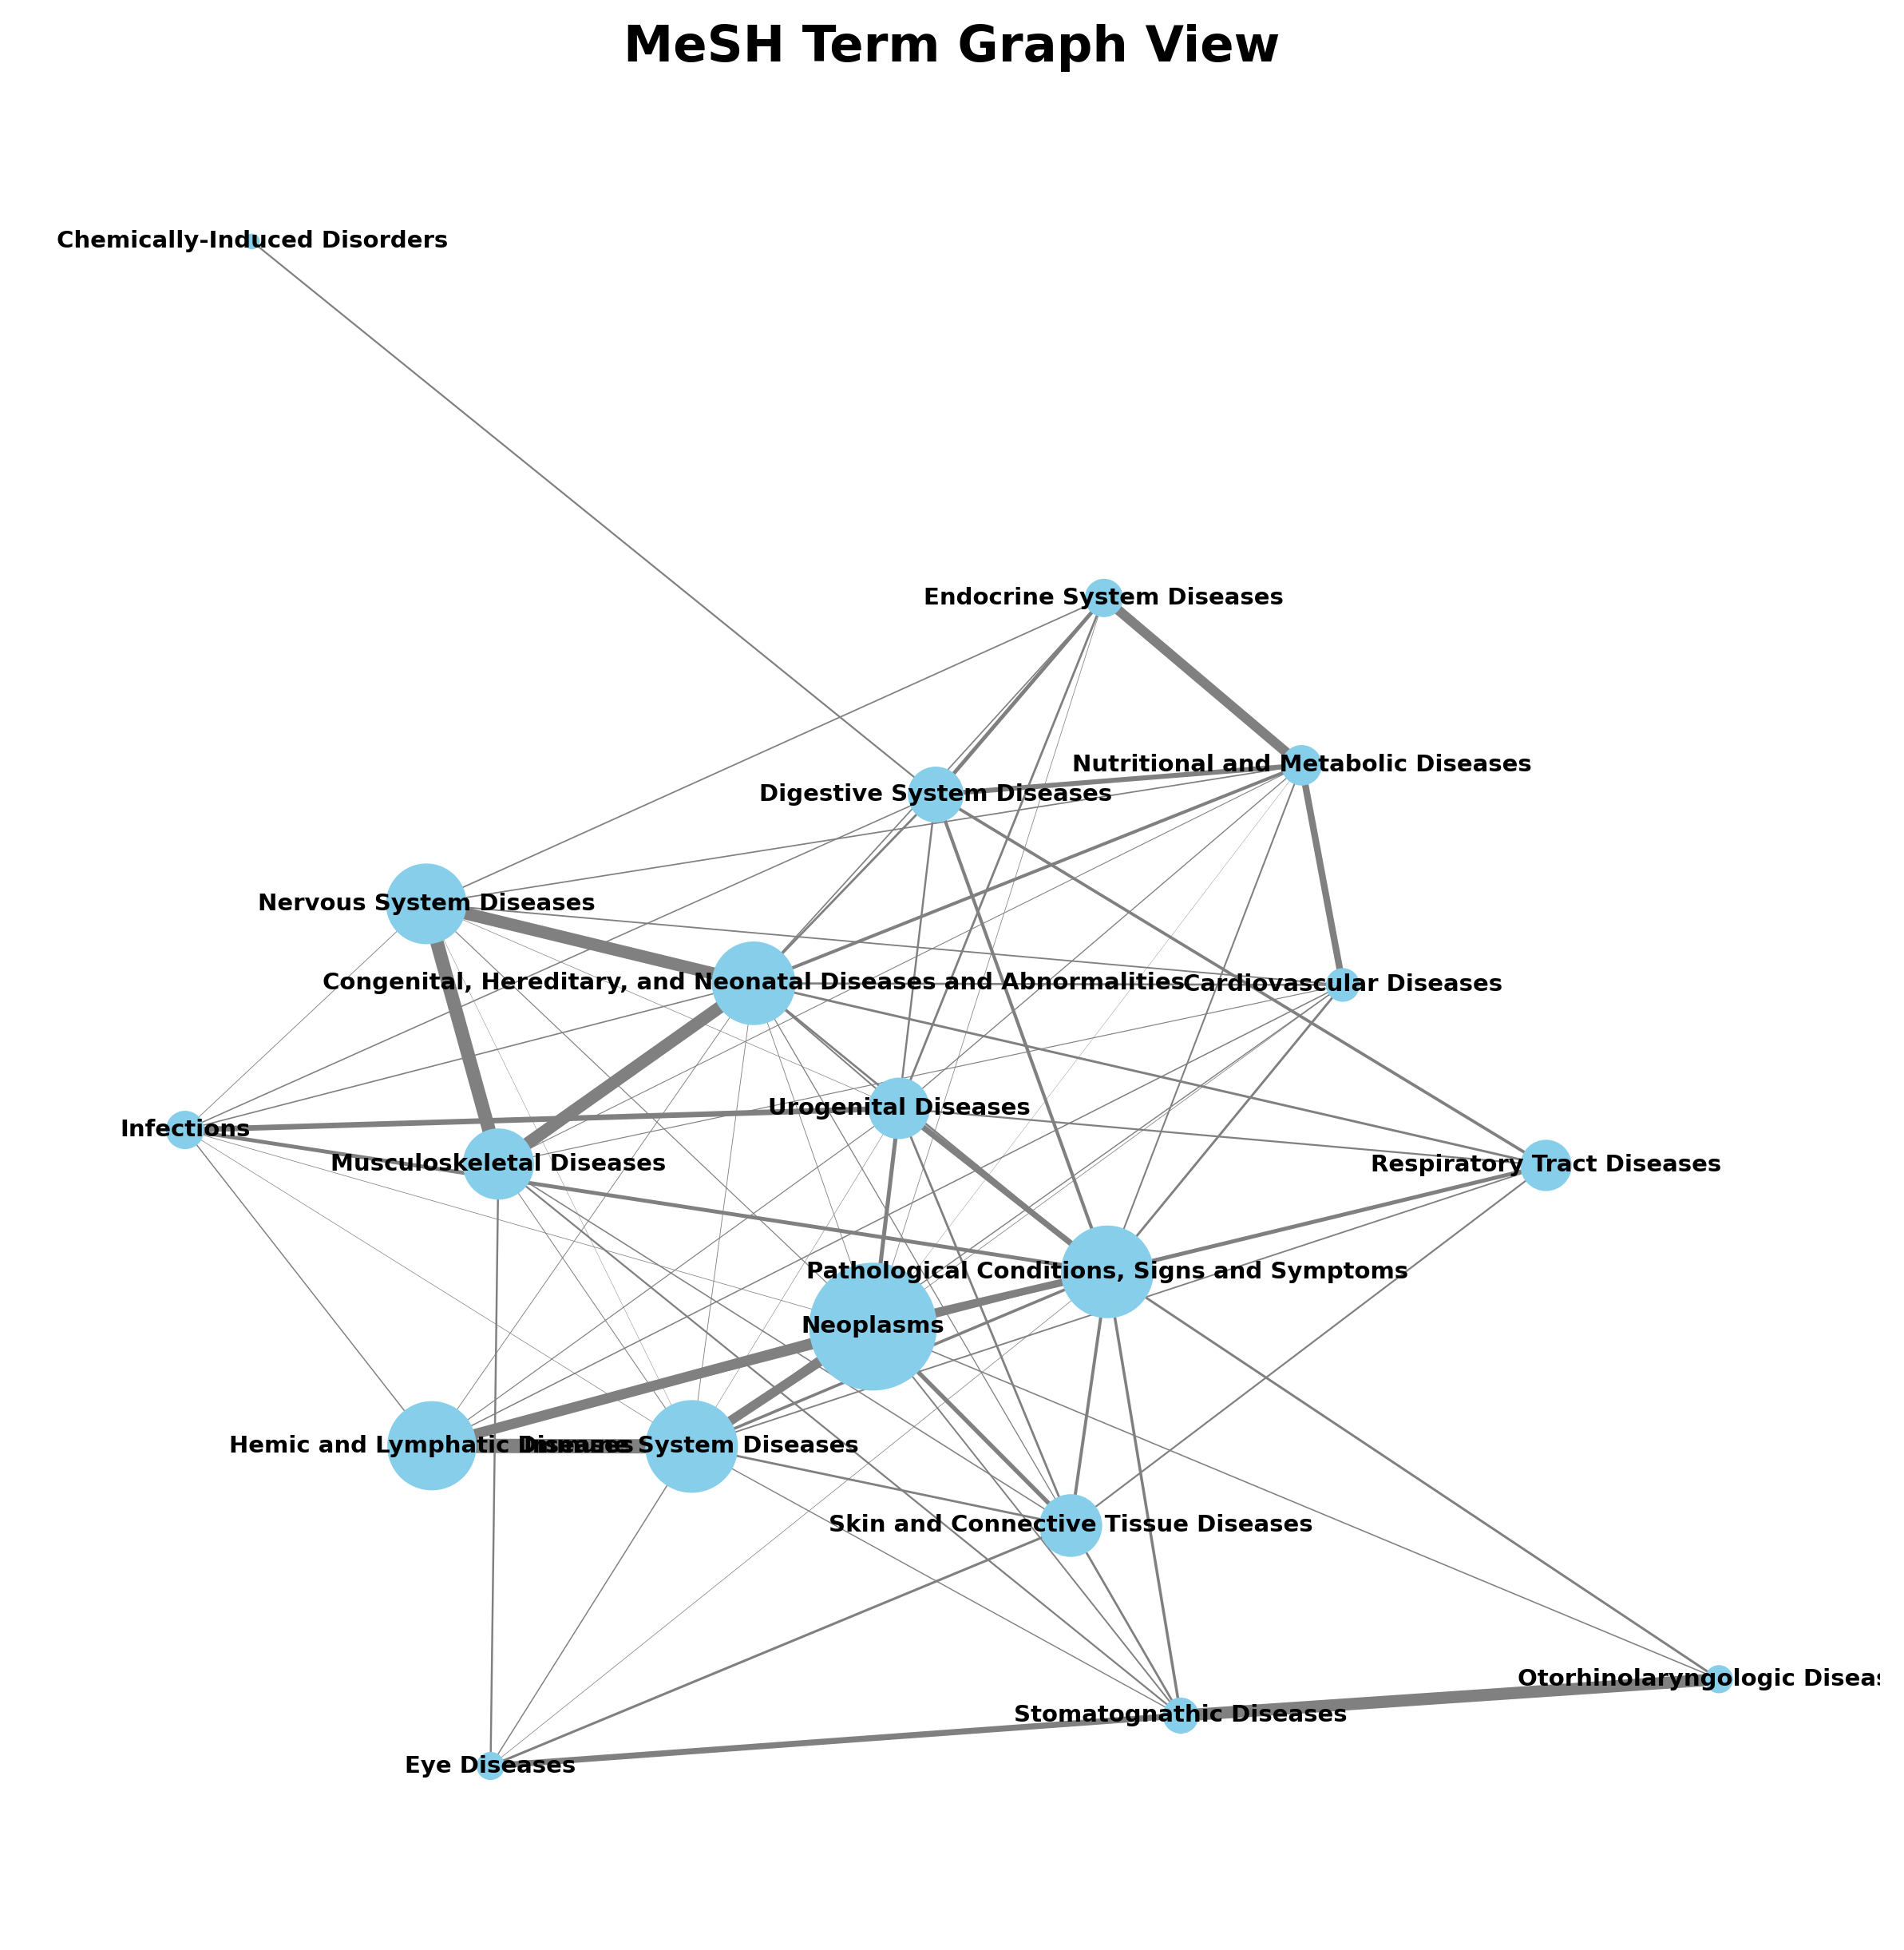

In [11]:
from collections import defaultdict
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Create a dictionary to count overlaps
overlap_counts = defaultdict(int)

# Count co-occurrences of all pairs of terms
for terms in all_terms:
    for term1, term2 in itertools.combinations(terms, 2):
        ordered_pair = tuple(sorted([term1, term2]))
        overlap_counts[ordered_pair] += 1

# Calculate total number of studies
total_studies = len(all_terms)

# Count occurrences of each term
term_frequencies = defaultdict(int)
for terms in all_terms:
    for term in terms:
        term_frequencies[term] += 1

# Count co-occurrences of all pairs of terms
overlap_counts = defaultdict(int)
for terms in all_terms:
    for term1, term2 in itertools.combinations(terms, 2):
        ordered_pair = tuple(sorted([term1, term2]))
        overlap_counts[ordered_pair] += 1

# Normalize the overlap counts
normalized_overlaps = {}
for (term1, term2), count in overlap_counts.items():
    min_frequency = max(term_frequencies[term1], term_frequencies[term2])
    min_frequency = (term_frequencies[term1] + term_frequencies[term2]) / 2
    normalized_overlaps[(term1, term2)] = count / min_frequency

# Create the graph
G = nx.Graph()

# Add nodes with size attribute
max_frequency = max(term_frequencies.values())  # Find the maximum frequency for scaling
for term, frequency in term_frequencies.items():
    G.add_node(term, size=frequency / max_frequency * 1000)  # Scale node size

# Add edges with weights based on overlap strength
for pair, weight in normalized_overlaps.items():
    G.add_edge(pair[0], pair[1], weight=weight)

# Graph layout
pos = nx.spring_layout(G, k=0.4)  # or any other layout

# Set the size of the plot and DPI
plt.figure(figsize=(10, 10), dpi=300)  # DPI set to 300 for high resolution

# Drawing the nodes and edges separately to specify different styles
node_color = "skyblue"  # Node color
edge_color = "gray"  # Edge color
edge_width = [
    G[u][v]["weight"] * 5 for u, v in G.edges()
]  # Edge width based on 'weight' attribute

# Draw nodes with sizes proportional to term frequency
node_sizes = [G.nodes[term]["size"] * 1.4 for term in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color)

# Draw edges
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=7, font_weight="bold")  # Reduce font size

plt.title("MeSH Term Graph View", fontsize=15, fontweight="bold")
plt.axis("off")  # Turn off the axis
plt.savefig("../results/figures/iLINCS/MeSH_Categories.graph.png")

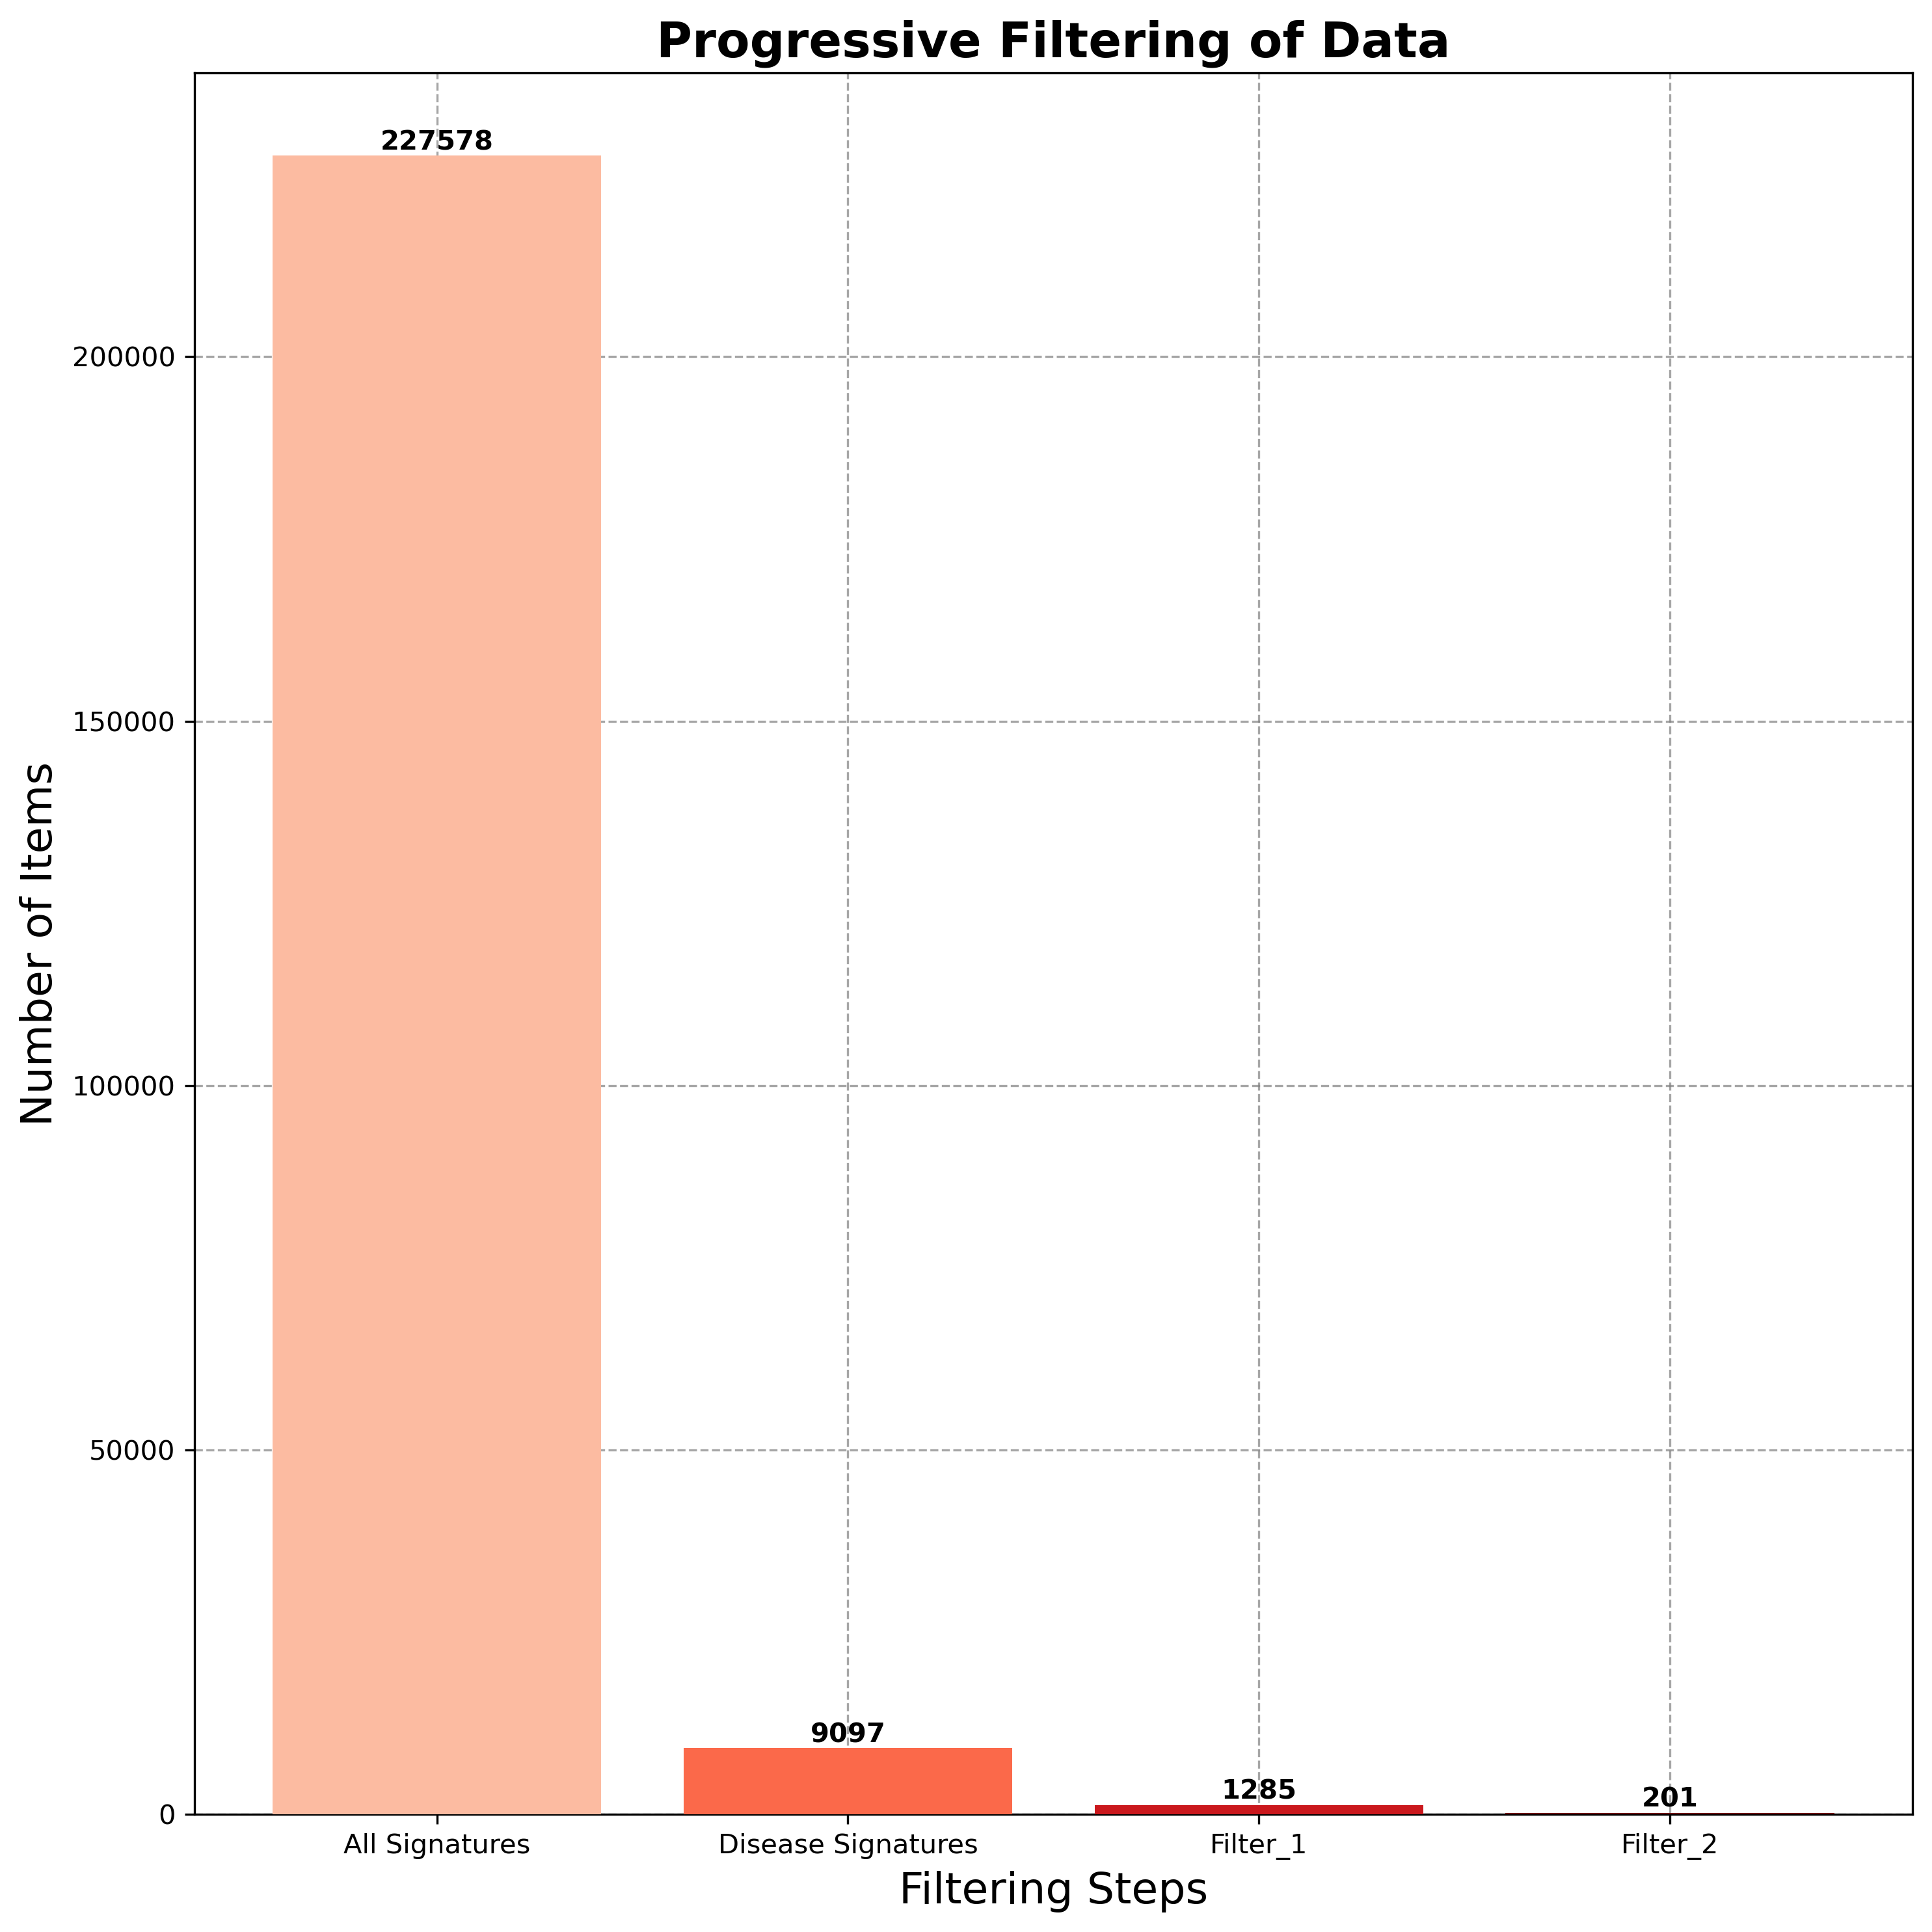

In [12]:
# n signatures from disease.state
n_signatures = len(signatures)
n_signatures_diseases = len([s for s in signatures if s["libraryid"] == "LIB_1"])
n_signatures_filter_1 = len([s for s in signatures if s["factor"] == "disease.state"])
n_signatures_filter_2 = len([s for s in signatures if filter_criteria(s)])

# Sample data: number of items at each step of the filtering process
steps = ["All Signatures", "Disease Signatures", "Filter_1", "Filter_2"]
data = [
    n_signatures,
    n_signatures_diseases,
    n_signatures_filter_1,
    n_signatures_filter_2,
]  # Replace with your actual data

# Create a gradient color list
colors = plt.cm.Reds(np.linspace(0, 1, len(data) + 1))[1:]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=300)

# Create bars with gradient colors
bars = plt.bar(steps, data, color=colors, zorder=3)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 20,
        round(yval, 2),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Add grid lines with a white background
ax.set_facecolor("white")  # Set the background color to white

# plt.grid(axis='y', color='r', linestyle='--', alpha=0.7)
plt.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)

# Add edges
ax.spines["bottom"].set_color("0")
ax.spines["top"].set_color("0")
ax.spines["right"].set_color("0")
ax.spines["left"].set_color("0")

# Set the title and labels
plt.title("Progressive Filtering of Data", fontsize=18, fontweight="bold")
plt.xlabel("Filtering Steps", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)

# Add text box with filter explanations
filter_explanations = """
Filter 1: "disease.state"
Filter 2: "disease.state" vs "control"/"healthy"/"normal"
"""

# plt.annotate(filter_explanations, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

# Use a stylish theme
# plt.style.use('ggplot')

plt.tight_layout()
plt.savefig("../results/figures/iLINCS/Filtering_1.png")

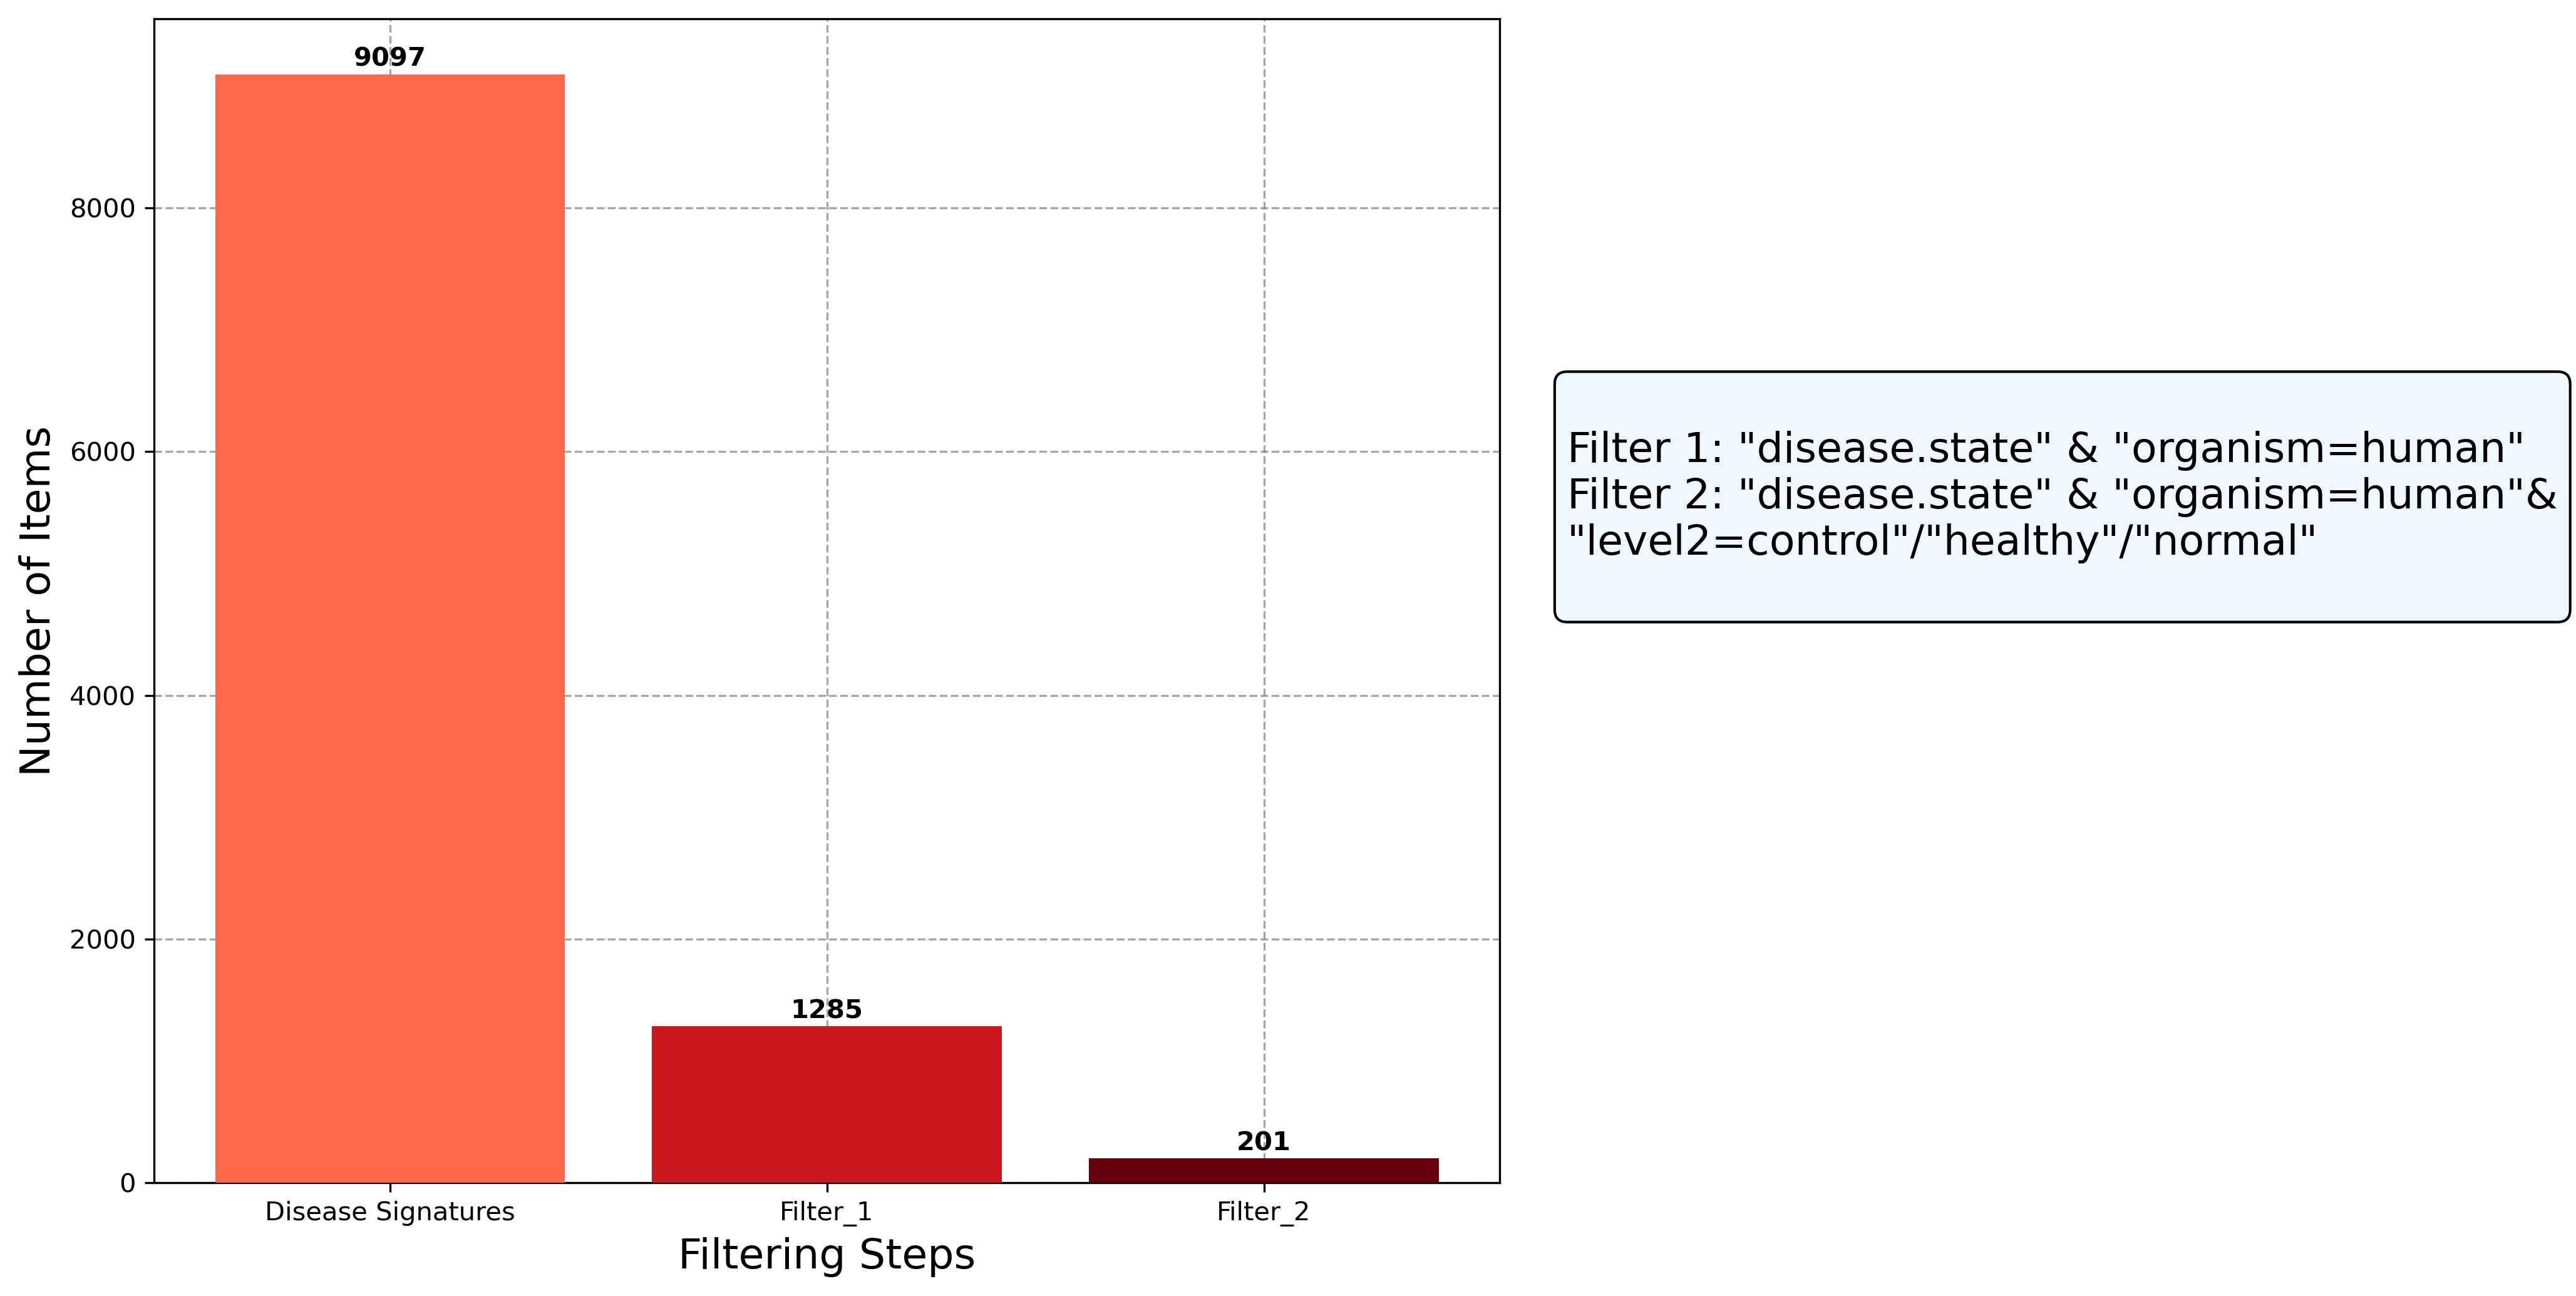

In [13]:
# n signatures from disease.state
n_signatures = len(signatures)
n_signatures_diseases = len([s for s in signatures if s["libraryid"] == "LIB_1"])
n_signatures_filter_1 = len([s for s in signatures if s["factor"] == "disease.state"])
n_signatures_filter_2 = len([s for s in signatures if filter_criteria(s)])

# Sample data: number of items at each step of the filtering process
steps = ["Disease Signatures", "Filter_1", "Filter_2"]
data = [
    n_signatures_diseases,
    n_signatures_filter_1,
    n_signatures_filter_2,
]  # Replace with your actual data

# Create a gradient color list
colors = plt.cm.Reds(np.linspace(0, 1, 5))[2:]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=300)

# Create bars with gradient colors
bars = plt.bar(steps, data, color=colors, zorder=3)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 20,
        round(yval, 2),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Add grid lines with a white background
ax.set_facecolor("white")  # Set the background color to white

# plt.grid(axis='y', color='r', linestyle='--', alpha=0.7)
plt.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)

# Add edges
ax.spines["bottom"].set_color("0")
ax.spines["top"].set_color("0")
ax.spines["right"].set_color("0")
ax.spines["left"].set_color("0")

# Set the title and labels
# plt.title('Progressive Filtering of Data', fontsize=18, fontweight='bold')
plt.xlabel("Filtering Steps", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)

# Add text box with filter explanations
filter_explanations = """
Filter 1: "disease.state" & "organism=human"
Filter 2: "disease.state" & "organism=human"&\n"level2=control"/"healthy"/"normal"
"""

plt.annotate(
    filter_explanations,
    xy=(1.05, 0.5),
    xycoords="axes fraction",
    fontsize=16,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"),
)

# Use a stylish theme
# plt.style.use('ggplot')

plt.tight_layout()
plt.savefig("../results/figures/iLINCS/Filtering_2.png")

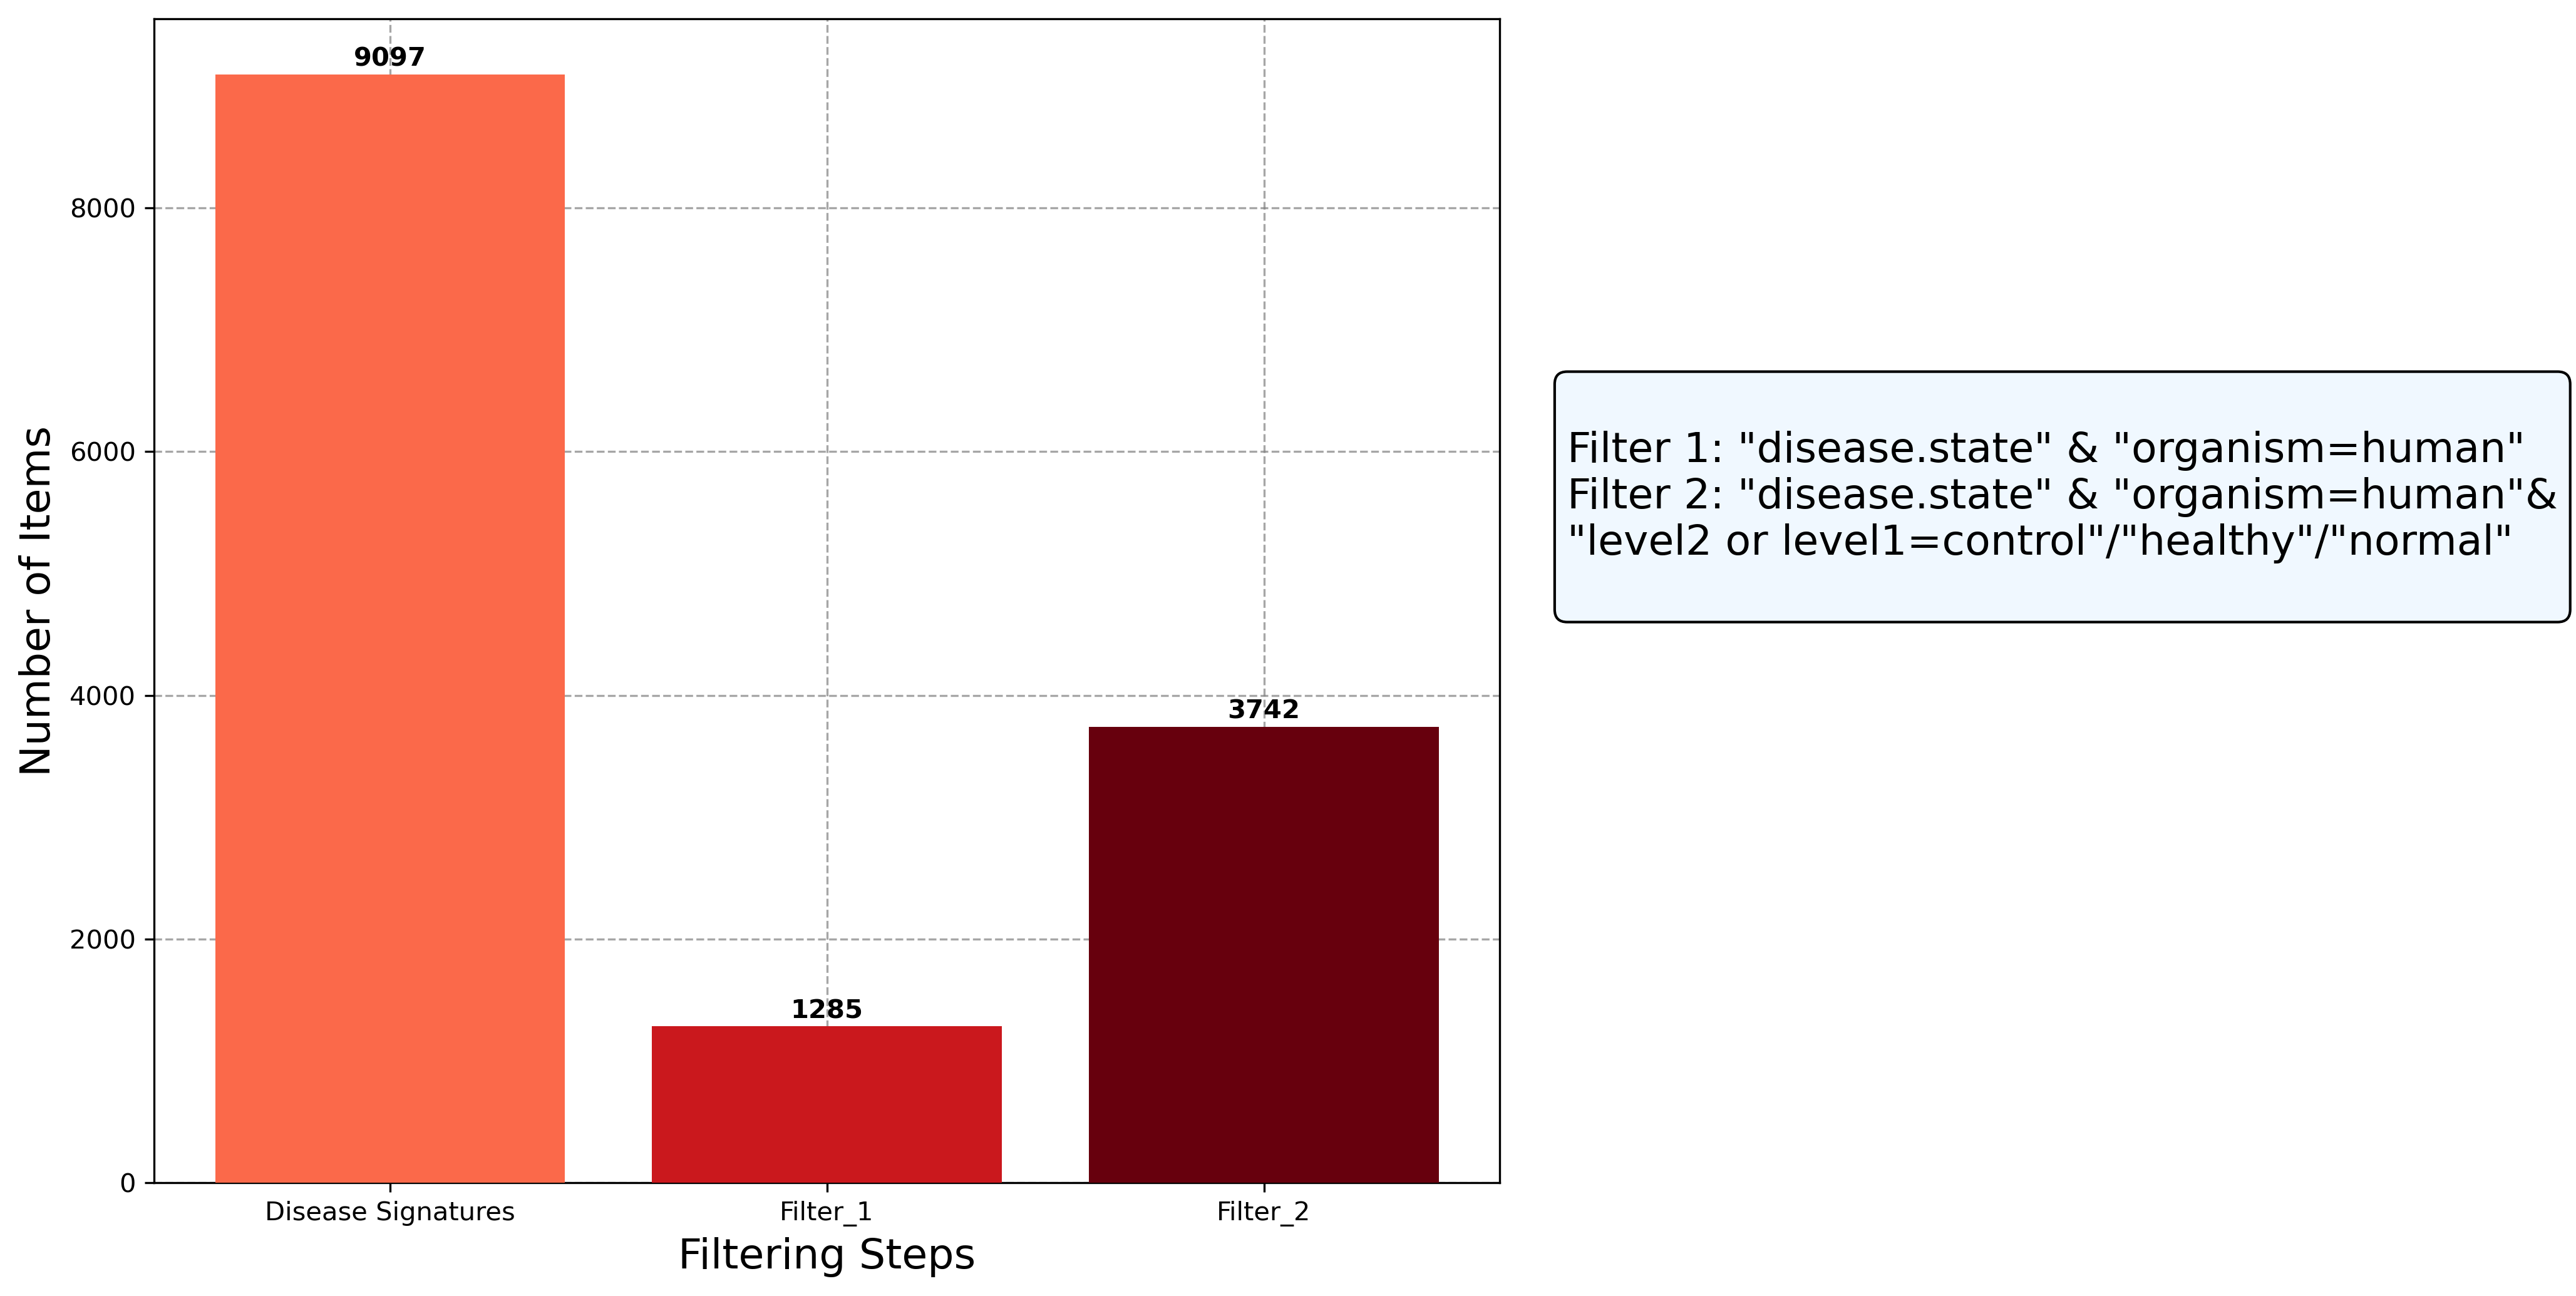

In [348]:
filter_criteria_2 = lambda s: (s["factor"] == "disease.state") and (
    "normal" in s["level2"]
    or "control" in s["level2"]
    or "healthy" in s["level2"]
    or "normal" in s["level1"]
    or "control" in s["level1"]
    or "healthy" in s["level1"]
)

filter_criteria_2 = lambda s: (s["level2"] != None and s["level1"] != None) and (
    "normal" in s["level2"]
    or "control" in s["level2"]
    or "healthy" in s["level2"]
    or "normal" in s["level1"]
    or "control" in s["level1"]
    or "healthy" in s["level1"]
)


# n signatures from disease.state
n_signatures = len(signatures)
n_signatures_diseases = len([s for s in signatures if s["libraryid"] == "LIB_1"])
n_signatures_filter_1 = len([s for s in signatures if s["factor"] == "disease.state"])
n_signatures_filter_2 = len([s for s in signatures if filter_criteria_2(s)])

# Sample data: number of items at each step of the filtering process
steps = ["Disease Signatures", "Filter_1", "Filter_2"]
data = [
    n_signatures_diseases,
    n_signatures_filter_1,
    n_signatures_filter_2,
]  # Replace with your actual data

# Create a gradient color list
colors = plt.cm.Reds(np.linspace(0, 1, 5))[2:]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=300)

# Create bars with gradient colors
bars = plt.bar(steps, data, color=colors, zorder=3)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 20,
        round(yval, 2),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Add grid lines with a white background
ax.set_facecolor("white")  # Set the background color to white

# plt.grid(axis='y', color='r', linestyle='--', alpha=0.7)
plt.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)

# Add edges
ax.spines["bottom"].set_color("0")
ax.spines["top"].set_color("0")
ax.spines["right"].set_color("0")
ax.spines["left"].set_color("0")

# Set the title and labels
# plt.title('Progressive Filtering of Data', fontsize=18, fontweight='bold')
plt.xlabel("Filtering Steps", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)

# Add text box with filter explanations
filter_explanations = """
Filter 1: "disease.state" & "organism=human"
Filter 2: "disease.state" & "organism=human"&\n"level2 or level1=control"/"healthy"/"normal"
"""

plt.annotate(
    filter_explanations,
    xy=(1.05, 0.5),
    xycoords="axes fraction",
    fontsize=16,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"),
)

# Use a stylish theme
# plt.style.use('ggplot')

plt.tight_layout()
plt.savefig("../results/figures/iLINCS/Filtering_2.method_2.png")

## Compute Similarity Metrics

In [3]:
"""Compute Similarity Metrics

iLINCS bechmarked several methods for "connecting" transcriptional signatures.
These include Extreme & Weighted correlations, Connectivity Score, Connectivity Map
and correlation based on Log Significance. 

Overall, all six methods performed very well in the bechmark. The decision was made
to use the Extreme Correlation of Signed Log P-values utilizing top 100 up- and down-
regulated genes as it showd best performance. 

Weighted Correlations are also used as they are almost as good but esasier to compute.

Here we implement iLINCS Extreme Correlations.

Structure:
    1. Imports, Variables, Functions
    2. Retrieve Data & Compute Extreme Signed Significance
    3. Compute Correlation of Extreme Signed Significance
    4. Benchmark Results
"""
# 1. Imports, Variables, Functions
# imports
import scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
import logging
import time, requests

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

# variables
# signatures defined before previous code !
signatureIDs = ["LINCSCP_10272", "LINCSCP_10268"]
filter_criteria = lambda s: (s["factor"] == "disease.state") and (
    "normal" in s["level2"] or "control" in s["level2"] or "healthy" in s["level2"]
)
signatureIDs = list(set([s["signatureid"] for s in signatures if filter_criteria(s)]))

# functions


def download_signature_data(signature_ids, no_of_top_genes, display):
    """
    Download iLINCS Signature Data

    Arguments:
    - signature_ids: list()
        List of signature IDs
    - no_of_top_genes: int()
        Nº of top DE genes
    - display: bool()

    Returns:
    - respose.json()
        Response obtained
    """
    endpoint = "http://www.ilincs.org/api/ilincsR/downloadSignature"
    data = {
        "sigID": ",".join(signature_ids),
        "noOfTopGenes": no_of_top_genes,
        "display": display,
    }
    response = requests.post(endpoint, data=data)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code, response.text)
        return None


def download_batch_signature_data(signature_ids, no_of_top_genes, display):
    """
    Download iLINCS Signature Data - optimized for Batch downloads

    Arguments:
    - signature_ids: list()
        List of signature IDs
    - no_of_top_genes: int()
        Nº of top DE genes
    - display: bool()

    Returns:
    - processed_data: dict()
        Dictionary w/ SignatureID -> [{}]
    """
    endpoint = "http://www.ilincs.org/api/ilincsR/downloadSignature"
    data = {
        "sigID": ",".join(signature_ids),
        "noOfTopGenes": no_of_top_genes,
        "display": display,
    }
    response = requests.post(endpoint, data=data)
    if response.status_code == 200:
        # Process the response to separate data by signatureID
        raw_data = response.json()
        processed_data = {}
        for item in raw_data["data"]["signature"]:
            signatureID = item["signatureID"]
            if signatureID not in processed_data:
                processed_data[signatureID] = []
            processed_data[signatureID].append(item)
        return processed_data
    else:
        print("Error:", response.status_code, response.text)
        return None


def download_batch_signature_data(
    signature_ids, no_of_top_genes, display, batch_size=10
):
    """
    Download iLINCS Signature Data - optimized for Batch downloads

    Arguments:
    - signature_ids: list of str
        List of signature IDs
    - no_of_top_genes: int
        Number of top differentially expressed genes
    - display: bool
        Whether to display the data
    - batch_size: int
        Number of signatures to download in each batch

    Returns:
    - processed_data: dict
        Dictionary with SignatureID -> [{}]
    """
    endpoint = "http://www.ilincs.org/api/ilincsR/downloadSignature"
    processed_data = {}

    for i in range(0, len(signature_ids), batch_size):
        print(f"Batch {i}", end="\r")

        batch_ids = signature_ids[i : i + batch_size]
        data = {
            "sigID": ",".join(batch_ids),
            "noOfTopGenes": no_of_top_genes,
            "display": display,
        }
        response = requests.post(endpoint, data=data)
        if response.status_code == 200:
            raw_data = response.json()
            for item in raw_data["data"]["signature"]:
                signatureID = item["signatureID"]
                if signatureID not in processed_data:
                    processed_data[signatureID] = []
                processed_data[signatureID].append(item)

        else:
            print(
                f"Error in batch {i // batch_size + 1}: {response.status_code}, {response.text}"
            )

    print()
    return processed_data


def compute_signed_significance(signature):
    """
    Calculate signed significance for each gene in the signature.
    Args:
    - signature: list of dict()
        Signature data for genes

    Returns:
    - signed_significance: list of tupples
        List of gene ids and signed significance
    - d_signed_significance: dict()
        Dictionary gene -> signed significance
    """
    signed_significance = list()
    de_values = list()
    for gene in signature:
        sign = np.sign(gene["Value_LogDiffExp"])
        ss = sign * (-np.log10(gene["Significance_pvalue"]))
        signed_significance.append((gene["ID_geneid"], ss))
        de_values.append((gene["ID_geneid"], gene["Value_LogDiffExp"]))

    return signed_significance, de_values


def compute_extreme_signed_significance(signed_significance, k=100):
    """
    Compute Extreme Signed Significance for top & bottom k ss genes, rest
    are assigned value of 0.

    Arguments:
    - signed_significance: list of tupples
        List of tupples [(geneid,ss), ...]
    - k: int()
        Top/Bottom k genes.

    Returns:
    - extreme_signed_significance: list of tupples
        List of gene ids and signed significance
    """
    # sort signed significance by value
    sorted_signed_significance = sorted(
        signed_significance, key=lambda x: x[1], reverse=True
    )

    # get top_bottom values
    top_bottom_genes = [ss[0] for ss in sorted_signed_significance[:k]] + [
        ss[0] for ss in sorted_signed_significance[-k:]
    ]

    # set values for non top/bottom k to 0
    extreme_signed_significance = {
        gene: ss if gene in top_bottom_genes else 0 for gene, ss in signed_significance
    }

    return extreme_signed_significance


def compute_pearson_correlation(signature1, signature2):
    """
    Compute pearson correlation between two signed significances.

    Arguments:
    - signature1: dict()
        Signed significance of the first signature (gene_id:signed_significance)
    - signature2: dict()
        Signed significance of the first signature (gene_id:signed_significance)

    Returns:
    - corr: float()
        Pearson Correlation
    """
    # Get list of all genes
    # common_genes = set(signature1.keys()).intersection(set(signature2.keys()))
    all_genes = set(list(signature1.keys()) + list(signature1.keys()))

    # Extract the values for the common genes
    values1 = [signature1.get(gene, 0) for gene in all_genes]
    values2 = [signature2.get(gene, 0) for gene in all_genes]

    # Compute the Pearson correlation for these values
    correlation = np.corrcoef(values1, values2)[0, 1]

    return correlation, values1, values2


def compute_extreme_pearson_correlation(signature1, signature2):
    """
    Compute the Extreme Pearson Correlation between two extreme signed significances.

    Arguments:
    - signature1: dict()
        Extreme signed significance of the first signature (gene_id: extreme_signed_significance).
    - signature2: dict()
        Extreme signed significance of the second signature (gene_id: extreme_signed_significance).

    Returns:
    - correlation: float()
        Extreme Pearson Correlation value.
    """
    # Get list of all genes
    # common_genes = set(signature1.keys()).intersection(set(signature2.keys()))
    all_genes = set(list(signature1.keys()) + list(signature1.keys()))

    # Extract the values for the common genes
    values1 = [signature1.get(gene, 0) for gene in all_genes]
    values2 = [signature2.get(gene, 0) for gene in all_genes]

    # Compute the Pearson correlation for these values
    correlation = np.corrcoef(values1, values2)[0, 1]

    return correlation, values1, values2


def calculate_p_value(r, N):
    """
    Calculate the statistical significance (p-value) of the Pearson correlation.

    Arguments:
    - r: float
        Pearson correlation coefficient.
    - N: int
        Number of observations.

    Returns:
    - float
        P-value of the Pearson correlation.
    """
    # Calculate the t-statistic
    t_statistic = r * np.sqrt(N - 2) / np.sqrt(1 - r**2)

    # Calculate the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=N - 2))

    return p_value


# 2. Retrieve Data & Compute Extreme Signed Significance
start_time = time.time()
logging.info(f"Starting batch download for signatures:")

# Download signature data for all IDs at once
# signature_data_batch = download_batch_signature_data(signatureIDs, 100000, True)
signature_data_batch = download_batch_signature_data(
    signature_ids=signatureIDs, no_of_top_genes=100000, display=True, batch_size=20
)


end_time = time.time()
logging.info(
    f"Finished batch download for signatures. Total time taken: %.4f seconds"
    % (end_time - start_time)
)

start_time = time.time()
logging.info("Starting processing signatures")
d_extreme_signed_significance = dict()
extreme_signed_significances = list()
succesful_signatureIDs = list()
for signatureID in signatureIDs:
    if signatureID in signature_data_batch:
        # Compute Signed Significance
        signed_significance, de_values = compute_signed_significance(
            signature=signature_data_batch[signatureID]
        )

        # Compute Extreme Signed Significance
        extreme_signed_significance = compute_extreme_signed_significance(
            signed_significance=signed_significance
        )

        # Store in Dictionary
        d_extreme_signed_significance[signatureID] = extreme_signed_significance

        # store successful signatureID & extreme_signed_significance
        extreme_signed_significances.append(extreme_signed_significance)
        succesful_signatureIDs.append(signatureID)
    else:
        logging.warning(f"No data found for signature {signatureID}")

extreme_signed_significances = np.array(extreme_signed_significances)
succesful_signatureIDs = np.array(succesful_signatureIDs)

end_time = time.time()
logging.info(
    f"Finished processing signatures. Total time taken: %.4f seconds"
    % (end_time - start_time)
)

2023-12-07 14:28:45,177 - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-12-07 14:28:45,177 - INFO - NumExpr defaulting to 8 threads.
2023-12-07 14:28:45,366 - INFO - Starting batch download for signatures:


2023-12-07 14:32:59,128 - INFO - Finished batch download for signatures. Total time taken: 253.7625 seconds
2023-12-07 14:32:59,129 - INFO - Starting processing signatures


2023-12-07 14:33:04,201 - INFO - Finished processing signatures. Total time taken: 5.0724 seconds


In [18]:
# 3. Compute Correlation of Extreme Signed Significance
start_time = time.time()
logging.info(f"Starting Computation of Extreme Signed Significance:")

# Initialize an empty matrix
correlation_matrix = np.zeros(
    (len(succesful_signatureIDs), len(succesful_signatureIDs)), dtype=np.float16
)

# Compute the correlation for each unique pair of elements
for i in range(len(succesful_signatureIDs)):
    for j in range(
        i, len(succesful_signatureIDs)
    ):  # Start from i to avoid repeating calculations
        if i == j:
            correlation_matrix[
                i, j
            ] = 1  # The correlation of an element with itself is always 1
        else:
            correlation, values1, values2 = compute_extreme_pearson_correlation(
                extreme_signed_significances[i], extreme_signed_significances[j]
            )
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation  # Mirror the value

end_time = time.time()
logging.info(
    f"Finished Computation of Extreme Signed Significance. Total time taken: %.4f seconds"
    % (end_time - start_time)
)
start_time = time.time()

2023-11-18 18:17:06,686 - INFO - Starting Computation of Extreme Signed Significance:
2023-11-18 18:18:31,535 - INFO - Finished Computation of Extreme Signed Significance. Total time taken: 84.8490 seconds


In [19]:
# 4. Benchmark Results
# Retrieve Signature Datat
signature1_data = download_signature_data(["LINCSCP_10272"], 100000, True)
signature2_data = download_signature_data(["LINCSCP_10268"], 100000, True)

# Compute Signed Significance
signed_sig1, de_values1 = compute_signed_significance(
    signature1_data["data"]["signature"]
)
signed_sig2, de_values2 = compute_signed_significance(
    signature2_data["data"]["signature"]
)

# Map de values to genes
d_de_values1 = {gene: ss for gene, ss in de_values1}
d_de_values2 = {gene: ss for gene, ss in de_values2}

extreme_signed_sig1 = compute_extreme_signed_significance(signed_sig1)
extreme_signed_sig2 = compute_extreme_signed_significance(signed_sig2)

correlation, v1, v2 = compute_pearson_correlation(d_de_values1, d_de_values2)
print(f"Pearson Correlation:{correlation}")

extreme_correlation, e_v1, e_v2 = compute_extreme_pearson_correlation(
    extreme_signed_sig1, extreme_signed_sig2
)
print(f"Extreme Pearson Correlation:{extreme_correlation}")

Pearson Correlation:0.6355522987165013
Extreme Pearson Correlation:0.5265241456835295


In [20]:
N = len(set(extreme_signed_sig1.keys()).union(set(extreme_signed_sig2.keys())))
p_value = calculate_p_value(extreme_correlation, N)

print("Extreme Pearson Correlation:", extreme_correlation)
print("P-Value:%.6f" % p_value)

Extreme Pearson Correlation: 0.5265241456835295
P-Value:0.000000


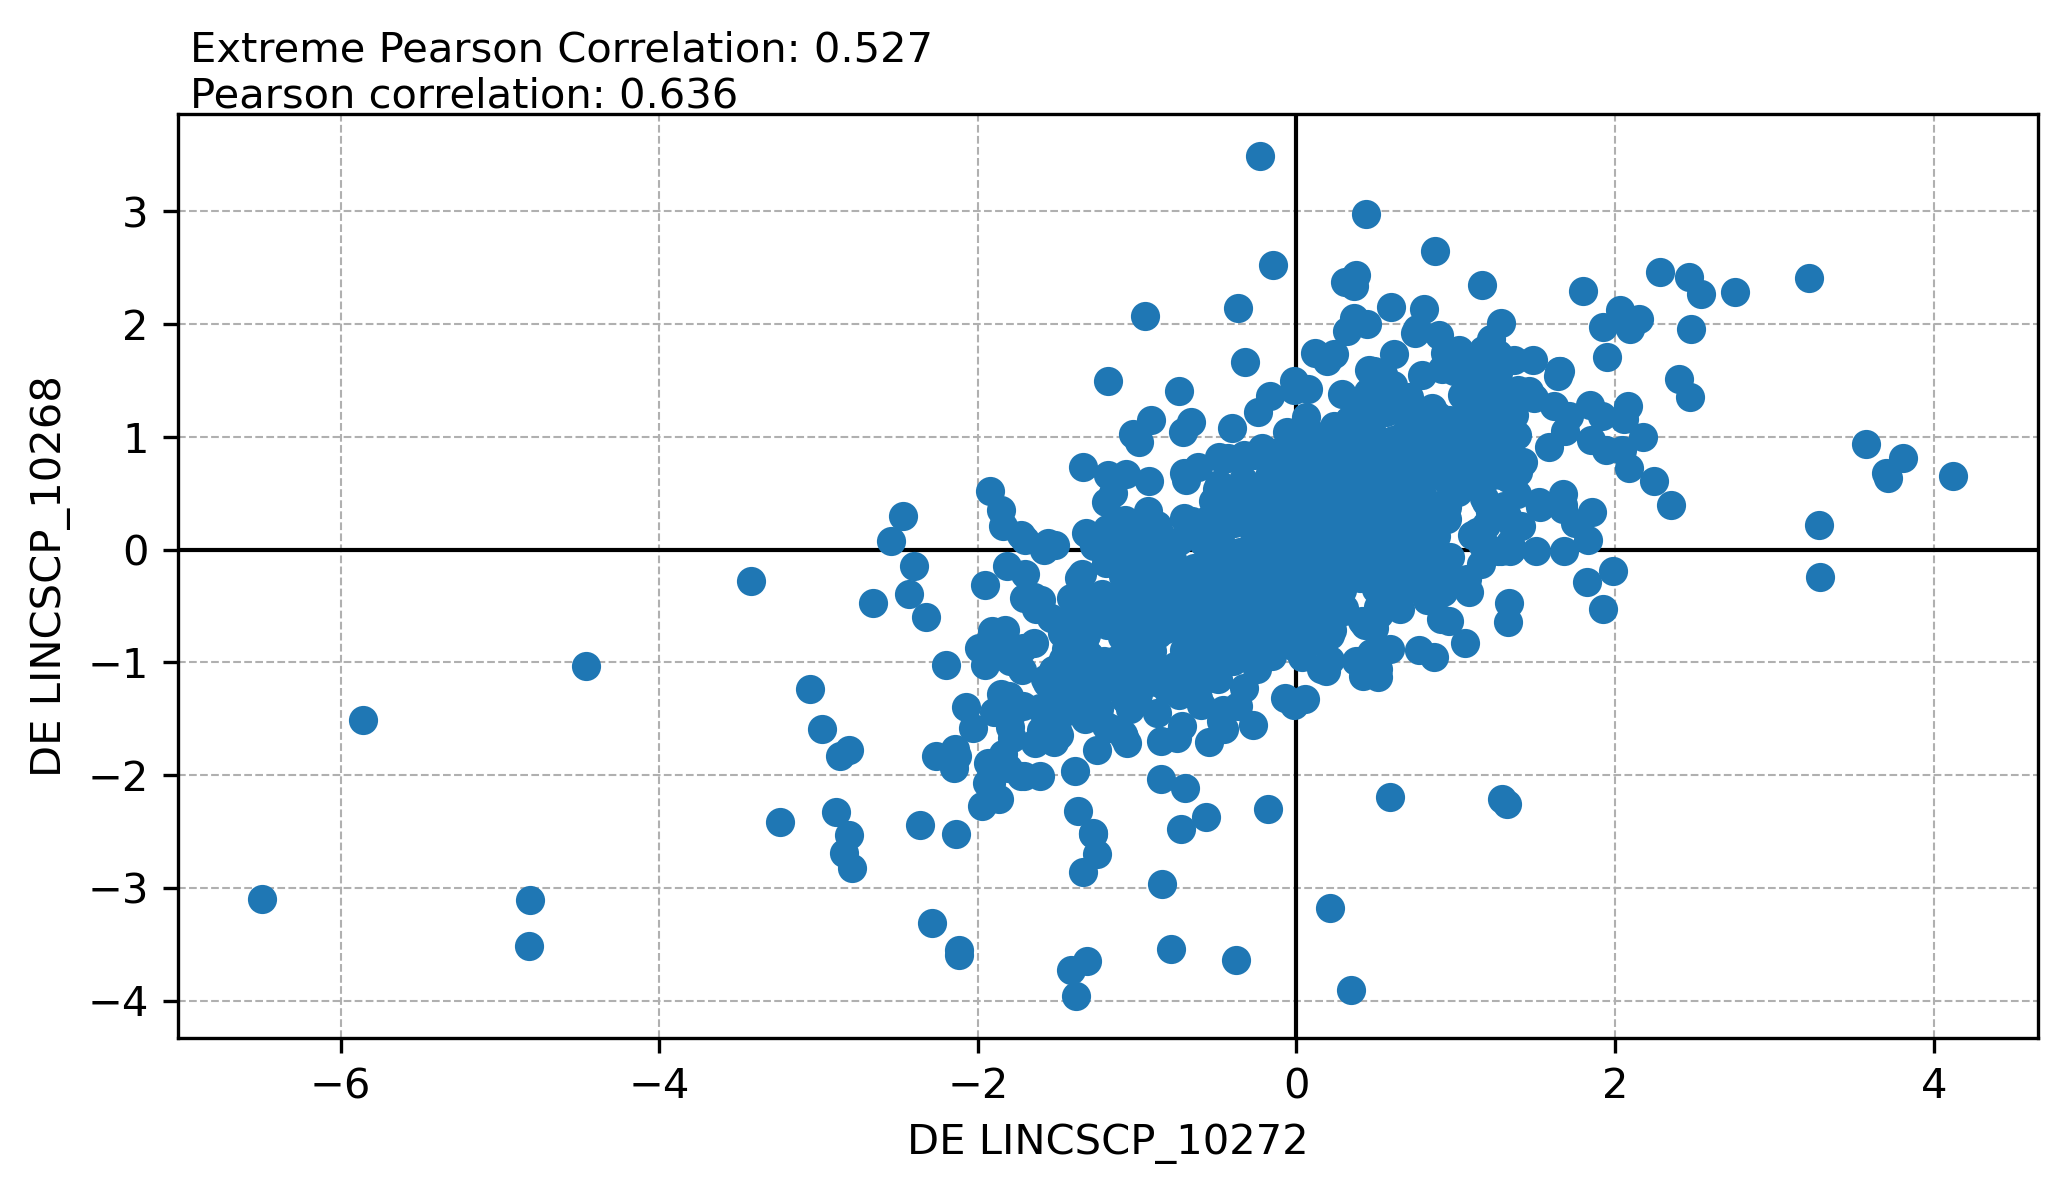

In [21]:
import matplotlib.pyplot as plt

# Create figure with given size
fig = plt.figure(figsize=(8, 4), dpi=300)

# Create scatter plot
plt.scatter(v1, v2, zorder=3)

# Add grid with dashed lines
plt.grid(True, which="both", linestyle="--", linewidth=0.5, zorder=2)

# Draw black line at y=0 and x=0
plt.axhline(y=0, color="black", linewidth=1.0)
plt.axvline(x=0, color="black", linewidth=1.0)

# Add note/label with specific text
plt.text(
    0.13,
    0.95,
    f"Extreme Pearson Correlation: %.3f\nPearson correlation: %.3f"
    % (extreme_correlation, correlation),
    transform=fig.transFigure,
    verticalalignment="top",
)

# plt.suptitle("Correlation Plot")

# Add X and Y labels
plt.xlabel("DE LINCSCP_10272")
plt.ylabel("DE LINCSCP_10268")
plt.savefig("../results/figures/iLINCS/benchmark.connectivity_analysis.png")

### Hierarchical Clustering

/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 9000x9000 with 0 Axes>

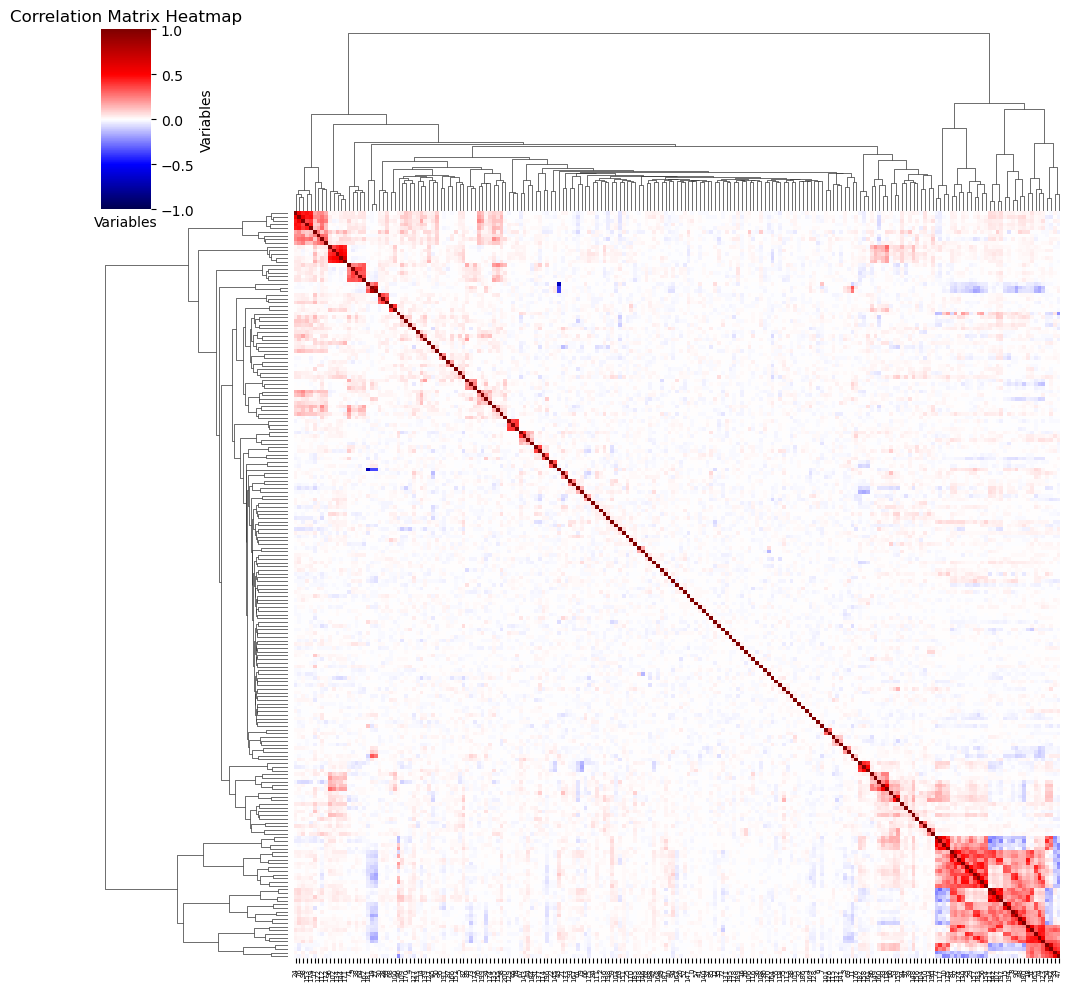

In [323]:
plt.figure(figsize=(30, 30), dpi=300)  # Increase figure size


# Create a clustered heatmap
clustergrid = sns.clustermap(
    correlation_matrix,
    method="ward",
    cmap="seismic",
    xticklabels=True,
    yticklabels=False,
    vmin=-1,
    vmax=1,
)

row_order = clustergrid.dendrogram_row.reordered_ind
col_order = clustergrid.dendrogram_col.reordered_ind

# Set the size of the labels
plt.setp(
    clustergrid.ax_heatmap.xaxis.get_majorticklabels(), fontsize=5
)  # Adjust fontsize as needed


# Add titles and labels as needed
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

plt.savefig(
    "../results/figures/iLINCS/connectivity.hierarchical_correlation.png",
    bbox_inches="tight",
)

In [23]:
from scipy.cluster.hierarchy import fcluster

# Set a distance threshold or determine the number of clusters you want
distance_threshold = 0.1  # Adjust this threshold based on your data and needs

# Extract clusters
clusters_row = fcluster(
    clustergrid.dendrogram_row.linkage, distance_threshold, criterion="distance"
)
clusters_col = fcluster(
    clustergrid.dendrogram_col.linkage, distance_threshold, criterion="distance"
)

In [317]:
# Manual inspection

index_interest = 200
print(type(row_order))
position = np.argwhere(np.array(row_order) == 200)[0][0]
print(position)
position = 9

<class 'list'>
55


In [331]:
row_order[13]

171

In [343]:
annotations = list()
datasets = list()

level = 1
l = int(level * 4 + 3)
for s in succesful_signatureIDs[row_order[-33:]]:
    symbols = d_signature_2_mesh[s]["symbol"]
    if symbols is not None:
        symbols = sorted(list(set([a[:l] for a in d_signature_2_mesh[s]["symbol"]])))

    else:
        symbols = [""]
    datasets.append(d_signature_2_mesh[s]["datasetid"])
    # annotations.append(",".join(symbols))
    annotations.extend([mesh_symbol_2_term.get(s, "") for s in symbols])

print(set(annotations))

{'Immunoproliferative Disorders', 'Lymphatic Diseases', 'Neoplasms by Histologic Type'}


In [250]:
from scipy.cluster.hierarchy import fcluster

# Assuming you have already created your clustergrid as before
# Extract the linkage matrix
row_linkage = clustergrid.dendrogram_row.linkage

# Set a distance threshold or decide the number of clusters
# You may need to adjust this value to match the number of clusters you observe
distance_threshold = 5  # Example threshold, adjust based on your data

# Determine clusters
clusters = fcluster(row_linkage, distance_threshold, criterion="distance")

# Print cluster membership
# for i, cluster_id in enumerate(clusters):
#    print(f"Row {i} belongs to cluster {cluster_id}")
print(clusters)

# Assuming your correlation_matrix is a pandas DataFrame with row labels
# row_labels = correlation_matrix.index
row_labels = row_order

# Create a dictionary or DataFrame mapping row labels to clusters
label_to_cluster = {label: cluster for label, cluster in zip(row_labels, clusters)}

# Now you can identify which labels belong to each cluster
for label, cluster_id in label_to_cluster.items():
    print(f"{label} belongs to cluster {cluster_id}")

[1 3 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 3 2 1 1 2 1 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 3 1
 2 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 3 1 1 1 1 3 1 1 1 2 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 3 2 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 3 1 3 1 1 1 1 1 1
 1 1 3 1 3 1 1 1 1 1 3 1 1 1 1 1]
191 belongs to cluster 1
143 belongs to cluster 3
154 belongs to cluster 1
55 belongs to cluster 1
161 belongs to cluster 1
56 belongs to cluster 1
37 belongs to cluster 1
147 belongs to cluster 1
64 belongs to cluster 1
146 belongs to cluster 1
97 belongs to cluster 2
2 belongs to cluster 1
136 belongs to cluster 1
127 belongs to cluster 2
192 belongs to cluster 1
27 belongs to cluster 1
140 belongs to cluster 1
51 belongs to cluster 1
74 belongs to cluster 1
75 belongs to cluster 1
99 belongs to cluster 1
156 belongs to cluster 1
15 belongs to cluster 1
90 belongs to cluster 2
132 b

In [246]:
cluster_to_label = {v: [].append(k) for k, v in label_to_cluster.items()}

In [251]:
# Create a dictionary to map each cluster to a list of labels
cluster_to_label = {}
for label, cluster_id in label_to_cluster.items():
    if cluster_id not in cluster_to_label:
        cluster_to_label[cluster_id] = []  # Initialize a new list for this cluster ID
    cluster_to_label[cluster_id].append(label)

In [184]:
annotations = list()
level = 0
l = int(level * 4 + 3)
for s in succesful_signatureIDs:
    d = d_signature_2_mesh.get(s, False)
    if d:
        symbols = sorted(list(set([a[:l] for a in d["symbol"]])))
    else:
        symbols = [""]
    annotations.append(",".join(symbols))

print(annotations)

['C04,C07,C23', 'C04,C15,C20', 'C04,C10', 'C10', 'C01,C23', 'C04,C10,C19', 'C04,C23', 'C04,C15,C20,C23', 'C04', 'C06', 'C04,C15,C20', 'C12,C16,C19', 'C04,C15,C20,C23', 'C04,C15,C20', '', 'C05,C10,C16', '', '', 'C04,C08,C12,C17,C23', 'C04,C15,C20', 'C04,C12,C23', 'C12,C23', 'C05,C10,C16', 'C04,C15,C20', 'C04,C17,C23', 'C04,C15,C23', 'C04,C17', 'C05,C10,C16', '', '', 'C04,C15,C20', 'C04,C15,C20,C23', 'C06,C18,C19', 'C08,C20,C23', '', 'C04,C17', 'C16,C17,C20', 'C05,C10,C16', '', '', 'C01,C04,C12,C15,C16,C23', 'C04,C15,C20', 'C04', 'C04,C12', 'C06,C08,C16,C23', 'C06,C18,C19', 'C04,C06', 'C10,C16,C18,C19', 'C04,C15,C20', 'C04,C15,C20', 'C04', 'C05,C10,C16', 'C04,C15,C20', 'C04', 'C04,C15,C20', 'C05,C10,C16', 'C05,C10,C16', 'C04,C15,C20', 'C08,C20', 'C10,C16', 'C04,C17,C23', 'C04,C15,C20', '', 'C04,C17', 'C05,C10,C16', 'C04,C12', 'C04', 'C04,C12', 'C04,C12,C23', 'C14,C16,C18,C23', 'C12,C18,C19', 'C04,C15,C20', 'C08', 'C04,C06,C23', 'C05,C10,C16', 'C05,C10,C16', '', 'C08', 'C10', 'C04,C17', '

#### Correlation Distributions

In [77]:
# 1. Imports, Variables, Functions

# imports (add necessary import statements)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# variables
hierarchy_level = 0
annotations = []  # List to store annotations
datasets = []  # List to store datasets

# Assuming 'd_signature_2_mesh' is a predefined dictionary
# d_signature_2_mesh = ...

# 2. Load Data
# Load correlation matrix and signature IDs
correlation_matrix = correlation_matrix.astype(
    np.float32
)  # Assuming this is already defined
succesful_signatureIDs = succesful_signatureIDs

# Load signatures and their labels
for s in succesful_signatureIDs:
    symbols = d_signature_2_mesh.get(s, {}).get("symbol")
    if symbols:
        # Truncate or process symbols based on hierarchy_level
        symbols = sorted(set(a[: hierarchy_level * 4 + 3] for a in symbols))
    else:
        symbols = [""]
    datasets.append(d_signature_2_mesh.get(s, {}).get("datasetid", ""))
    annotations.append(symbols)

# 3. Filter Correlation Values
term = "C05"  # Term to analyze
same_term_correlations = []  # Store correlations for the same term
diff_term_correlations = []  # Store correlations for different terms

# Traverse the matrix
for i, terms_i in enumerate(annotations):
    if term in terms_i:  # Exclude if row does not CONTAIN term
        for j, terms_j in enumerate(annotations):
            if i != j:  # Exclude self-correlation
                if term in terms_j:
                    same_term_correlations.append(correlation_matrix[i, j])
                else:
                    diff_term_correlations.append(correlation_matrix[i, j])

# Output the counts
print(f"Nº same terms: {len(same_term_correlations)}")
print(f"Nº different terms: {len(diff_term_correlations)}")

Nº same terms: 870
Nº different terms: 5130


In [ ]:
# 4. Plot Correlation Distributions as Percentages Hierarchy Level 0

# Mask by specific terms Hierarchy Level 0
d_terms_counts = dict()
for term in ["C" + "%02d" % i for i in range(30)]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)
        d_terms_counts[term] = np.sum(mask)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(f"{term} - {mesh_symbol_2_term.get(term,'')}  {np.sum(mask)}/{len(mask)}")

# get N top terms
N = 18
sorted_tupples = sorted(d_terms_counts.items(), key=lambda x: x[1], reverse=True)
top_terms = [t[0] for t in sorted_tupples]
print(top_terms[:N])

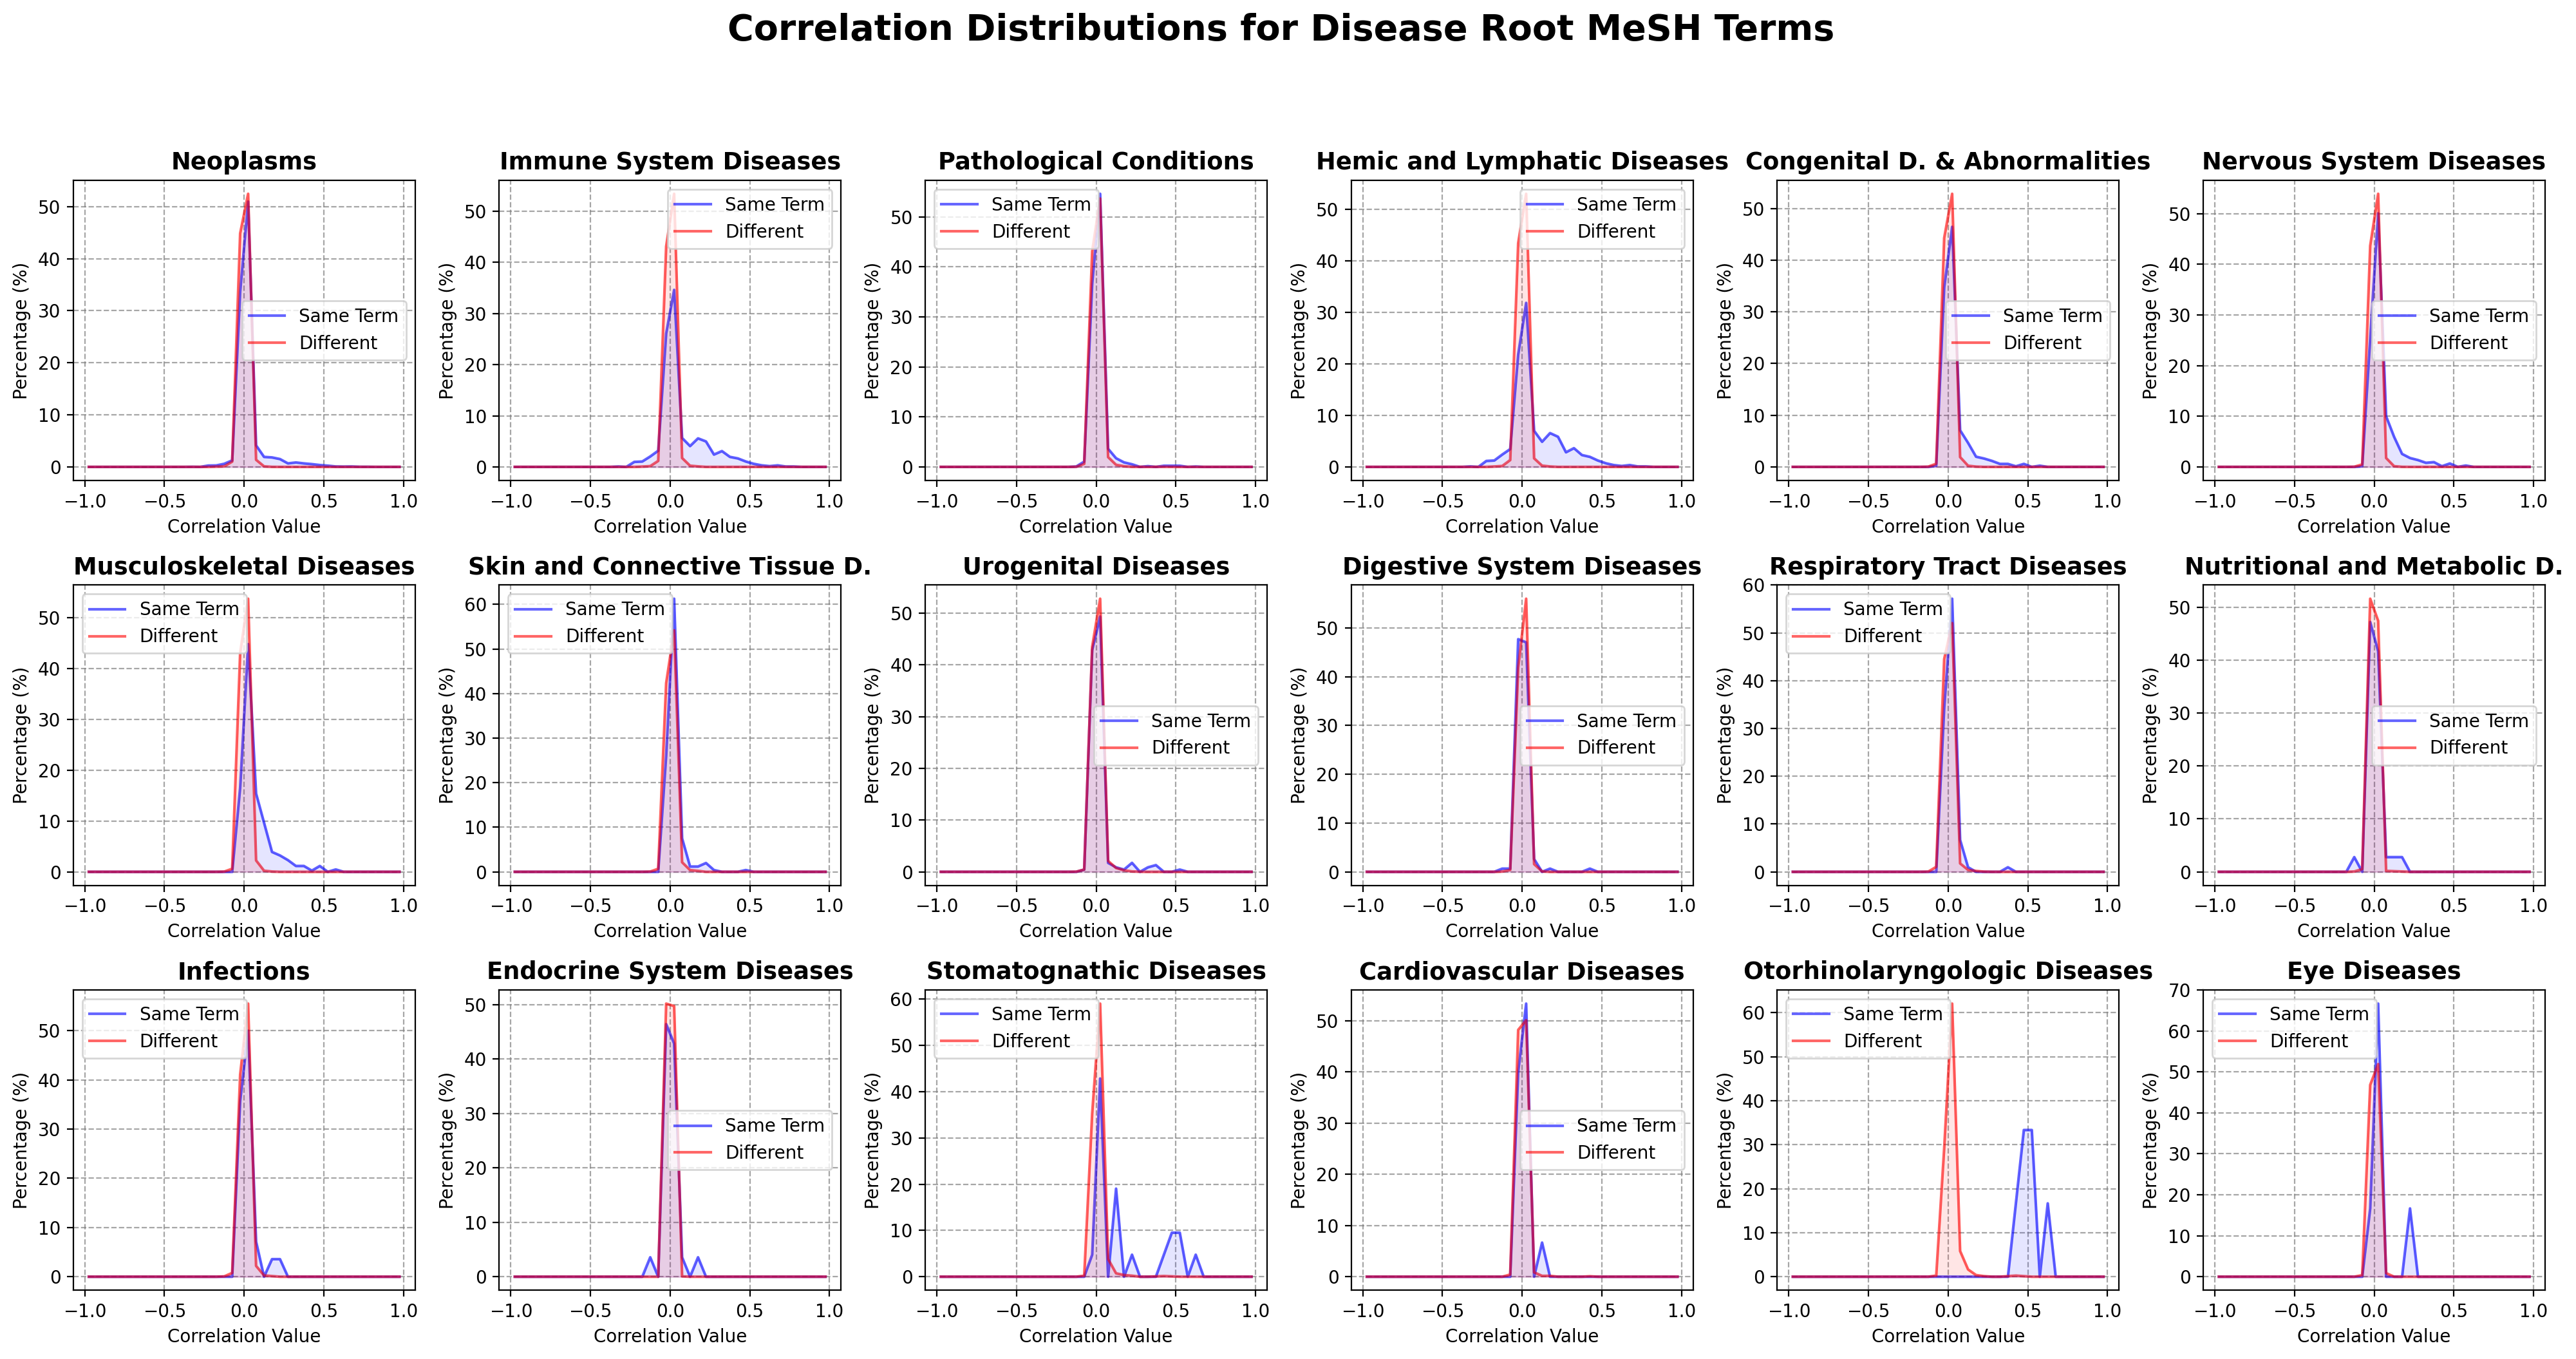

In [177]:
# Terms to be used for masks
terms = top_terms

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10), dpi=200)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define bin width and range
bin_width = 0.05  # Adjust as needed
bin_range = (-1, 1)  # Adjust as needed
bins = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)

for ax, term in zip(axes, terms):
    # Filter Correlation Values for each term
    same_term_correlations = []
    diff_term_correlations = []

    # Traverse the matrix
    for i, terms_i in enumerate(annotations):
        if term in terms_i:  # Exclude if row does not CONTAIN term
            for j, terms_j in enumerate(annotations):
                if i != j:  # Exclude self-correlation
                    if term in terms_j:
                        same_term_correlations.append(correlation_matrix[i, j])
                    else:
                        diff_term_correlations.append(correlation_matrix[i, j])

    # Calculate histograms and convert to percentages
    counts_same, _ = np.histogram(same_term_correlations, bins=bins)
    counts_diff, _ = np.histogram(diff_term_correlations, bins=bins)
    percent_same = counts_same * 100 / counts_same.sum()
    percent_diff = counts_diff * 100 / counts_diff.sum()

    # Calculate bin centers
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Plot lines and fill area under the lines
    ax.plot(bin_centers, percent_same, color="blue", alpha=0.6, zorder=3)
    ax.plot(bin_centers, percent_diff, color="red", alpha=0.6, zorder=3)
    ax.fill_between(bin_centers, percent_same, color="blue", alpha=0.1, zorder=3)
    ax.fill_between(bin_centers, percent_diff, color="red", alpha=0.1, zorder=3)

    # Set title and labels for each subplot
    term_translation = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )

    ax.set_title(term_translation, fontsize=13.25, fontweight="bold")
    ax.set_xlabel("Correlation Value", fontsize=10)
    ax.set_ylabel("Percentage (%)", fontsize=10)
    ax.legend(["Same Term", "Different"], fontsize=10)
    ax.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)

# Adjust layout
fig.suptitle(
    "Correlation Distributions for Disease Root MeSH Terms",
    fontsize=20,
    fontweight="bold",
    y=1.05,
)
plt.tight_layout()
plt.savefig(
    "../results/figures/iLINCS/correlation_distributions.png", bbox_inches="tight"
)

In [190]:
## ONLY NEOPLASM TERMS
hierarchy_level = 2
annotations = []  # List to store annotations
datasets = []  # List to store datasets

# Load signatures and their labels
for s in succesful_signatureIDs:
    symbols = d_signature_2_mesh.get(s, {}).get("symbol")
    if symbols:
        # Truncate or process symbols based on hierarchy_level
        symbols = sorted(set(a[: hierarchy_level * 4 + 3] for a in symbols))
    else:
        symbols = [""]
    datasets.append(d_signature_2_mesh.get(s, {}).get("datasetid", ""))
    annotations.append(symbols)

['C04.700.250', 'C04.588.322', 'C04', 'C04.557.595', 'C04.588.805', 'C04.834.154', 'C04.557.450', 'C04.834', 'C04.588.614', 'C04.697.098', 'C04.588.894', 'C04.557.665']


['C04.557.386', 'C04.557.470', 'C04.557.337', 'C04.588.180', 'C04.588.945', 'C04.588.443', 'C04.557.465', 'C04.557.580', 'C04.697.650', 'C04.588.274', 'C04.697.645', 'C04.588.614']


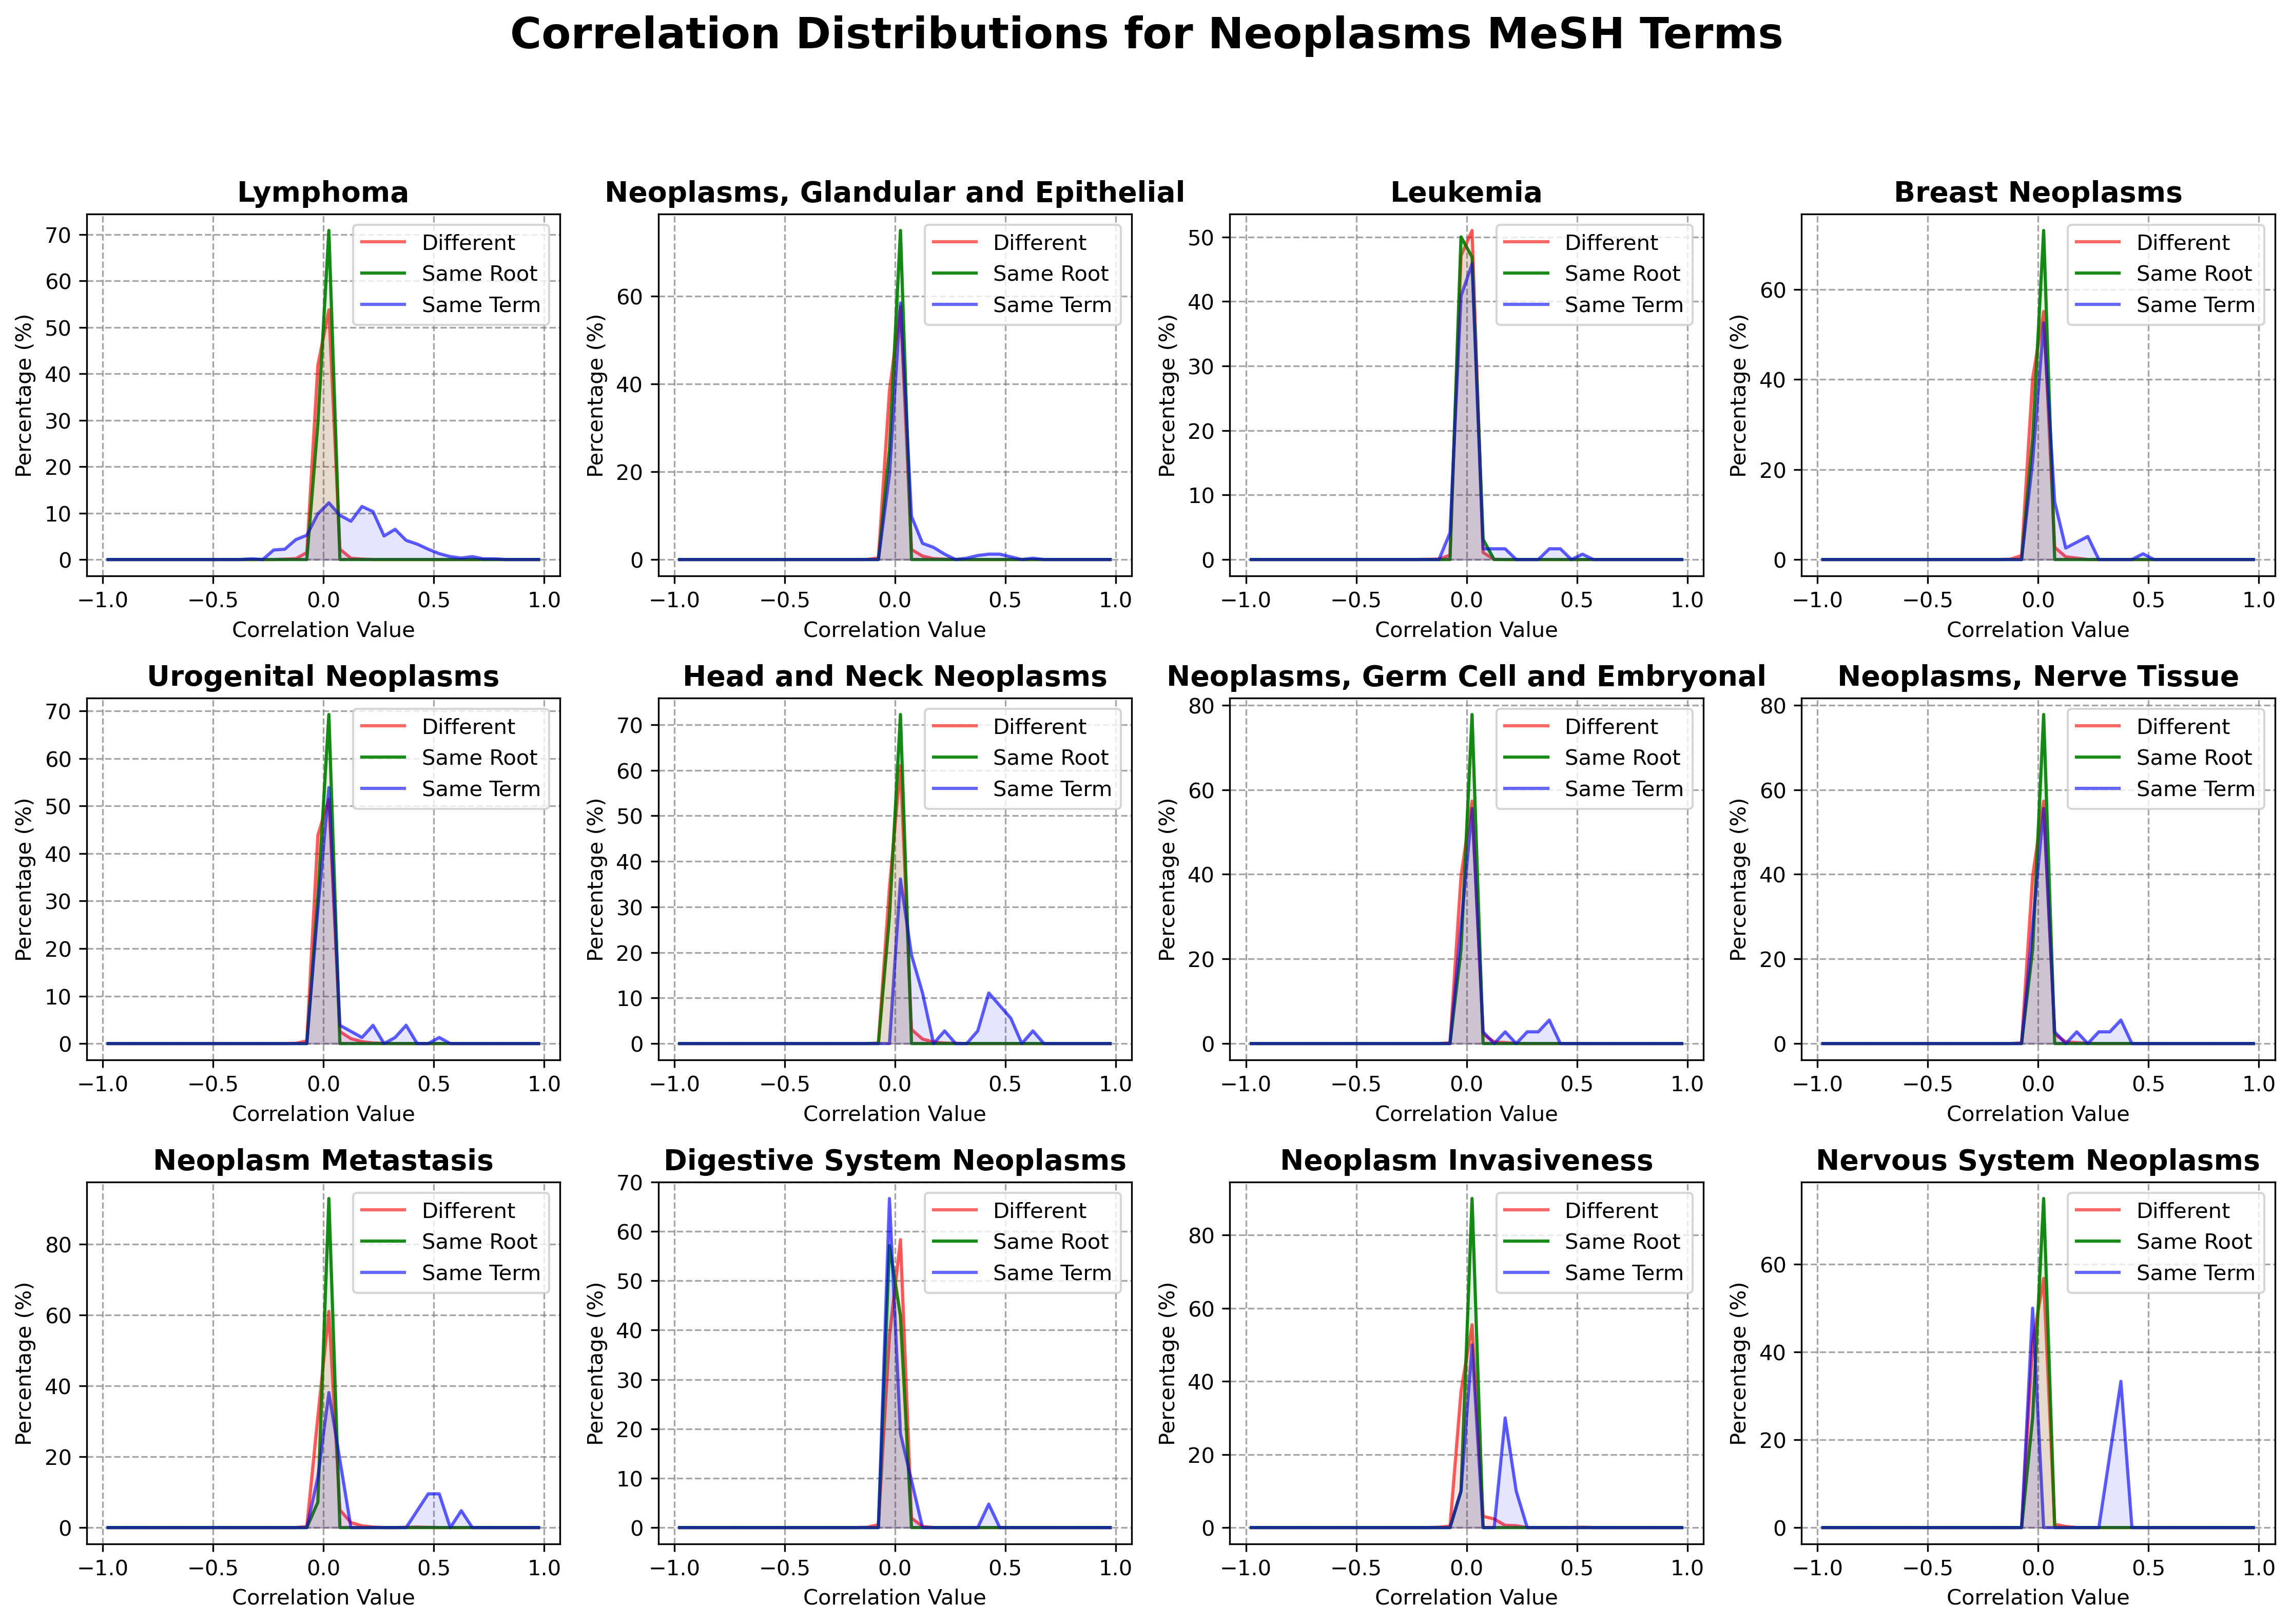

In [229]:
# variables
hierarchy_level = 2
annotations = []  # List to store annotations
datasets = []  # List to store datasets
all_symbols = list()
term_interest = "C04"
N = 12


# Load signatures and their labels
for s in succesful_signatureIDs:
    symbols = d_signature_2_mesh.get(s, {}).get("symbol")
    if symbols:
        # Truncate or process symbols based on hierarchy_level
        symbols = sorted(set(a[: hierarchy_level * 4 + 3] for a in symbols))
    else:
        symbols = [""]
    datasets.append(d_signature_2_mesh.get(s, {}).get("datasetid", ""))
    annotations.append(symbols)


for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(
            set(
                [
                    t[: hierarchy_level * 4 + 3]
                    for t in terms
                    if t.startswith(term_interest)
                ]
            )
        )

        all_symbols.extend(terms_specific_level)

# translate terms
all_terms = [s for s in all_symbols]

sorted_dict_all_terms = sorted(
    Counter(all_terms).items(), key=lambda x: x[1], reverse=True
)
top_terms = [t[0] for t in sorted_dict_all_terms][:N]
print(top_terms)


# Terms to be used for masks
terms = top_terms

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), dpi=300)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define bin width and range
bin_width = 0.05  # Adjust as needed
bin_range = (-1, 1)  # Adjust as needed
bins = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)

for ax, term in zip(axes, terms):
    # Filter Correlation Values for each term
    same_term_correlations = list()
    diff_term_correlations = list()
    same_root_correlations = list()

    # Traverse the matrix
    for i, terms_i in enumerate(annotations):
        if term in terms_i:  # Exclude if row does not CONTAIN term
            for j, terms_j in enumerate(annotations):
                if i != j:  # Exclude self-correlation
                    if term in terms_j:
                        same_term_correlations.append(correlation_matrix[i, j])
                    elif term_interest in [
                        t[: hierarchy_level * 4 + 3] for t in terms_j
                    ]:
                        same_root_correlations.append(correlation_matrix[i, j])
                    else:
                        diff_term_correlations.append(correlation_matrix[i, j])

    # Calculate histograms and convert to percentages
    counts_same, _ = np.histogram(same_term_correlations, bins=bins)
    counts_same_root, _ = np.histogram(same_root_correlations, bins=bins)
    counts_diff, _ = np.histogram(diff_term_correlations, bins=bins)
    percent_same = counts_same * 100 / counts_same.sum()
    percent_same_root = counts_same_root * 100 / counts_same_root.sum()
    percent_diff = counts_diff * 100 / counts_diff.sum()

    # Calculate bin centers
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Plot lines and fill area under the lines
    ax.plot(bin_centers, percent_diff, color="red", alpha=0.6, zorder=3)
    ax.plot(bin_centers, percent_same_root, color="green", alpha=0.9, zorder=3)
    ax.plot(bin_centers, percent_same, color="blue", alpha=0.6, zorder=3)
    ax.fill_between(bin_centers, percent_diff, color="red", alpha=0.1, zorder=3)
    ax.fill_between(bin_centers, percent_same_root, color="green", alpha=0.1, zorder=3)
    ax.fill_between(bin_centers, percent_same, color="blue", alpha=0.1, zorder=3)

    # Set title and labels for each subplot
    term_translation = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )

    ax.set_title(term_translation, fontsize=13.25, fontweight="bold")
    ax.set_xlabel("Correlation Value", fontsize=10)
    ax.set_ylabel("Percentage (%)", fontsize=10)
    ax.legend(["Different", "Same Root", "Same Term"], fontsize=10)
    ax.grid(color="grey", linestyle="--", alpha=0.7, zorder=1)
# Adjust layout
fig.suptitle(
    f"Correlation Distributions for {mesh_symbol_2_term[term_interest]} MeSH Terms",
    fontsize=20,
    fontweight="bold",
    y=1.05,
)
plt.tight_layout()
plt.savefig(
    "../results/figures/iLINCS/correlation_distributions.c04.level_2.png",
    bbox_inches="tight",
)

In [225]:
len(same_term_correlations)

1260

In [202]:
all_symbols = list()
for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(
            set(
                [
                    t[: hierarchy_level * 4 + 3]
                    for t in terms
                    if t.startswith(term_interest)
                ]
            )
        )

        all_symbols.extend(terms_specific_level)

In [204]:
Counter(all_symbols)

Counter({'C04.557.386': 36,
         'C04.557.470': 26,
         'C04.557.337': 16,
         'C04.588.180': 13,
         'C04.588.945': 13,
         'C04.588.443': 9,
         'C04.557.465': 9,
         'C04.557.580': 9,
         'C04.697.650': 7,
         'C04.588.274': 7,
         'C04.697.645': 5,
         'C04.588.614': 4,
         'C04.697.098': 4,
         'C04.588.894': 4,
         'C04.557.665': 4,
         'C04.588.805': 3,
         'C04.834.154': 3,
         'C04.557.450': 3,
         'C04.834': 3,
         'C04.588.322': 2,
         'C04.557.595': 2,
         'C04.700.250': 1})

### PCA Analysis

In [24]:
"""PCA Analysis
Here we will perform PCA analysis on the different signatures.

Structure:
    1. Imports, Variables, Functions
    2. Pre-process data: create uniform vectors
    3. Determine optimal nº components
    4. Apply PCA
    5. Plot tSNE
"""

# 1. Imports, Variables, Functions
# imports
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# variables


# functions


# 2. Pre-process data: create uniform vectors
n_signatures = len(extreme_signed_significances)  # nº of signatures

# get all gene ids
all_gene_ids = sorted(
    set(
        [k for i in range(n_signatures) for k in extreme_signed_significances[i].keys()]
    )
)

# create new vectors all same size - assign 0 if gene not present
extreme_signed_significance_vectors = list()
for n in range(n_signatures):
    extreme_signed_significance_vectors.append(
        [extreme_signed_significances[n].get(g, 0) for g in all_gene_ids]
    )

print(np.array(extreme_signed_significance_vectors).shape)

(201, 22175)


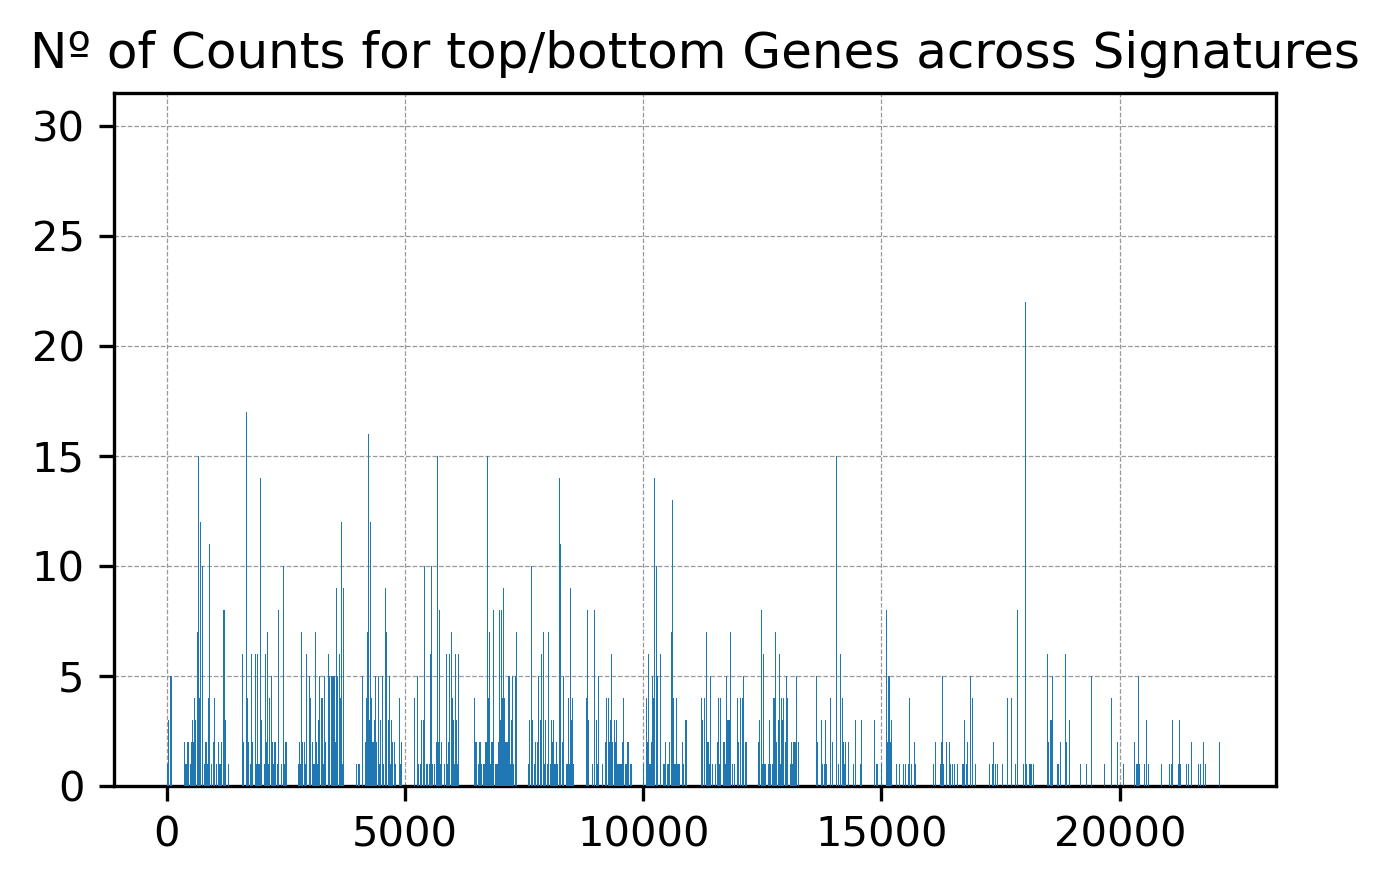

In [168]:
x = list(range(len(extreme_signed_significance_vectors[0])))
height = np.sum(
    np.where(np.array(extreme_signed_significance_vectors) != 0, 1, 0), axis=0
)

plt.figure(figsize=(5, 3), dpi=300)
plt.bar(x=x, height=height, zorder=3)
plt.grid(color="grey", linestyle="--", alpha=0.8, zorder=1, linewidth=0.3)
plt.title("Nº of Counts for top/bottom Genes across Signatures")
plt.savefig("../results/figures/iLINCS/n_couts_top_bottom_genes.png")

In [25]:
# 3. Determine optimal nº components
# Initialize an array to store the explained variance
explained_variances = []

# Compute PCA for different numbers of components
for n in range(1, 201):
    pca = PCA(n_components=n)
    pca.fit(extreme_signed_significance_vectors)
    explained_variances.append(sum(pca.explained_variance_ratio_))

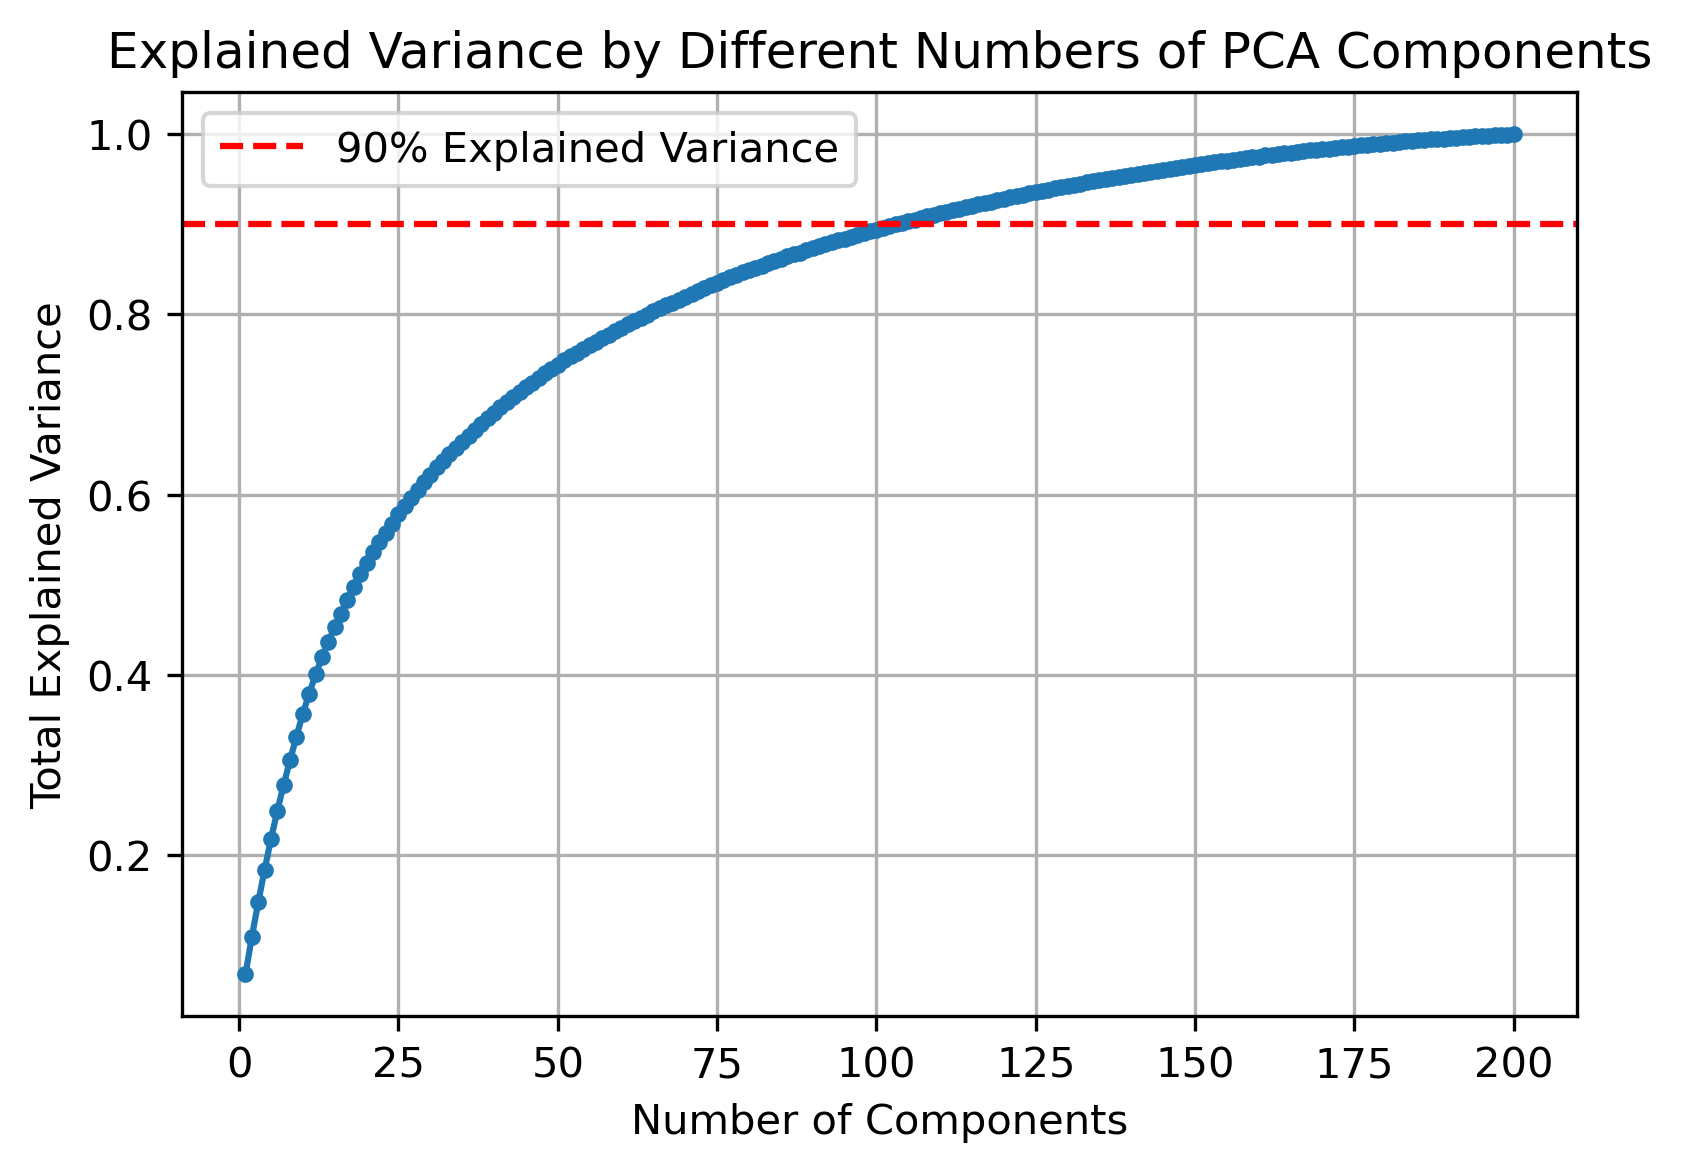

In [43]:
# Plot the explained variance as a function of the number of components
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(range(1, 201), explained_variances, marker=".")
plt.title("Explained Variance by Different Numbers of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Total Explained Variance")
plt.axhline(y=0.9, color="r", linestyle="--", label="90% Explained Variance")
plt.legend()
plt.grid(True)
plt.savefig("../results/figures/iLINCS/pca.explained_variance.png")

In [27]:
for k, v in zip(range(1, 201), explained_variances):
    if v >= 0.9:
        optimal_n_components = k
        print(f">=90% variance corresponds to {optimal_n_components} nº components")
        break

>=90% variance corresponds to 104 nº components


In [28]:
# 4. Apply PCA
pca = PCA(
    n_components=optimal_n_components
)  # Adjust n_components based on your requirement
pca_result = pca.fit_transform(extreme_signed_significance_vectors)

In [101]:
# Mask by specific terms Hierarchy Level 0
d_terms_counts = dict()
for term in ["C" + "%02d" % i for i in range(30)]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)
        d_terms_counts[term] = np.sum(mask)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(f"{term} - {mesh_symbol_2_term.get(term,'')}  {np.sum(mask)}/{len(mask)}")

# get N top terms
N = 18
sorted_tupples = sorted(d_terms_counts.items(), key=lambda x: x[1], reverse=True)
top_terms = [t[0] for t in sorted_tupples]
print(top_terms[:N])

C01 - Infections  8/201
C04 - Neoplasms  101/201
C05 - Musculoskeletal Diseases  30/201
C06 - Digestive System Diseases  18/201
C07 - Stomatognathic Diseases  7/201
C08 - Respiratory Tract Diseases  15/201
C09 - Otorhinolaryngologic Diseases  4/201
C10 - Nervous System Diseases  39/201
C11 - Eye Diseases  4/201
C12 - Urogenital Diseases  22/201
C14 - Cardiovascular Diseases  6/201
C15 - Hemic and Lymphatic Diseases  48/201
C16 - Congenital, Hereditary, and Neonatal Diseases and Abnormalities  42/201
C17 - Skin and Connective Tissue Diseases  23/201
C18 - Nutritional and Metabolic Diseases  9/201
C19 - Endocrine System Diseases  8/201
C20 - Immune System Diseases  52/201
C21 - Disorders of Environmental Origin  0/201
C22 - Animal Diseases  0/201
C23 - Pathological Conditions, Signs and Symptoms  52/201
C24 - Occupational Diseases  0/201
C25 - Chemically-Induced Disorders  1/201
C26 - Wounds and Injuries  0/201
['C04', 'C20', 'C23', 'C15', 'C16', 'C10', 'C05', 'C17', 'C12', 'C06', 'C08',

In [83]:
len([1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20])

17

In [30]:
# masks for different terms!

term = "C04."

sublist = set(
    s for sublist in succesful_signatureIDs for s in sublist if s.startswith(term)
)

for term in ["C" + "%02d" % i for i in sublist]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(
            f"{term} - {mesh_symbol_2_term.get(term,'')} - Nº elements {len(mask)} Nº positives {np.sum(mask)}"
        )

In [31]:
term = "C04."
level = 2
level_split = level * 4 + 3
all_symbols_filter = set()

# [s for key in succesful_signatureIDs for s in d_signature_2_mesh[key]["symbol"] if s.startswith(term)]


for key in succesful_signatureIDs:
    if d_signature_2_mesh[key]["symbol"] is not None:
        for s in d_signature_2_mesh[key]["symbol"]:
            if s.startswith(term):
                all_symbols_filter.add(s[:level_split])

In [32]:
for a in all_symbols_filter:
    print(mesh_symbol_2_term[a])

Thoracic Neoplasms
Skin Neoplasms
Lymphoma
Head and Neck Neoplasms
Neoplasms, Plasma Cell
Colorectal Neoplasms, Hereditary Nonpolyposis
Precancerous Conditions
Digestive System Neoplasms
Urogenital Neoplasms
Neoplasms, Connective and Soft Tissue
Neoplasms, Nerve Tissue
Leukemia
Neoplasm Invasiveness
Neoplasm Metastasis
Endocrine Gland Neoplasms
Nervous System Neoplasms
Breast Neoplasms
Carcinogenesis
Nevi and Melanomas
Barrett Esophagus
Neoplasms, Germ Cell and Embryonal
Neoplasms, Glandular and Epithelial


In [35]:
level = 0
level_split = level * 4 + 3
all_symbols = list()

for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(set([t[:level_split] for t in terms]))
        all_symbols.extend(terms_specific_level)

# translate terms
all_terms = [mesh_symbol_2_term[s] for s in all_symbols]

In [36]:
d_signature_2_mesh[signatureID]["symbol"]

['C05.651.534.500.350',
 'C10.668.491.175.500.350',
 'C16.320.322.625',
 'C16.320.577.350']

In [37]:
mesh_symbol_2_term.get(term, "")

''

In [38]:
len(succesful_signatureIDs)

201

In [40]:
for term in [
    "C" + "%02d" % i for i in [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 15, 17, 18, 19, 20]
]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)

In [117]:
# 5. Plot tSNE

# Apply different Masks!

# t-SNE for Visualization
tsne = TSNE(
    n_components=2, perplexity=10, learning_rate=200, n_iter=1000
)  # Reduced number of iterations
tsne_result = tsne.fit_transform(pca_result)

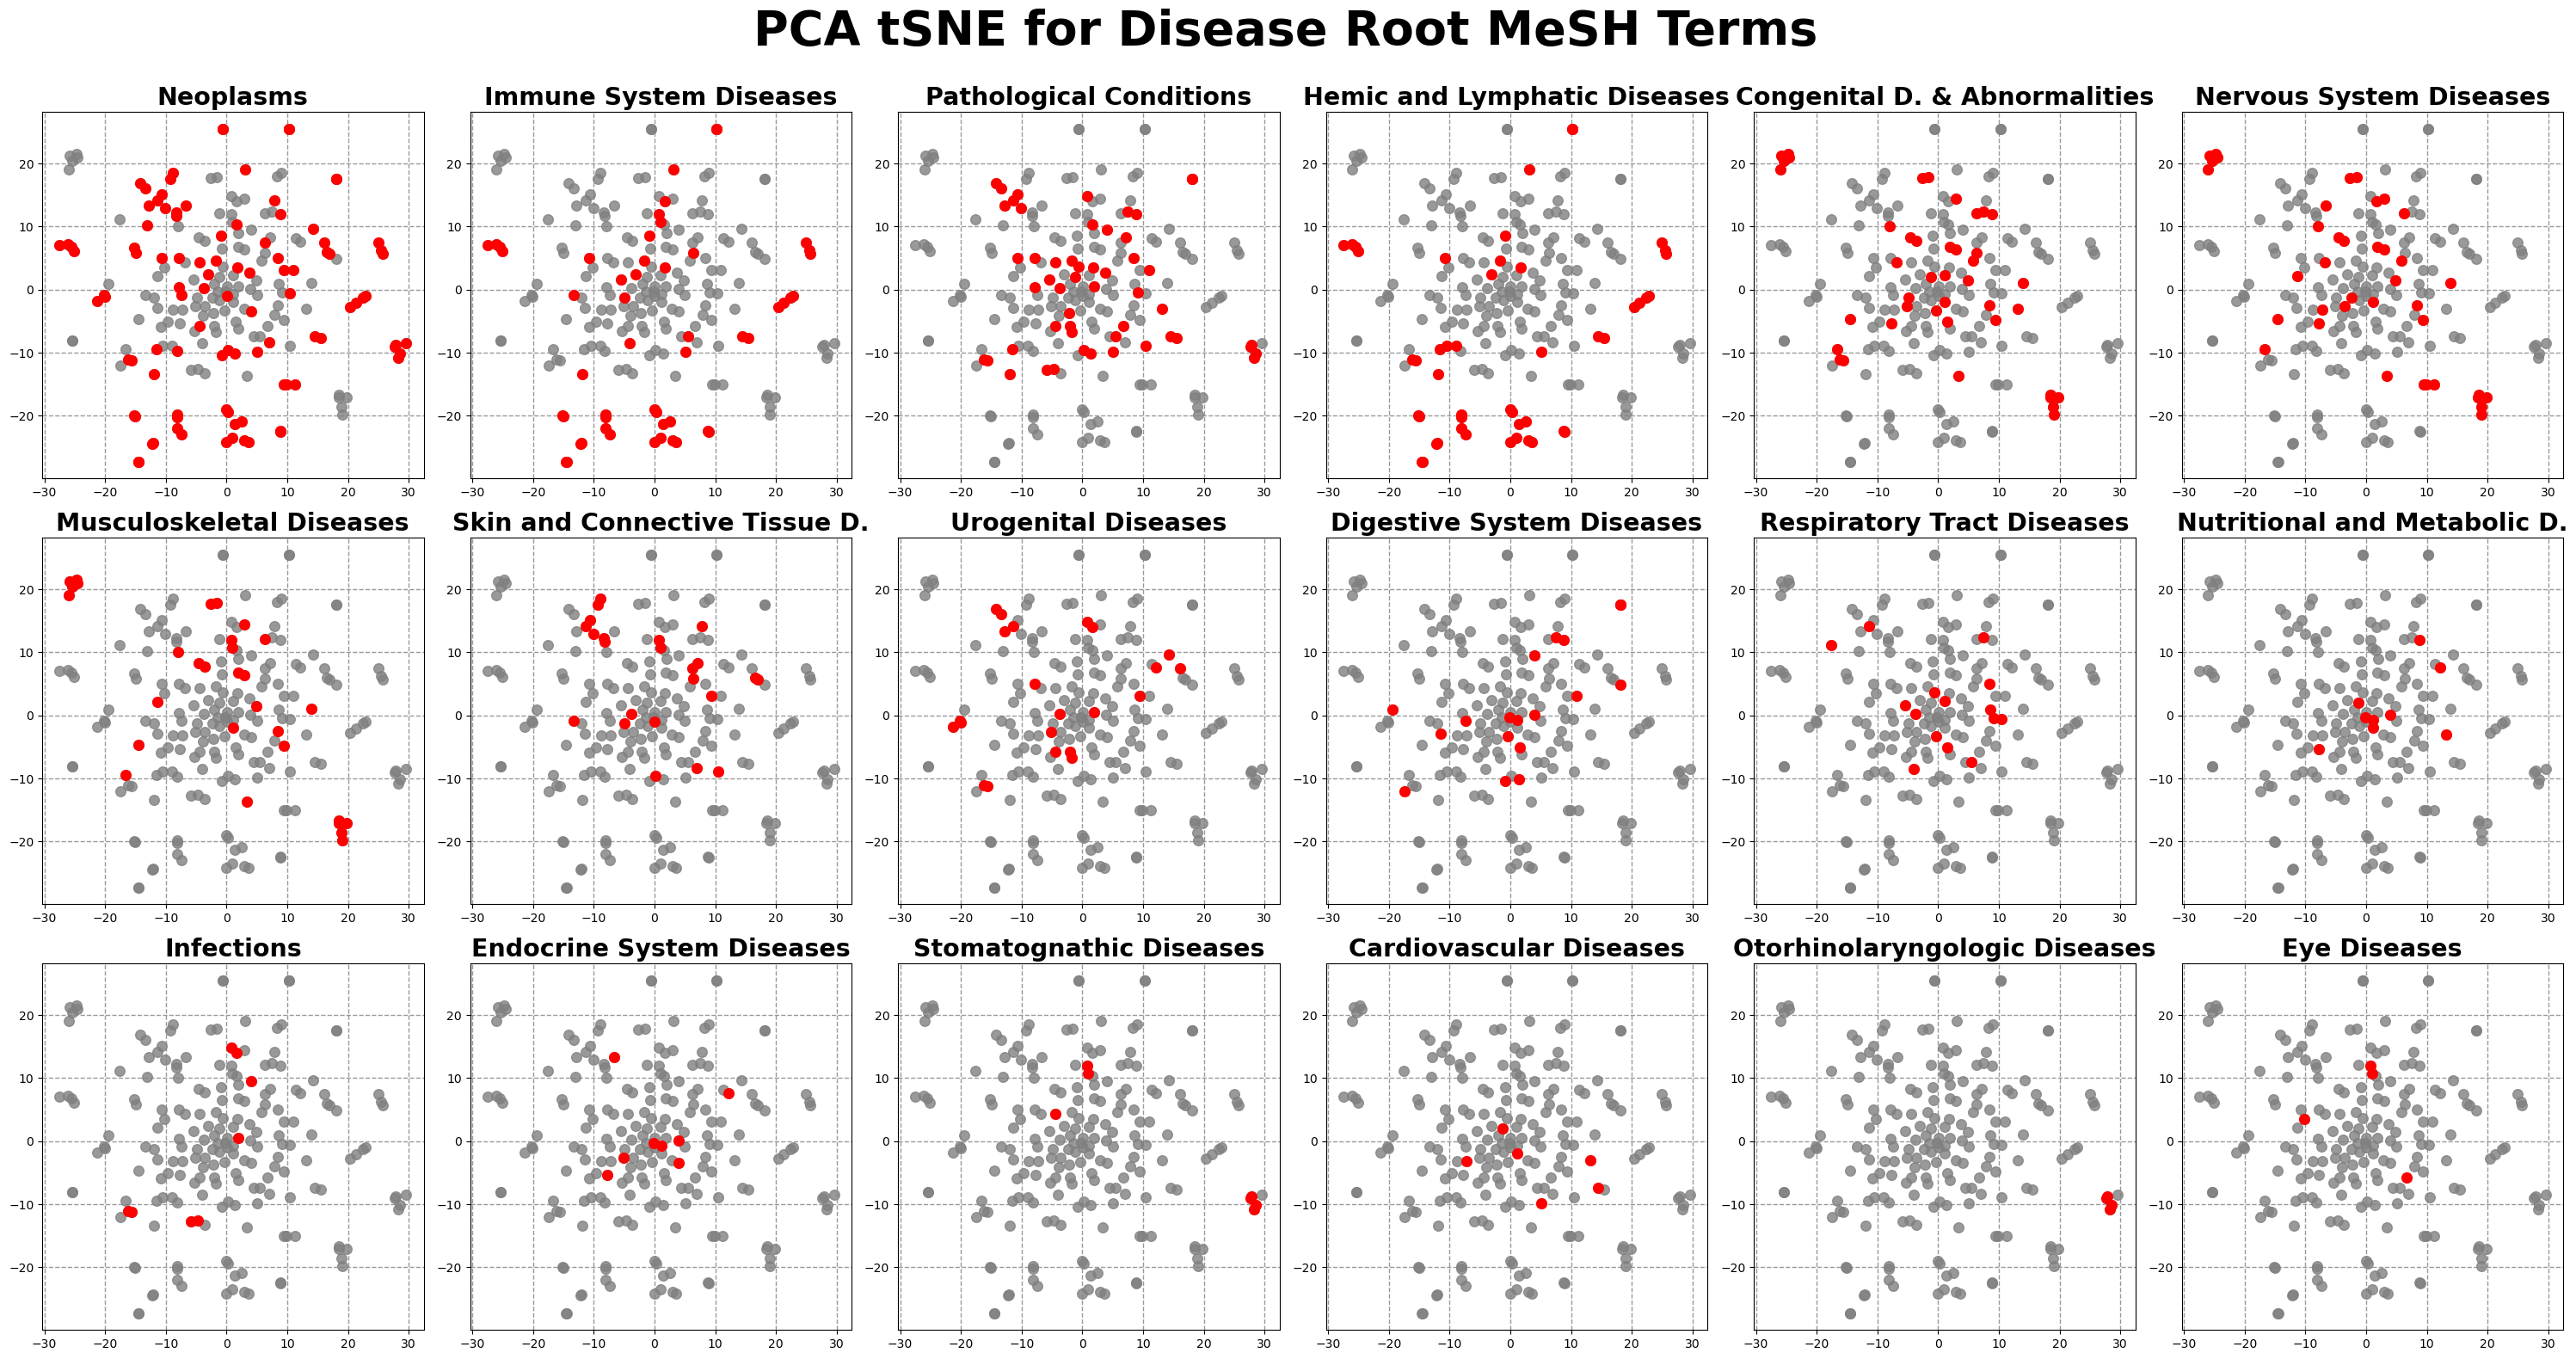

In [176]:
import matplotlib.pyplot as plt

N = 18

# Terms to be used for masks
terms = top_terms[:N]

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, term in enumerate(terms):
    mask = []
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)

    # Convert mask to numpy array if it's not
    mask = np.array(mask)

    # Plotting on the ith subplot
    ax = axes[i]
    ax.scatter(
        tsne_result[:, 0], tsne_result[:, 1], color="grey", alpha=0.8, s=70, zorder=3
    )  # All points
    ax.scatter(
        tsne_result[mask, 0], tsne_result[mask, 1], color="red", s=70, zorder=3
    )  # Highlighted points
    ax.grid(color="grey", linestyle="--", alpha=0.8, zorder=1, linewidth=1)

    # Set titles and labels
    label = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )
    ax.set_title(f"{label}", fontsize=20.5, fontweight="bold")
    # ax.set_xlabel("t-SNE Feature 1")
    # ax.set_ylabel("t-SNE Feature 2")

# Adjust layout
plt.tight_layout()
fig.suptitle(
    "PCA tSNE for Disease Root MeSH Terms", fontsize=40, fontweight="bold", y=1.05
)

plt.savefig("../results/figures/iLINCS/tSNE.MeSH_0.png", bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt

N = 18

# Terms to be used for masks
terms = top_terms[:N]

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, term in enumerate(terms):
    mask = []
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)

    # Convert mask to numpy array if it's not
    mask = np.array(mask)

    # Plotting on the ith subplot
    ax = axes[i]
    ax.scatter(
        tsne_result[:, 0], tsne_result[:, 1], color="grey", alpha=0.8, s=70, zorder=3
    )  # All points
    ax.scatter(
        tsne_result[mask, 0], tsne_result[mask, 1], color="red", s=70, zorder=3
    )  # Highlighted points
    ax.grid(color="grey", linestyle="--", alpha=0.8, zorder=1, linewidth=1)

    # Set titles and labels
    label = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )
    ax.set_title(f"{label}", fontsize=20.5, fontweight="bold")
    # ax.set_xlabel("t-SNE Feature 1")
    # ax.set_ylabel("t-SNE Feature 2")

# Adjust layout
plt.tight_layout()
fig.suptitle(
    "PCA tSNE for Disease Root MeSH Terms", fontsize=40, fontweight="bold", y=1.05
)

plt.savefig("../results/figures/iLINCS/tSNE.MeSH_0.png", bbox_inches="tight")

['C04.557.386', 'C04.557.470', 'C04.557.337', 'C04.588.180', 'C04.588.945', 'C04.588.443', 'C04.557.465', 'C04.557.580', 'C04.697.650', 'C04.588.274', 'C04.697.645', 'C04.588.614']


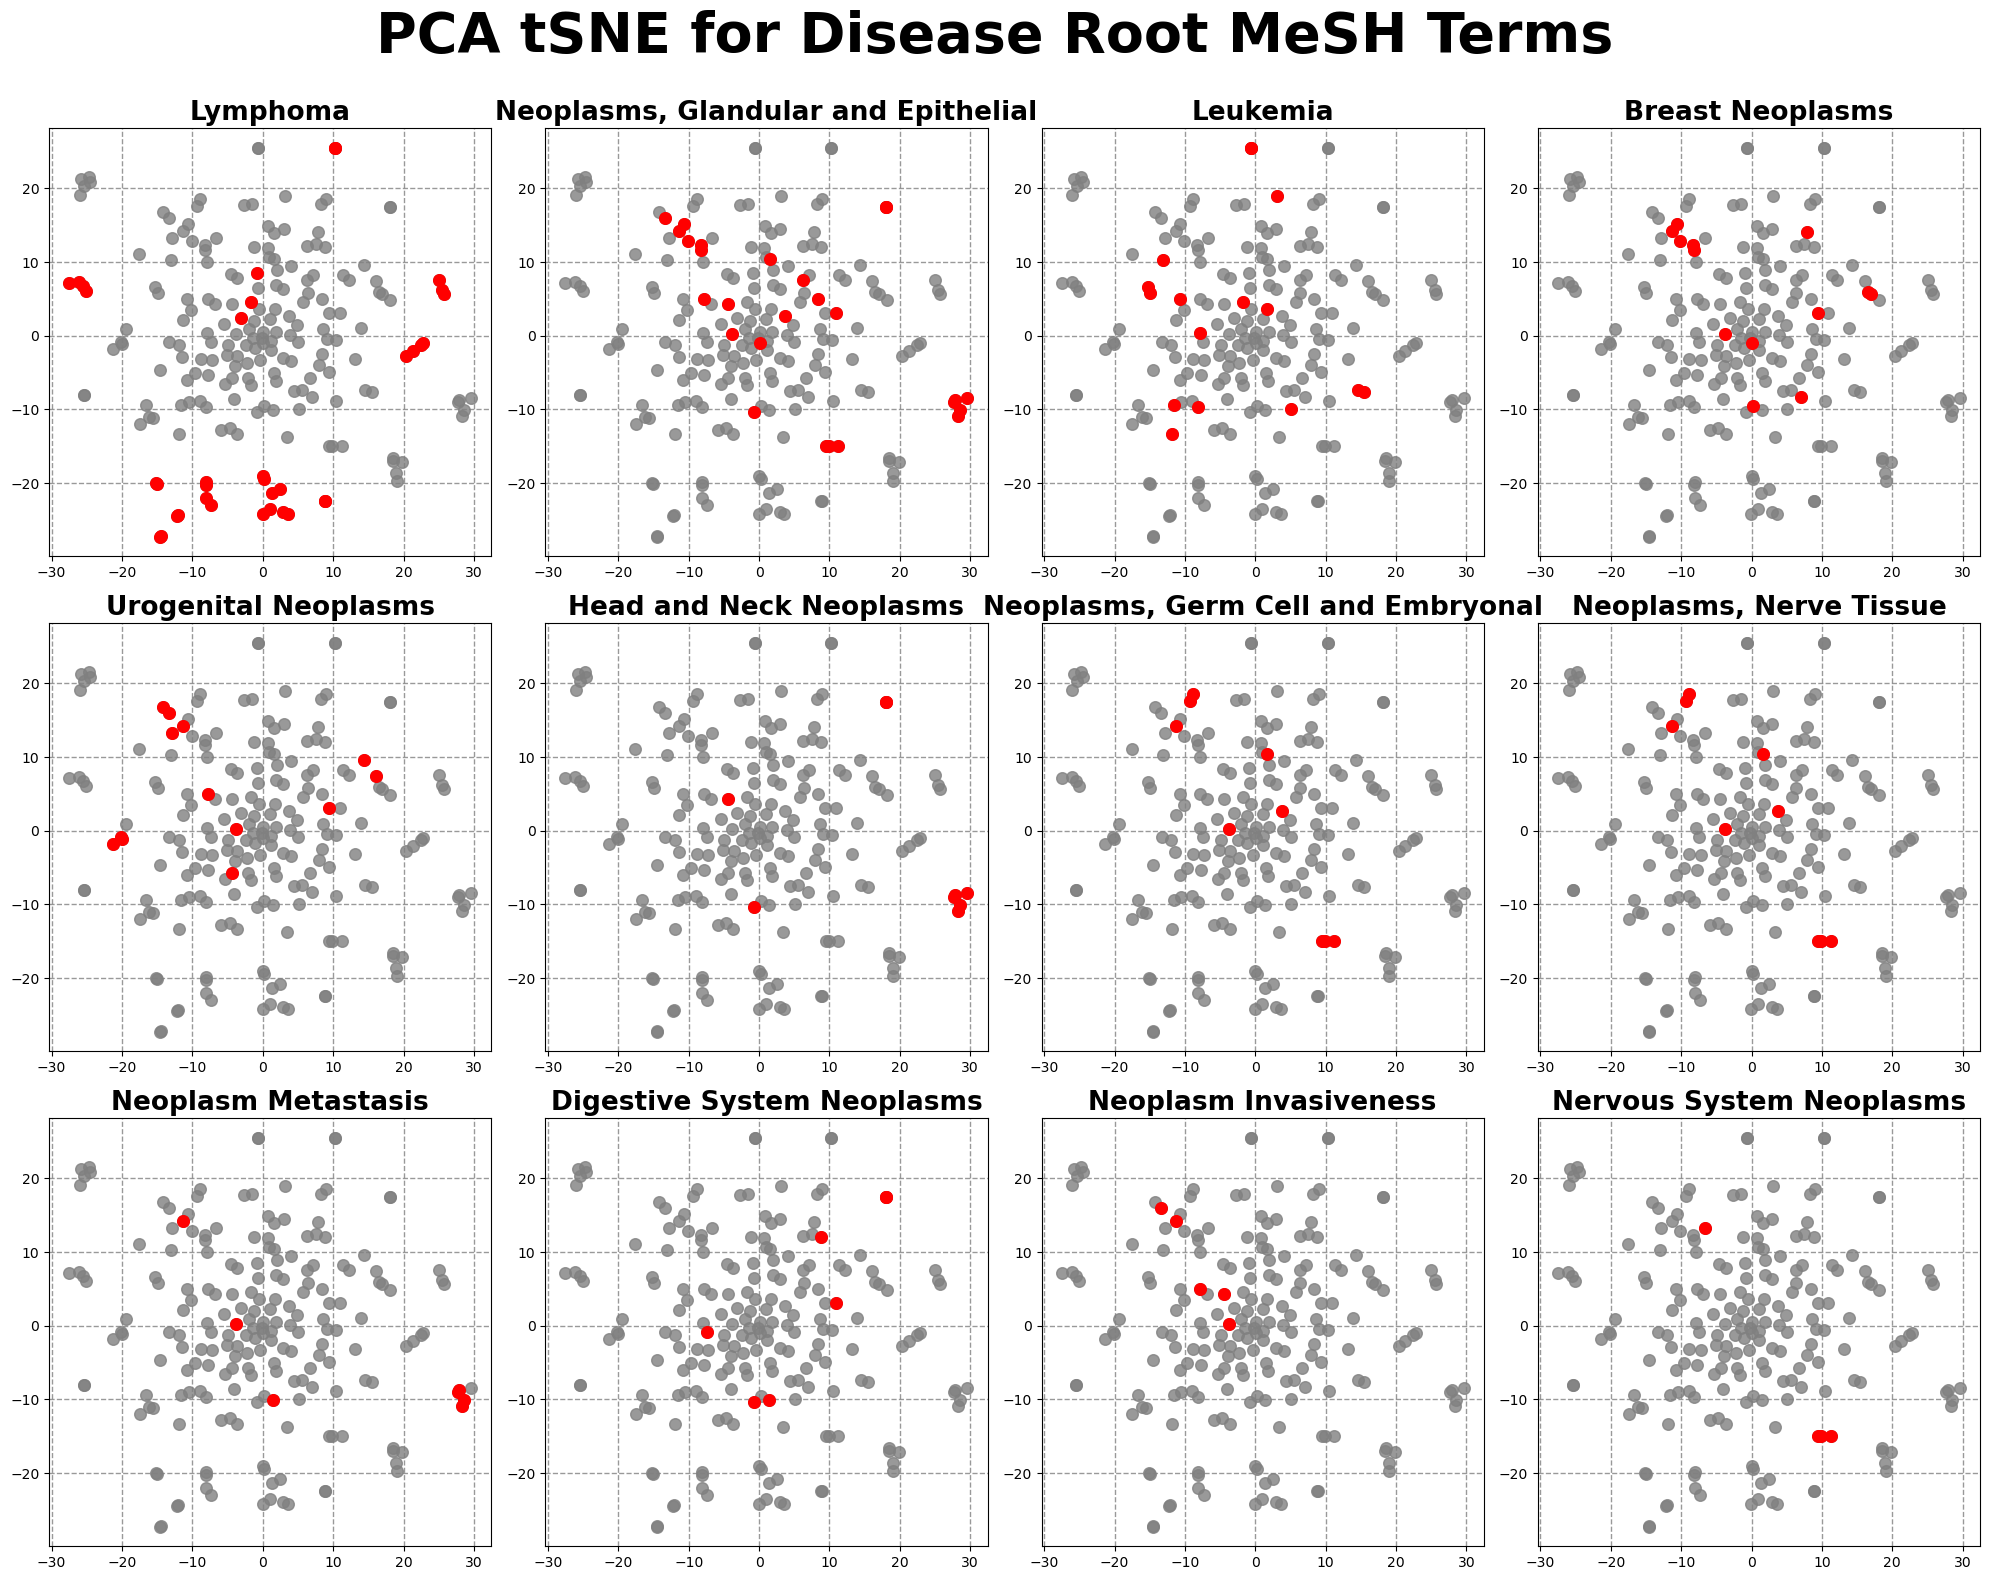

In [240]:
# variables
hierarchy_level = 2
annotations = []  # List to store annotations
datasets = []  # List to store datasets
all_symbols = list()
term_interest = "C04"
N = 12


# Load signatures and their labels
for s in succesful_signatureIDs:
    symbols = d_signature_2_mesh.get(s, {}).get("symbol")
    if symbols:
        # Truncate or process symbols based on hierarchy_level
        symbols = sorted(set(a[: hierarchy_level * 4 + 3] for a in symbols))
    else:
        symbols = [""]
    datasets.append(d_signature_2_mesh.get(s, {}).get("datasetid", ""))
    annotations.append(symbols)


for k in d_signature_2_mesh.keys():
    if d_signature_2_mesh[k]["symbol"] is not None:
        terms = d_signature_2_mesh[k]["symbol"]
        terms_specific_level = list(
            set(
                [
                    t[: hierarchy_level * 4 + 3]
                    for t in terms
                    if t.startswith(term_interest)
                ]
            )
        )

        all_symbols.extend(terms_specific_level)

# translate terms
all_terms = [s for s in all_symbols]

sorted_dict_all_terms = sorted(
    Counter(all_terms).items(), key=lambda x: x[1], reverse=True
)
top_terms = [t[0] for t in sorted_dict_all_terms][:N]
print(top_terms)


# Terms to be used for masks
terms = top_terms

# Set up a 4x4 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, term in enumerate(terms):
    mask = []
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)

    # Convert mask to numpy array if it's not
    mask = np.array(mask)

    # Plotting on the ith subplot
    ax = axes[i]
    ax.scatter(
        tsne_result[:, 0], tsne_result[:, 1], color="grey", alpha=0.8, s=70, zorder=3
    )  # All points
    ax.scatter(
        tsne_result[mask, 0], tsne_result[mask, 1], color="red", s=70, zorder=3
    )  # Highlighted points
    ax.grid(color="grey", linestyle="--", alpha=0.8, zorder=1, linewidth=1)

    # Set titles and labels
    label = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )
    ax.set_title(f"{label}", fontsize=19, fontweight="bold")
    # ax.set_xlabel("t-SNE Feature 1")
    # ax.set_ylabel("t-SNE Feature 2")

# Adjust layout
plt.tight_layout()
fig.suptitle(
    "PCA tSNE for Disease Root MeSH Terms", fontsize=40, fontweight="bold", y=1.05
)

plt.savefig("../results/figures/iLINCS/tSNE.c04.level_2.png", bbox_inches="tight")

### AutoML

In [ ]:
"""AutoML

Automatized Machine Learning for different disease terms using as X PCA vectors and y Disease Labels

Structure:
    1. Imports, Variables, Functions
    2. Load Data
    3. Perform Predictions, Store Metric results
    4. Plot AUROC Curves score
"""


# 1. Imports, Variables, Functions
# imports
hierarchical_level = 0
N_top_terms = 18
# variables
succesful_signatureIDs = succesful_signatureIDs
mesh_symbol_2_term = mesh_symbol_2_term
d_signature_2_mesh = d_signature_2_mesh

# functions


# 2. Load Data
# get most significant terms
# Mask by specific terms Hierarchy Level 0
d_terms_counts = dict()
for term in ["C" + "%02d" % i for i in range(30)]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)
        d_terms_counts[term] = np.sum(mask)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(f"{term} - {mesh_symbol_2_term.get(term,'')}  {np.sum(mask)}/{len(mask)}")

# get N top terms
sorted_tupples = sorted(d_terms_counts.items(), key=lambda x: x[1], reverse=True)
top_terms = [t[0] for t in sorted_tupples]
print(top_terms[:N_top_terms])


# load X
X = pca_result

# define y label
for i, term in enumerate(terms):
    y = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        y.append(found)

        # Convert y to numpy array
        y = np.array(y)

        # Define label Name
        label = mesh_symbol_2_term[s]

        # 3. Perform Predictions, Store Metric results

        # 4. Plot AUROC Curves score

In [244]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=33385fe97ab4a92892f9177ef48a797f04b8bd23f5d273e789f38c85678c1c37
  Stored in directory: /home/ddalton/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


C01 - Infections  8/201
C04 - Neoplasms  101/201
C05 - Musculoskeletal Diseases  30/201
C06 - Digestive System Diseases  18/201
C07 - Stomatognathic Diseases  7/201
C08 - Respiratory Tract Diseases  15/201
C09 - Otorhinolaryngologic Diseases  4/201
C10 - Nervous System Diseases  39/201
C11 - Eye Diseases  4/201
C12 - Urogenital Diseases  22/201
C14 - Cardiovascular Diseases  6/201
C15 - Hemic and Lymphatic Diseases  48/201
C16 - Congenital, Hereditary, and Neonatal Diseases and Abnormalities  42/201
C17 - Skin and Connective Tissue Diseases  23/201
C18 - Nutritional and Metabolic Diseases  9/201
C19 - Endocrine System Diseases  8/201
C20 - Immune System Diseases  52/201
C21 - Disorders of Environmental Origin  0/201
C22 - Animal Diseases  0/201
C23 - Pathological Conditions, Signs and Symptoms  52/201
C24 - Occupational Diseases  0/201
C25 - Chemically-Induced Disorders  1/201
C26 - Wounds and Injuries  0/201
['C04', 'C20', 'C23', 'C15', 'C16', 'C10', 'C05', 'C17', 'C12', 'C06', 'C08',

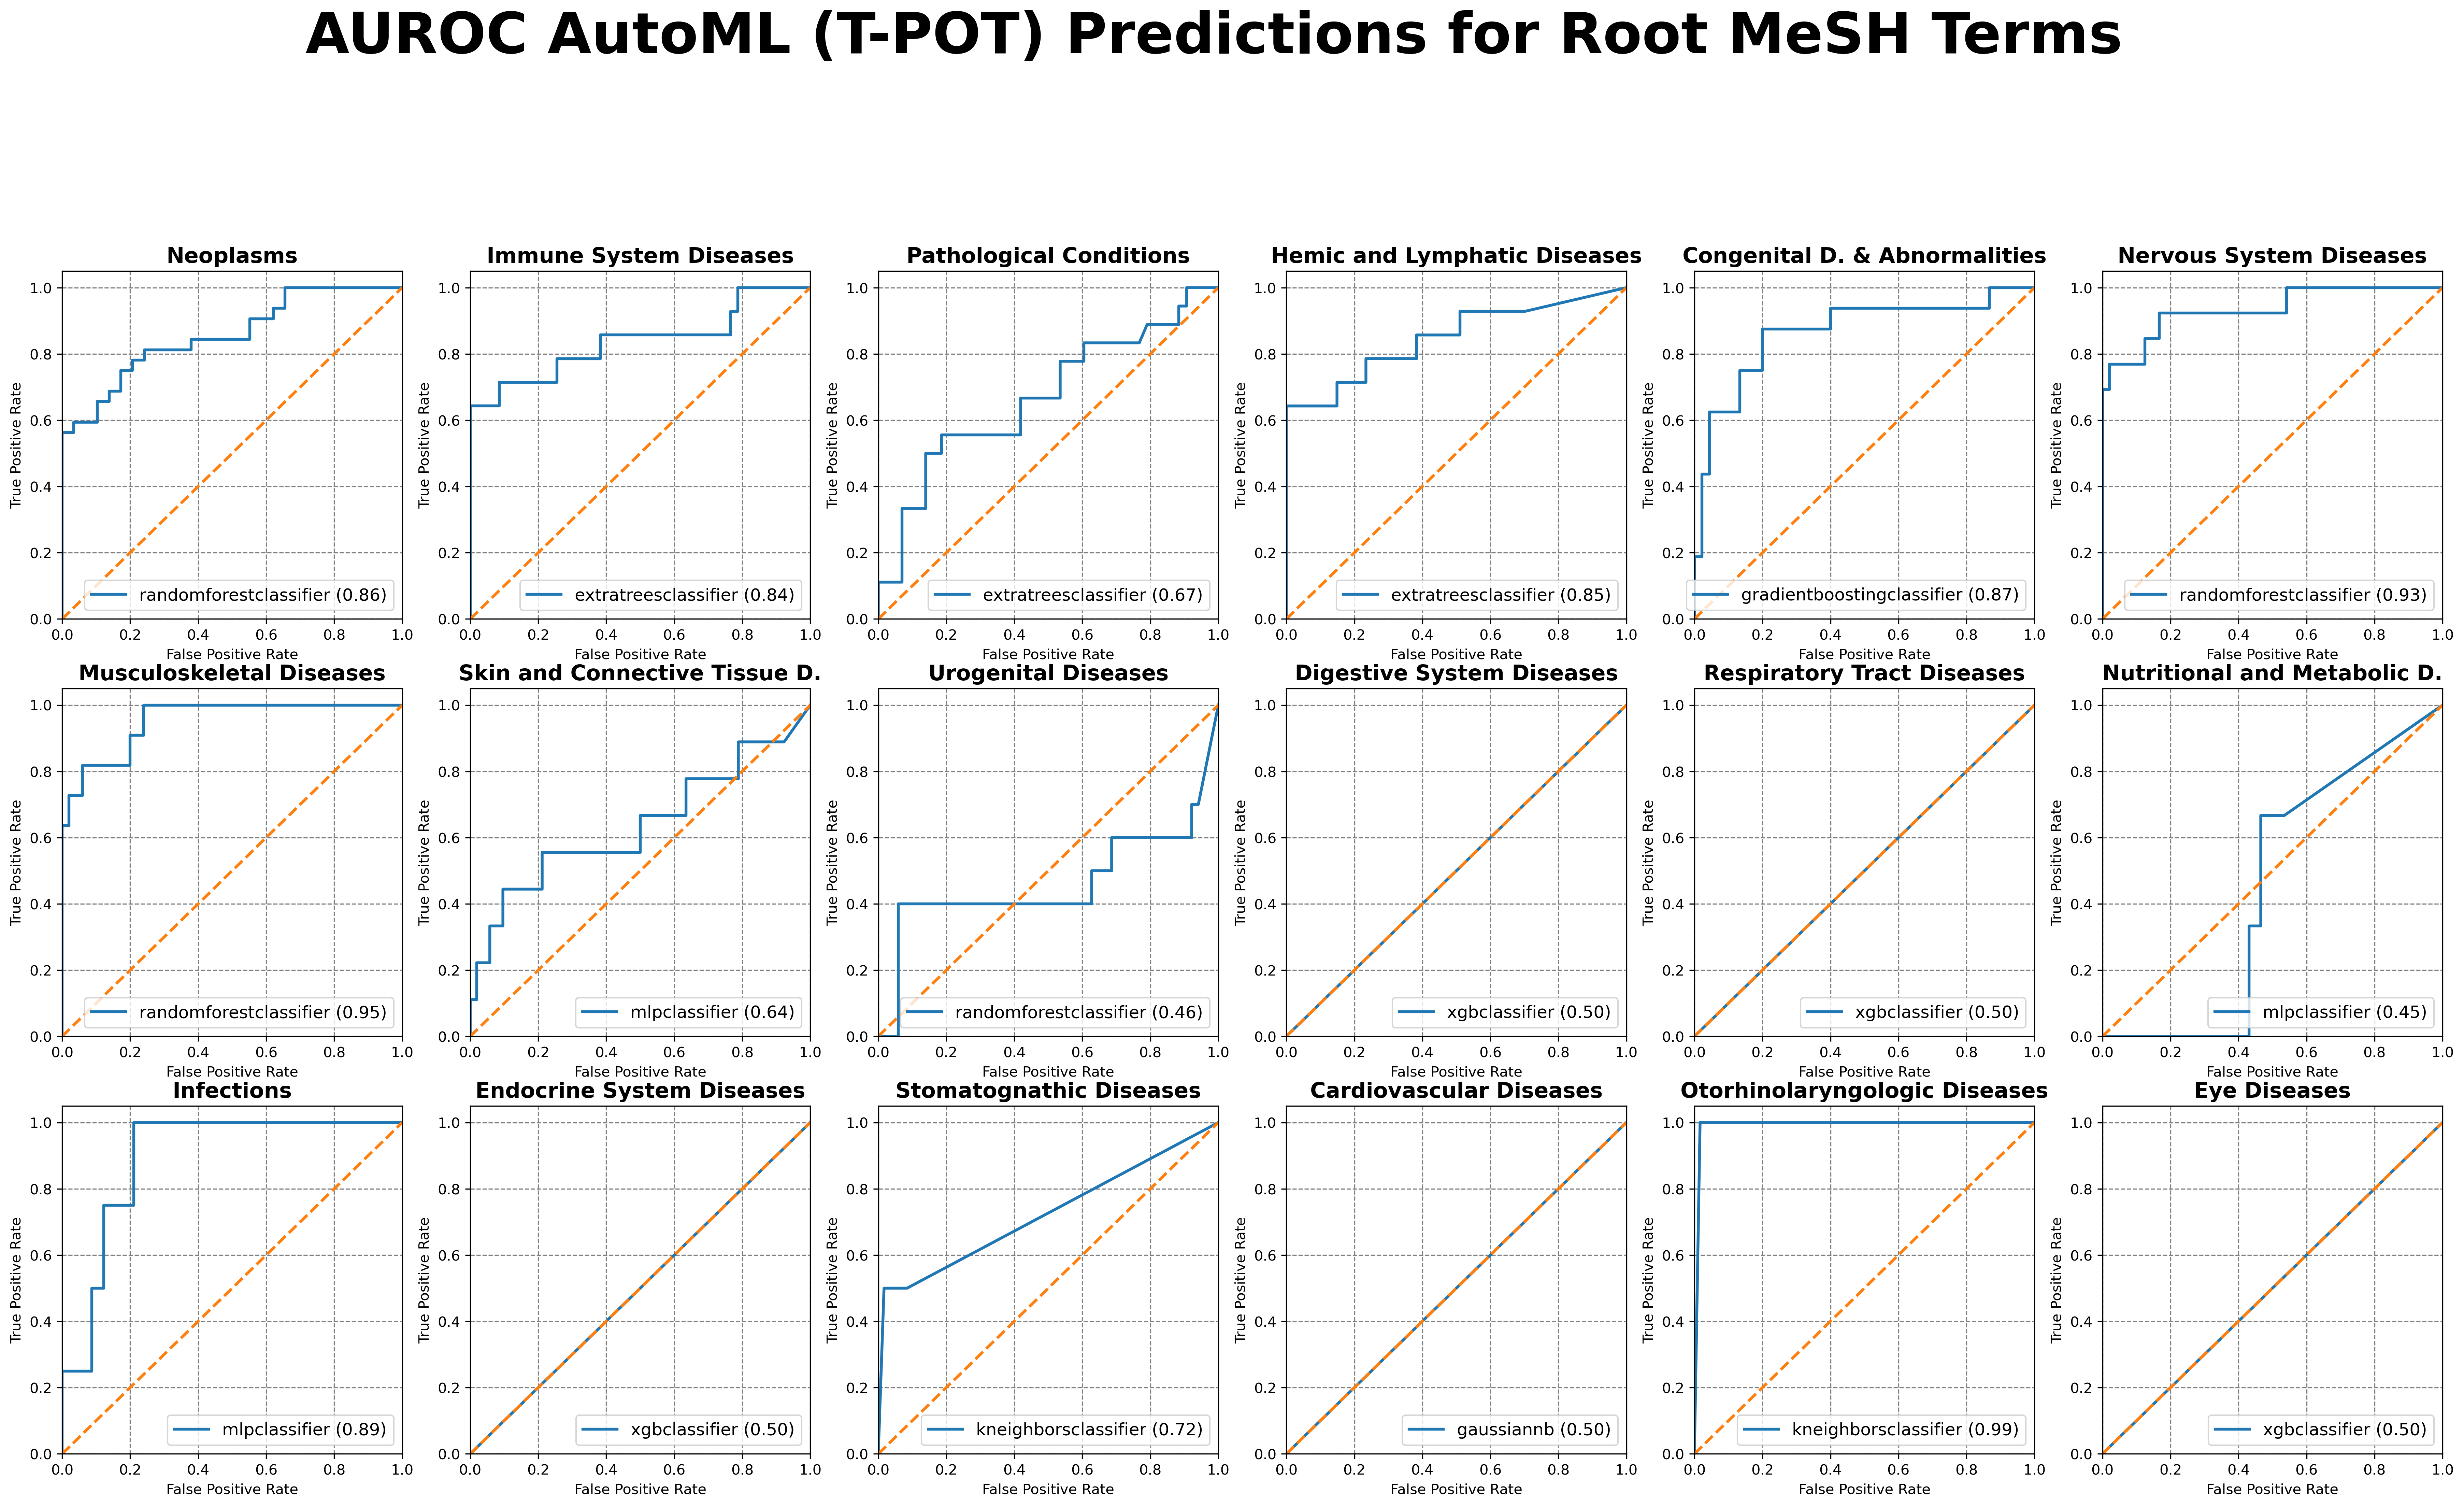

In [344]:
# 1. Imports, Variables, Functions
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# 1. Imports, Variables, Functions
# imports
hierarchical_level = 0
N_top_terms = 18
# variables
succesful_signatureIDs = succesful_signatureIDs
mesh_symbol_2_term = mesh_symbol_2_term
d_signature_2_mesh = d_signature_2_mesh


# functions
def perform_predictions_and_store_metrics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Initialize TPOTClassifier
    tpot = TPOTClassifier(
        generations=5, population_size=50, verbosity=2, random_state=42
    )
    tpot.fit(X_train, y_train)

    # Predict probabilities
    probas_ = tpot.predict_proba(X_test)[:, 1]

    # Extract and print the name of the best algorithm
    best_algorithm = tpot.fitted_pipeline_.steps[-1][0]
    print(f"Best algorithm: {best_algorithm}")

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc, tpot, best_algorithm


def plot_auc_roc(fpr, tpr, roc_auc, label, model_name, ax):
    ax.plot(fpr, tpr, lw=2, label="%s (%0.2f)" % (best_algorithm, roc_auc))
    ax.plot([0, 1], [0, 1], lw=2, linestyle="--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(label, fontweight="bold", fontsize=15)
    ax.legend(loc="lower right", fontsize=12)
    ax.grid(True, linestyle="--", color="grey")


# 2. Load Data
# get most significant terms
# Mask by specific terms Hierarchy Level 0
d_terms_counts = dict()
for term in ["C" + "%02d" % i for i in range(30)]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)
        d_terms_counts[term] = np.sum(mask)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(f"{term} - {mesh_symbol_2_term.get(term,'')}  {np.sum(mask)}/{len(mask)}")

# get N top terms
sorted_tupples = sorted(d_terms_counts.items(), key=lambda x: x[1], reverse=True)
top_terms = [t[0] for t in sorted_tupples]
print(top_terms[:N_top_terms])


# load X
X = pca_result


# Prepare a 4x4 grid for plotting
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 15), dpi=300)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Define y label and perform predictions
for i, term in enumerate(top_terms[:N_top_terms]):
    y = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        y.append(found)

    y = np.array(y)
    # label = mesh_symbol_2_term.get(term, term)

    label = (
        "Skin and Connective Tissue D."
        if mesh_symbol_2_term[term] == "Skin and Connective Tissue Diseases"
        else "Nutritional and Metabolic D."
        if mesh_symbol_2_term[term] == "Nutritional and Metabolic Diseases"
        else "Congenital D. & Abnormalities"
        if mesh_symbol_2_term[term]
        == "Congenital, Hereditary, and Neonatal Diseases and Abnormalities"
        else "Pathological Conditions"
        if mesh_symbol_2_term[term] == "Pathological Conditions, Signs and Symptoms"
        else mesh_symbol_2_term[term]
    )

    # 3. Perform Predictions, Store Metric results

    # Perform predictions and store metrics
    fpr, tpr, roc_auc, model, best_algorithm = perform_predictions_and_store_metrics(
        X, y
    )

    # 4. Plot AUROC Curves score

    # Plot AUROC Curve
    plot_auc_roc(fpr, tpr, roc_auc, label, best_algorithm, axes_flat[i])


# Adjust layout and save the plot
fig.suptitle(
    "AUROC AutoML (T-POT) Predictions for Root MeSH Terms",
    fontsize=40,
    fontweight="bold",
    y=1.05,
)
plt.savefig("auroc_curves.png", bbox_inches="tight")

In [ ]:
# 1. Imports, Variables, Functions
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    average_precision_score,
)


# functions
def perform_predictions_and_store_metrics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Initialize TPOTClassifier
    tpot = TPOTClassifier(
        generations=5, population_size=50, verbosity=2, random_state=42
    )
    tpot.fit(X_train, y_train)

    # Predict probabilities
    probas_ = tpot.predict_proba(X_test)[:, 1]

    # Extract and print the name of the best algorithm
    best_algorithm = tpot.fitted_pipeline_.steps[-1][0]
    print(f"Best algorithm: {best_algorithm}")

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc, tpot, best_algorithm, X_test, y_test


# 2. Load Data
# get most significant terms
# Mask by specific terms Hierarchy Level 0
d_terms_counts = dict()
for term in ["C" + "%02d" % i for i in range(30)]:
    mask = list()
    for signatureID in succesful_signatureIDs:
        found = False
        if d_signature_2_mesh[signatureID]["symbol"] is not None:
            for element in d_signature_2_mesh[signatureID]["symbol"]:
                if element.startswith(term):
                    found = True
                    break
        mask.append(found)
        d_terms_counts[term] = np.sum(mask)

    mask = np.array(mask)
    if mesh_symbol_2_term.get(term, None):
        print(f"{term} - {mesh_symbol_2_term.get(term,'')}  {np.sum(mask)}/{len(mask)}")

# get N top terms
sorted_tupples = sorted(d_terms_counts.items(), key=lambda x: x[1], reverse=True)
top_terms = [t[0] for t in sorted_tupples]
print(top_terms[:N_top_terms])

# load X
X = pca_result

# Choose a single term for demonstration
selected_term = top_terms[5]  # Change this index to select a different term

# Data for the selected term
y = [
    int(
        d_signature_2_mesh[signatureID]["symbol"] is not None
        and any(
            element.startswith(selected_term)
            for element in d_signature_2_mesh[signatureID]["symbol"]
        )
    )
    for signatureID in succesful_signatureIDs
]

y = np.array(y)

# 4. Plot Metric Scores

# 3. Perform Predictions, Store Metric results
(
    fpr,
    tpr,
    roc_auc,
    model,
    best_algorithm,
    X_test,
    y_test,
) = perform_predictions_and_store_metrics(X, y)

# Compute other metrics
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auprc = average_precision_score(y_test, y_pred_proba)

# Prepare data for violin plot
metrics_data = {
    "AUROC": [roc_auc],
    "AUPRC": [auprc],
    "F1-Score": [f1],
    "Precision": [precision],
    "Recall": [recall],
    "Accuracy": [accuracy],
}

/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

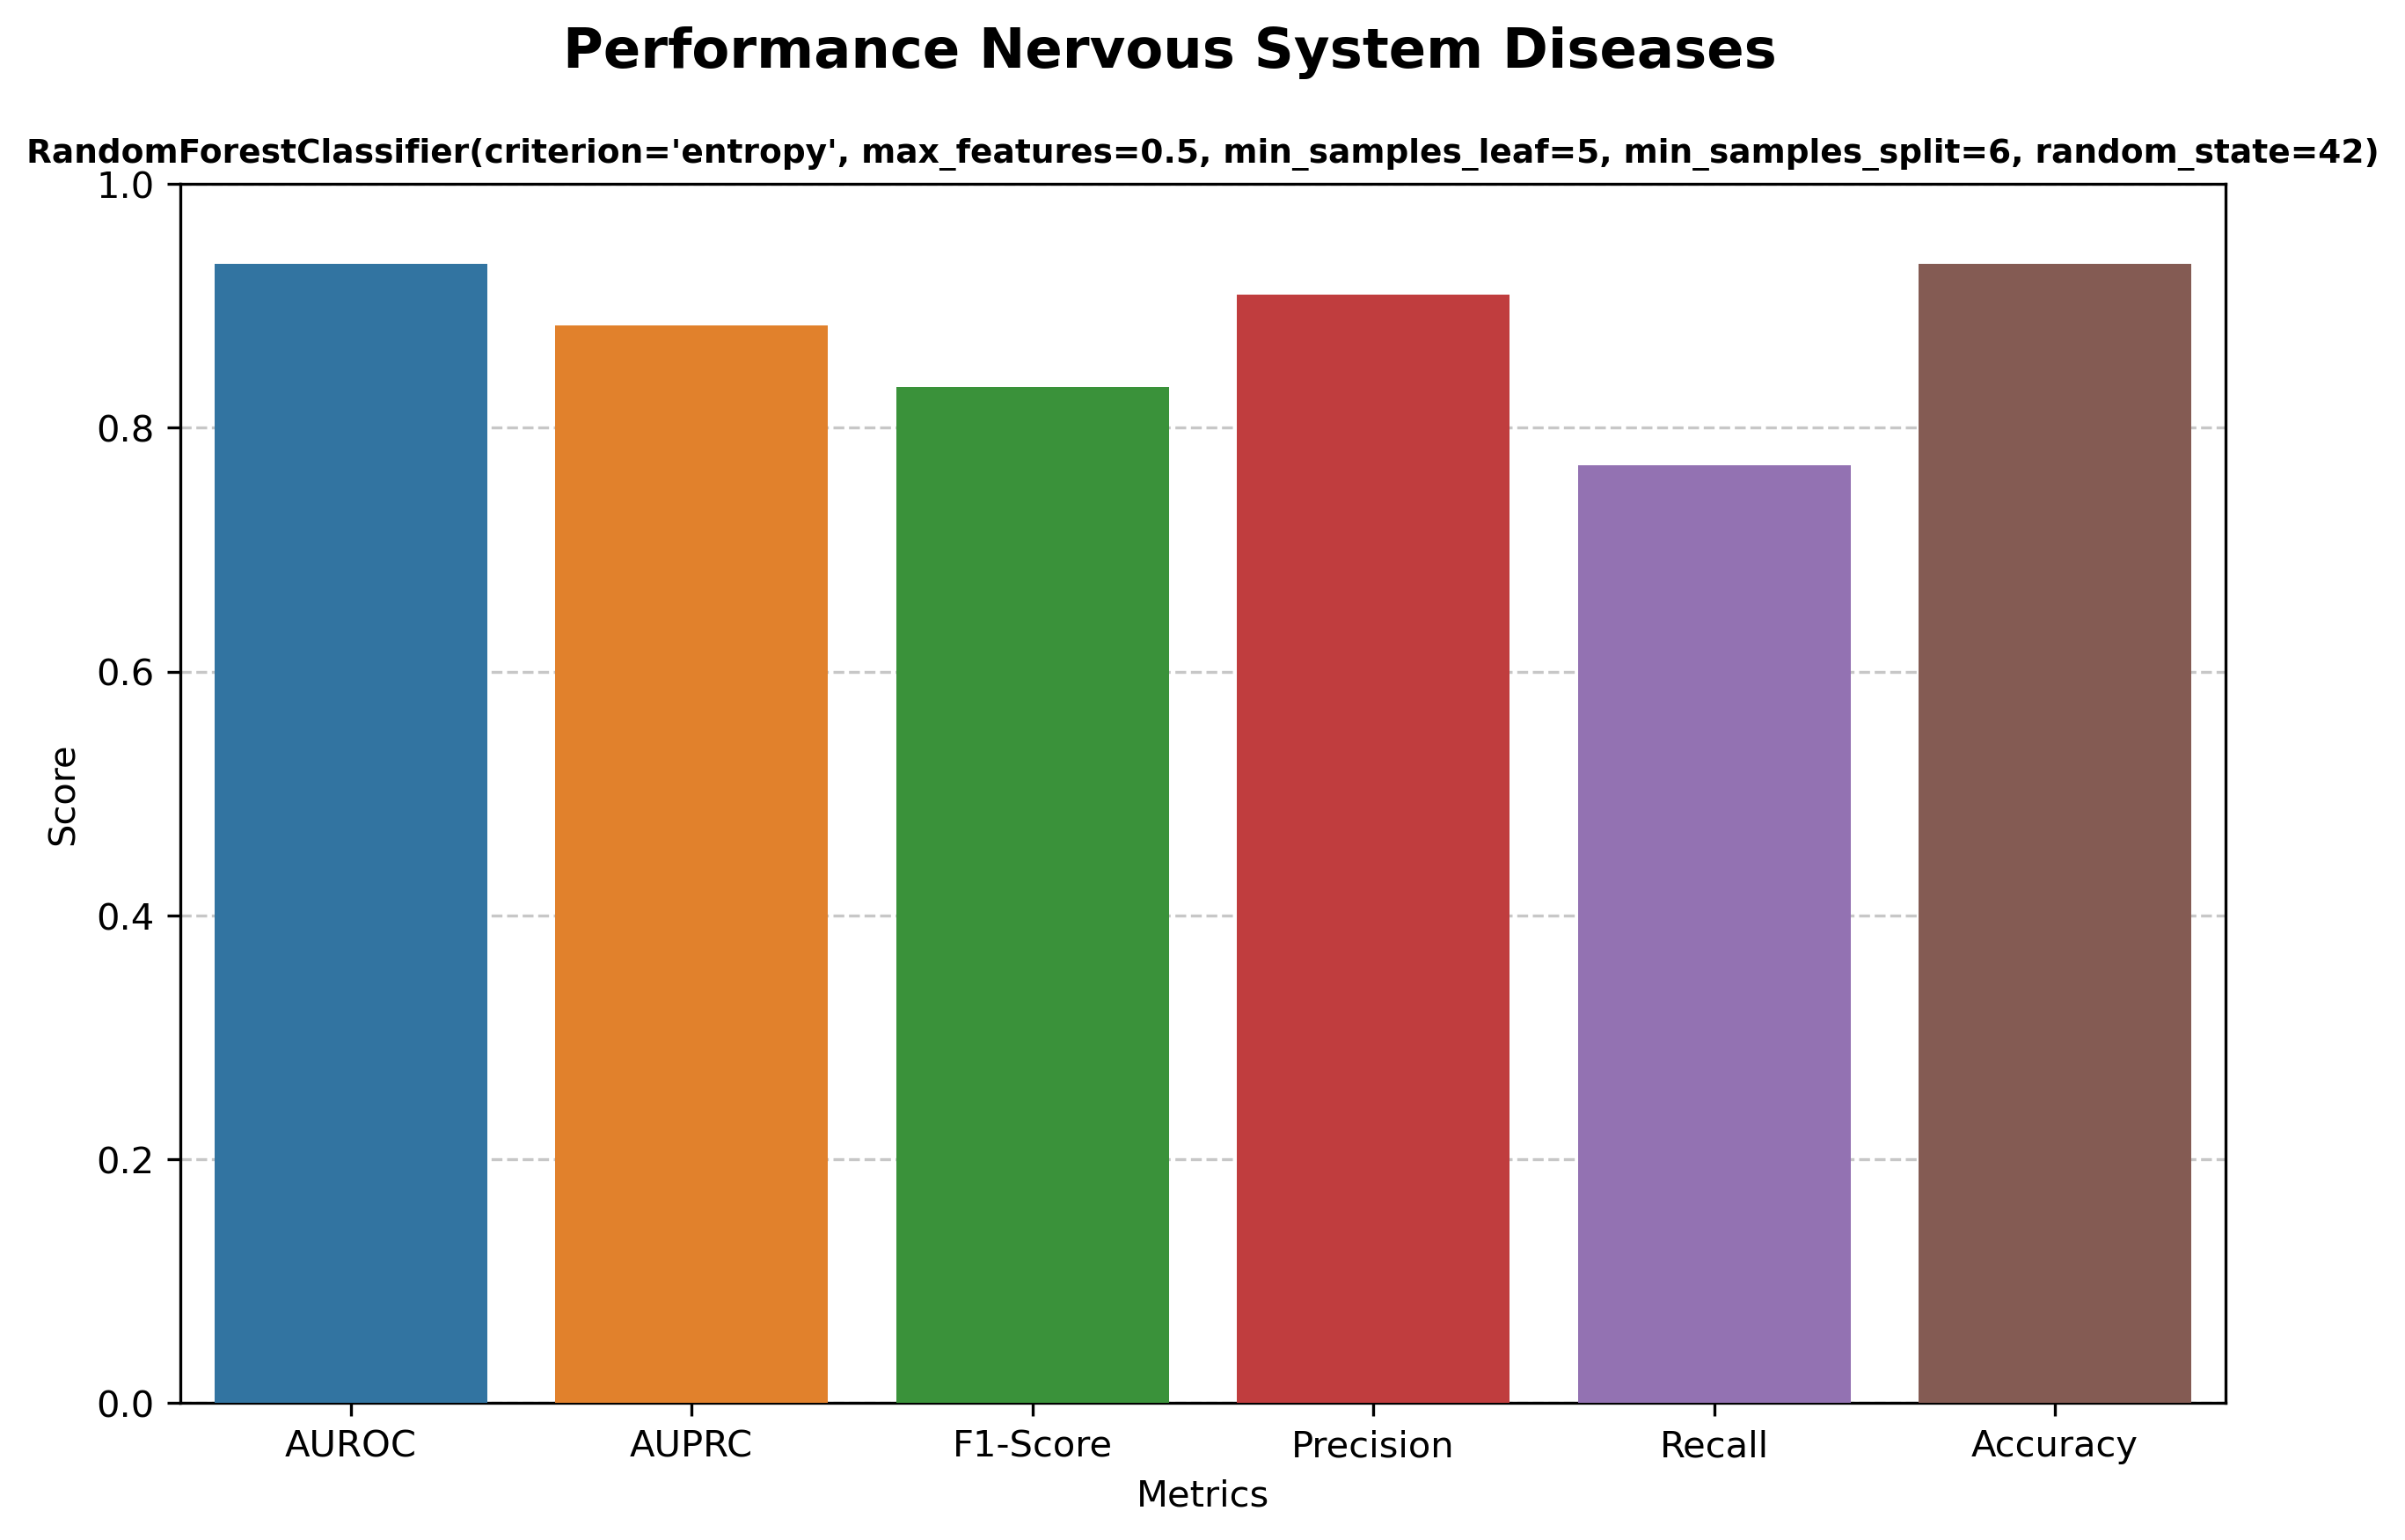

In [294]:
# Best Algorithm
best_algorithm = model.fitted_pipeline_.steps[-1][1]

# Create DataFrame for plotting
df_metrics = pd.DataFrame(metrics_data)

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=df_metrics, zorder=3)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.suptitle(
    f"Performance {mesh_symbol_2_term[selected_term]}",
    fontsize=15,
    fontweight="bold",
    zorder=1,
)
plt.ylim((0, 1))
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.title(
    str(best_algorithm).replace("\n", "").replace("                      ", ""),
    fontsize=9,
    fontweight="bold",
)
plt.savefig("../results/figures/iLINCS/tpo_single.png")

In [273]:
model.fitted_pipeline_.steps[-1][1]

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=5, min_samples_split=6,
                       random_state=42)

/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ddalton/miniconda3/envs/disease_sig/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0.5, 0, 'Metrics')

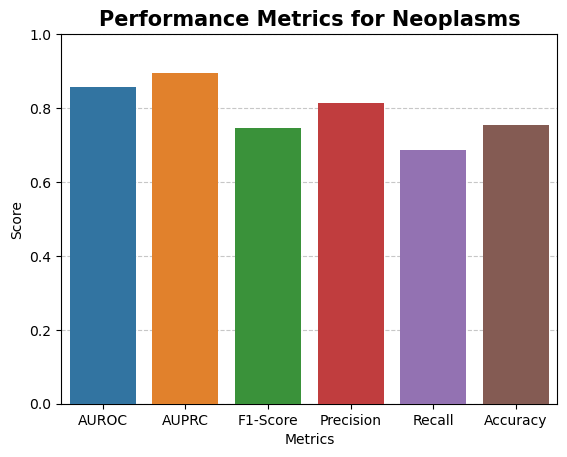

In [264]:
sns.barplot(data=df_metrics, zorder=3)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title(
    f"Performance Metrics for {mesh_symbol_2_term[selected_term]}",
    fontsize=15,
    fontweight="bold",
    zorder=1,
)
plt.ylim((0, 1))
plt.ylabel("Score")
plt.xlabel("Metrics")

## Retrieve Signatures Frozen

### Disease Signatures: MeSH Term Analysis

In [5]:
"""
Disease Signatures: MeSH Term Analysis

Here we are interested in understanding which DISEASES we have contained in iLINCS Disease Signatures

Structure:
    1. Imports, Variables, Functions
    2. Load Signatures
    3. Map MeSH Terms
    4. Get Bottom-Most Terms 
    5. Plot Results
"""

# 1. Imports, Variables, Functions
# imports
import pandas as pd, numpy as np, logging, re, requests
from Bio import Entrez
import xml.etree.ElementTree as ET

# Remove any existing handlers associated with the root logger.
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Reconfigure logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Disease Signatures: MeSH Term Analysis")

# variables
path_signature_data = "../data/iLINCS/signatures.csv"
path_dataset_data = "../data/iLINCS/datasets.csv"
path_mesh_file = "../data/MeSH/desc2023.xml"

Entrez.email = "dylandaltonsub@gmail.com"
base_url = "http://www.ilincs.org/api"
d_dataset_2_mesh = dict()
d_signature_2_mesh = dict()
d_mesh_symbol_2_term = dict()


# functions
def build_mesh_term_tree_number_mapping(mesh_xml_file_path: str) -> dict:
    """
    Build a mapping of MeSH terms to their tree numbers from the MeSH XML file.

    Parameters:
    - mesh_xml_file_path (str): The file path to the MeSH XML file.

    Returns:
    - dict: A dictionary where keys are MeSH terms and values are lists of associated tree numbers.
    """
    tree = ET.parse(mesh_xml_file_path)
    root = tree.getroot()

    mesh_term_2_symbol = dict()
    mesh_symbol_2_term = dict()
    for descriptor in root.findall("DescriptorRecord"):
        term = descriptor.find("DescriptorName/String").text
        tree_numbers = [
            tree_number.text
            for tree_number in descriptor.findall("TreeNumberList/TreeNumber")
        ]
        for tree_number in tree_numbers:
            mesh_symbol_2_term[tree_number] = term
        mesh_term_2_symbol[term] = tree_numbers

    return mesh_term_2_symbol, mesh_symbol_2_term


def extract_pmid_from_publink(publink):
    """Extract the PubMed ID from the provided publink."""
    pmid_match = re.search(r"term=(\d+)\[UID\]", publink)
    if pmid_match:
        return pmid_match.group(1)
    return None


def get_pmid_from_geo_via_eutils(geo_id):
    # Use elink to establish links between GEO and PubMed databases
    handle = Entrez.elink(dbfrom="gds", db="pubmed", id=geo_id[3:])
    record = Entrez.read(handle)
    handle.close()

    # Extract the PMID from the linked records
    # if it has LinkSetDb report else return None
    if len(record[0]["LinkSetDb"]) > 0:
        return record[0]["LinkSetDb"][0]["Link"][0]["Id"]
    else:
        return None


def fetch_mesh_terms_from_pubmed(pmid):
    """
    Fetch MeSH terms for a given PubMed ID.

    Argumets:
    - pmid
        PubMed ID
    Returns:
    - list()
        List of MeSH terms. Empty if Error!
    """
    if not pmid:
        return []

    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
    params = {"db": "pubmed", "id": pmid, "retmode": "xml"}
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"Error fetching MeSH terms for PMID {pmid}: {response.text}")
        return []

    # Parse the XML response to extract MeSH terms
    root = ET.fromstring(response.text)
    mesh_terms = [
        descriptor.findtext("DescriptorName")
        for descriptor in root.findall(".//MeshHeading")
    ]
    return mesh_terms


# 2. Load Signatures
logging.info("Loading Signature")
# load signature data
df_signature = pd.read_csv(path_signature_data)

# filter
df_disease_signature = df_signature[df_signature["libraryid"] == "LIB_1"]

# load dataset data
df_dataset = pd.read_csv(path_dataset_data)

# 3. Map MeSH Terms
# a) map datasets to MeSH terms
# disease signature datasets
disease_signature_datasets = df_disease_signature["datasetid"].unique()

for experiment_dataset_id in disease_signature_datasets:
    # retrieve publink from dataset data
    publink = list(
        df_dataset[df_dataset["experiment"] == experiment_dataset_id][
            "publink"
        ].unique()
    )
    assert (
        len(publink) < 2
    ), f"Error, {experiment_dataset_id} has more than 1 distinct publink"
    publink = publink[0]

    if publink is not np.nan:
        # retrieve pmid from publink string
        pmid = extract_pmid_from_publink(publink=publink)

        # if pmid listed retrieve from pmid associated MeSH terms
        mesh_terms = fetch_mesh_terms_from_pubmed(pmid)

        # print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
        d_dataset_2_mesh[dataset_id] = mesh_terms
        break
    else:
        # if pmid NOT listed try and retrieve it by accessing GEO website &
        # retrieving by web scrapping the pmid
        # retrieve dataset id
        dataset_id = df_dataset[df_dataset["experiment"] == experiment_dataset_id][
            "SourceID"
        ].unique()
        assert (
            len(dataset_id) < 2
        ), f"Error, {experiment_dataset_id} has more than 1 distinct dataset_id"
        dataset_id = dataset_id[0]

        pmid = get_pmid_from_geo_via_eutils(dataset_id)

        if pmid:
            # if pmid listed retrieve pmid associated MeSH terms
            mesh_terms = fetch_mesh_terms_from_pubmed(pmid)
            # print(f"Found MeSH terms for dataset {dataset_id}: {mesh_terms}")
            d_dataset_2_mesh[dataset_id] = mesh_terms
        else:
            pass
            # print(f"No valid PMID found for dataset {dataset_id}.")

    break

# b) map signatures to dataset to MeSH terms


# 4. Get Bottom-Most Terms


# 5. Plot Results

2023-11-23 10:29:06,258 - INFO - Disease Signatures: MeSH Term Analysis
2023-11-23 10:29:06,260 - INFO - Loading Signature
/tmp/ipykernel_4716/676949387.py:118: DtypeWarning: Columns (0,3,7,8,9,10,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_signature = pd.read_csv(path_signature_data)


In [33]:
len(
    set(
        [
            str(row["experiment"]) + str(row["portal"])
            for i, row in df_dataset.iterrows()
        ]
    )
)
# len(df_dataset)

41272

In [34]:
df_dataset.shape

(41272, 16)

In [31]:
for row in df_dataset.iterrows():
    row["experiment"]
    break

TypeError: tuple indices must be integers or slices, not str

In [27]:
df_dataset[df_dataset["experiment"] == "greinGSE157424"].head

<bound method NDFrame.head of       platform                                        description   
23187      NaN  2 human RNA-Seq samples. Single-cell sequencin...  \
23188      NaN  2 human RNA-Seq samples. Single-cell sequencin...   
23189      NaN  2 human RNA-Seq samples. Single-cell sequencin...   
23190      NaN  2 human RNA-Seq samples. Single-cell sequencin...   

                                                 summary   
23187  Background: Severe acute respiratory syndrome ...  \
23188  Background: Severe acute respiratory syndrome ...   
23189  Background: Severe acute respiratory syndrome ...   
23190  Background: Severe acute respiratory syndrome ...   

                                                 geolink lincsDsgc publink   
23187  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...       NaN     NaN  \
23188  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...       NaN     NaN   
23189  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...       NaN     NaN   
23190  http

In [24]:
df_dataset["portal"].value_counts()

portal
GREIN             27509
Cancer             7900
GDS                3695
Single_Cell        1729
COVID-19            156
TCGA                118
Toxicogenomics       96
RPPA                 39
Reference            15
LINCS                15
Name: count, dtype: int64

In [21]:
for c in df_dataset.columns:
    print(len(df_dataset[c].value_counts()))

355
31510
26365
31327
5
2950
2964
31524
8
1
5
3
4
10
31426
465


In [7]:
fetch_mesh_terms_from_pubmed(pmid)

['Biomarkers',
 'Caco-2 Cells',
 'Chemokines, CC',
 'DNA-Binding Proteins',
 'Flagellin',
 'Genomics',
 'Humans',
 'Intestinal Mucosa',
 'Intracellular Signaling Peptides and Proteins',
 'Lasers',
 'Lymphotoxin-alpha',
 'Lymphotoxin-beta',
 'Membrane Proteins',
 'Microdissection',
 'Multigene Family',
 'Nuclear Proteins',
 'Phenotype',
 'Polymerase Chain Reaction',
 'Proteins',
 'Tumor Necrosis Factor alpha-Induced Protein 3',
 'Tumor Necrosis Factor-alpha']

In [57]:
dataset_id

array(['GDS690'], dtype=object)

In [36]:
publinks = list()
for dataset in disease_signature_datasets:
    # retrieve publink from dataset data
    publink = df_dataset[df_dataset["experiment"] == dataset]["publink"].to_list()
    publinks.append(publink)

In [42]:
from collections import Counter

Counter([len(set(p)) for p in publinks])

Counter({1: 1087})

In [41]:
publinks

[[nan, nan],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=15454581[UID]',
  'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=15454581[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=15459216[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=19584232[UID]',
  'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=19584232[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=16081524[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=14676830[UID]',
  'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=14676830[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=15637533[UID]',
  'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=15637533[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=17426818[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=16973580[UID]'],
 ['http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=12803996[UID]'],
 ['

In [30]:
df_dataset["SourceID"]

0        SRP166108
1        SRP166108
2        SRP166108
3        SRP166108
4        SRP166108
           ...    
41267    SRP166108
41268    SRP166108
41269    SRP166108
41270    SRP166108
41271    SRP166108
Name: SourceID, Length: 41272, dtype: object

In [34]:
import requests

base_url = "http://www.ilincs.org/api"


def fetch_dataset_metadata(dataset_id):
    """Fetch dataset metadata/description for a given dataset."""
    endpoint = f"{base_url}/PublicDatasets/{dataset_id}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()  # assuming the response is in JSON format
    else:
        print("Error:", response.status_code, response.text)
        return None


r = fetch_dataset_metadata(dataset)

In [35]:
r

{'platform': 'gdsGPL6244',
 'description': '27 [HuGene-1_0-st] Affymetrix Human Gene 1.0 ST Array [transcript (gene) version] arrays. Macrophage response to H1N1 and H5N1 influenza viral infections. Analysis of macrophages at 1, 3, and 6 hours post-infection with H1N1 or H5N1 viruses in vitro. The avian H5N1 virus is highly pathogenic, while the swine H1N1 virus is less so. Alveolar macrophages are targets of H5N1. Results provide insight into the host response to H1N1 and H5N1 infections.',
 'summary': None,
 'geolink': 'http://www.ncbi.nlm.nih.gov/projects/geo/gds/gds_browse.cgi?gds=3595',
 'lincsDsgc': None,
 'publink': 'http://www.ncbi.nlm.nih.gov/sites/entrez?Db=Pubmed&term=20011590[UID]',
 'pubmeddescription': 'SM Lee, JL Gardy, CY Cheung, TK Cheung, KP Hui, NY Ip, Y Guan, RE Hancock, JS Peiris. Systems-level comparison of host-responses elicited by avian H5N1 and seasonal H1N1 influenza viruses in primary human macrophages.PLoS One.Month 2009',
 'experiment': 'gdsGDS3595',
 'ass

In [11]:
df_dataset = pd.read_csv(path_dataset_data)
df_dataset.columns

Index(['platform', 'description', 'summary', 'geolink', 'lincsDsgc', 'publink',
       'pubmeddescription', 'experiment', 'assay', 'dataFormat', 'sampleType',
       'dataType', 'organism', 'portal', 'SourceID', 'nsamples'],
      dtype='object')

antibodytarget cellline tissue       cid compound concentration  \
21848            NaN      NaN    NaN     cID_1      NaN           NaN   
21849            NaN      NaN    NaN    cID_10      NaN           NaN   
21850            NaN      NaN    NaN   cID_100      NaN           NaN   
21851            NaN      NaN    NaN  cID_1000      NaN           NaN   
21852            NaN      NaN    NaN  cID_1001      NaN           NaN   
...              ...      ...    ...       ...      ...           ...   
30940            NaN      NaN    NaN   cID_995      NaN           NaN   
30941            NaN      NaN    NaN   cID_996      NaN           NaN   
30942            NaN      NaN    NaN   cID_997      NaN           NaN   
30943            NaN      NaN    NaN   cID_998      NaN           NaN   
30944            NaN      NaN    NaN   cID_999      NaN           NaN   

      concordancetable   datasetid     factor   level1  ... clueIoCompound  \
21848  concordanceLib1      GDS690  cell.line   Caco-2  ...            NaN   
21849  concordanceLib1      GDS852   protocol  control  ...            NaN   
21850  concordanceLib1  gdsGDS1454      other       6q  ...            NaN   
21851  concordanceLib1  gdsGDS4296  cell.line     A549  ...            NaN   
21852  concordanceLib1  gdsGDS4296  cell.line     A549  ...            NaN   
...                ...         ...        ...      ...  ...            ...   
30940  concordanceLib1  gdsGDS4296  cell.line     A498  ...            NaN   
30941  concordanceLib1  gdsGDS4296  cell.line     A498  ...            NaN   
30942  concordanceLib1  gdsGDS4296  cell.line     A549  ...            NaN   
30943  concordanceLib1  gdsGDS4296  cell.line     A549  ...            NaN   
30944  concordanceLib1  gdsGDS4296  cell.line     A549  ...            NaN   

      integratedMoas GeneTargets  time  treatment perturbagenID stitchID  \
21848            NaN         NaN   NaN        NaN           NaN      NaN   
21849            NaN         NaN   NaN        NaN           NaN      NaN   
21850            NaN         NaN   NaN        NaN           NaN      NaN   
21851            NaN         NaN   NaN        NaN           NaN      NaN   
21852            NaN         NaN   NaN        NaN           NaN      NaN   
...              ...         ...   ...        ...           ...      ...   
30940            NaN         NaN   NaN        NaN           NaN      NaN   
30941            NaN         NaN   NaN        NaN           NaN      NaN   
30942            NaN         NaN   NaN        NaN           NaN      NaN   
30943            NaN         NaN   NaN        NaN           NaN      NaN   
30944            NaN         NaN   NaN        NaN           NaN      NaN   

      pubChemID is_exemplar pert_type  
21848       NaN         NaN       NaN  
21849       NaN         NaN       NaN  
21850       NaN         NaN       NaN  
21851       NaN         NaN       NaN  
21852       NaN         NaN       NaN  
...         ...         ...       ...  
30940       NaN         NaN       NaN  
30941       NaN         NaN       NaN  
30942       NaN         NaN       NaN  
30943       NaN         NaN       NaN  
30944       NaN         NaN       NaN  

[9097 rows x 30 columns]